# An Unconventional Unsupervised Learning Approaches on New York City Bus Data
by Kefei Mo


<img src="https://raw.githubusercontent.com/kefeimo/DataScienceBlog/master/profile/kmLogo2.png">

# Introduction

This is the notebook of my capstone 3 unsupervised learning project. 

In this project, I choose New Youk city bus dataset The chosen dataset has 26M rows and 13 columns with no pre-defined target. It captured New Your city bus operation data on 2017/06, 2017/08, 2017/10 and 2017/12.

The purpose of this project is to demonstrate several data analysis, feature engineering and machine learning techniques, especially to explore the concept and application of unsupervised learning. Since the chosen dataset has no explicit labels it fits in the unsupervised learning theme. But instead of using well-known unsupervised learning tools for clustering and/or dimenionality reduction, I try to facilitate unsupervised learning's pattern-finding capability and demonstrate its use to improve supervised learning performance, even though such pattern(s) is hard to identify. 

Another focus of this project is to emphasize the importance of feature engineering, i.e. to enhance model interpretability and boosting machine learning.

During working on this project I was reading a great book about data visualization by Claus O. Wilke  <a href="https://serialmentor.com/dataviz" target="_blank">Fundamentals of Data Visualization</a>. I will be trying to apply many principles mentioned in the book.

Note that I code-folded most of the shells. Unfold them as you wish. 

Here is the main content of this project. 

# Table of Contents<a id='main'></a> 
#### [Data Cleaning](#data_cleaning)
- #### [Load data and data info](#load_data)
- #### [Handel missing data: A non-trivial fillna strategy](#handel_missing)


#### [Exploratory Data Analysis (EDA)](#eda)
###### [Brief stories of ](#eda)
- ##### [Operation features ](#operation_info)
- ##### [Geometric features ](#geo_info)
- ##### [DateTime features ](#datatime_info)

#### [Insights of ](#insight_of)
- ##### [Expected time to arrive](#expected_time_to_arrive)
- ##### [Bus delays ](#bus_delay)

#### [Design the Task](#design_task)
###### [An unconventional unsupervised learning task demo](#design_task)

#### [Machine Learning](#machine_learning)
- ##### [Data preparation](#machine_learning)

- ##### [Model training](#model_training)

- ##### [Evaluation](#evaluation)

- ##### [Probability calibration](#probability_calibration)


#### [Summary and Future Work](#sumary_and_future_work)

In [1]:
# load package
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# %matplotlib inline

RANDOM_STATE = 123

# Data Cleaning <a id='data_cleaning'></a> 
<a href="https://www.kaggle.com/stoney71/new-york-city-transport-statistics" target="_blank">Data source: Kaggle</a>
> ### Load data and data info <a id='load_data'></a> 
##### <div style="text-align: right"> [back to main](#main) </div>

In [2]:
#  Load data
import warnings
warnings.filterwarnings('once')
# 

# https://www.kaggle.com/pranavbadami/nj-transit-amtrak-nec-performance
df_201712 = pd.read_csv('./new-york-city-transport-statistics/mta_1712.csv', error_bad_lines=False, warn_bad_lines=False)
df_201710 = pd.read_csv('./new-york-city-transport-statistics/mta_1710.csv', error_bad_lines=False, warn_bad_lines=False)
df_201708 = pd.read_csv('./new-york-city-transport-statistics/mta_1708.csv', error_bad_lines=False, warn_bad_lines=False)
df_201706 = pd.read_csv('./new-york-city-transport-statistics/mta_1706.csv', error_bad_lines=False, warn_bad_lines=False)

df_2017 = pd.concat([ df_201706, df_201708, df_201710, df_201712 ], axis=0, ignore_index=True)
# df_2017 = pd.concat([ df_201706], axis=0, ignore_index=True)

In [3]:
# data_info
df_original = df_2017.copy()
pd.set_option('display.max_rows', 500) 
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df_original.head()

RecordedAtTime  DirectionRef PublishedLineName                 OriginName  OriginLat  OriginLong                  DestinationName  DestinationLat  DestinationLong VehicleRef  VehicleLocation.Latitude  VehicleLocation.Longitude            NextStopPointName ArrivalProximityText  DistanceFromStop  ExpectedArrivalTime ScheduledArrivalTime
0  2017-06-01 00:03:34           0.0                B8                 4 AV/95 ST  40.616104  -74.031143          BROWNSVILLE ROCKAWAY AV       40.656048       -73.907379   NYCT_430                 40.635170                 -73.960803            FOSTER AV/E 18 ST          approaching              76.0  2017-06-01 00:03:59             24:06:14
1  2017-06-01 00:03:43           1.0               S61  ST GEORGE FERRY/S61 & S91  40.643169  -74.073494                S I MALL YUKON AV       40.575935       -74.167686  NYCT_8263                 40.590802                 -74.158340      MERRYMOUNT ST/TRAVIS AV          approaching              62.0  2017-06-01 00:03:56             23:58:02
2  2017-06-01 00:03:49           0.0              Bx10     E 206 ST/BAINBRIDGE AV  40.875008  -73.880142                 RIVERDALE 263 ST       40.912376       -73.902534  NYCT_4223                 40.886010                 -73.912647  HENRY HUDSON PKY E/W 235 ST              at stop               5.0  2017-06-01 00:03:56             24:00:53
3  2017-06-01 00:03:31           0.0                Q5           TEARDROP/LAYOVER  40.701748  -73.802399    ROSEDALE LIRR STA via MERRICK       40.666012       -73.735939  NYCT_8422                 40.668002                 -73.729348     HOOK CREEK BL/SUNRISE HY        < 1 stop away             267.0  2017-06-01 00:04:03             24:03:00
4  2017-06-01 00:03:22           1.0               Bx1      RIVERDALE AV/W 231 ST  40.881187  -73.909340  MOTT HAVEN 136 ST via CONCOURSE       40.809654       -73.928360  NYCT_4710                 40.868134                 -73.893032     GRAND CONCOURSE/E 196 ST              at stop              11.0  2017-06-01 00:03:56             23:59:38

In [4]:
# data_info
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26520716 entries, 0 to 26520715
Data columns (total 17 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   RecordedAtTime             object 
 1   DirectionRef               float64
 2   PublishedLineName          object 
 3   OriginName                 object 
 4   OriginLat                  float64
 5   OriginLong                 float64
 6   DestinationName            object 
 7   DestinationLat             float64
 8   DestinationLong            float64
 9   VehicleRef                 object 
 10  VehicleLocation.Latitude   float64
 11  VehicleLocation.Longitude  float64
 12  NextStopPointName          object 
 13  ArrivalProximityText       object 
 14  DistanceFromStop           float64
 15  ExpectedArrivalTime        object 
 16  ScheduledArrivalTime       object 
dtypes: float64(8), object(9)
memory usage: 3.4+ GB


> # Handel missing data: A non-trivial fillna strategy <a id='handel_missing'></a> 
###  <div style="text-align: right"> [back to main](#main) </div>

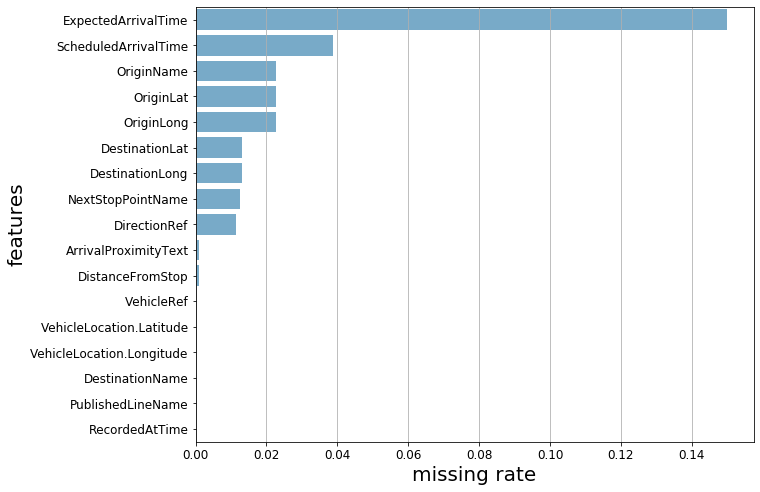

In [5]:
# null value percentage
# print(df_original.isna().sum()/len(df_original.index))
# (df_original.isna().sum()/len(df_original.index)).sort_values(ascending=False)

df_tmp = pd.DataFrame({'missing_ratio': (df_original.isna().sum()/len(df_original.index)).sort_values(ascending=False)})
# df_tmp['features'] = df_tmp.index

f, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x=df_tmp.missing_ratio, y=df_tmp.index, 
            label="Total", color=sns.color_palette('Blues',1)[0], ax=ax, )
ax.grid(axis='x')
ax.set_xlabel('missing rate', fontsize=20)
ax.set_ylabel('features', fontsize=20)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

In [6]:
# a simple logic to fill nan
def get_df_fillna():
    df_fillna = df_original.copy()
    conditioin_temp = df_fillna.ExpectedArrivalTime.isna() & (df_fillna.ArrivalProximityText=='at stop')
    df_fillna.loc[conditioin_temp, 'ExpectedArrivalTime'] = df_fillna.loc[conditioin_temp].RecordedAtTime.values
    df_fillna

    return df_fillna
# df_fillna = get_df_fillna()

In [7]:
df_fillna = get_df_fillna()

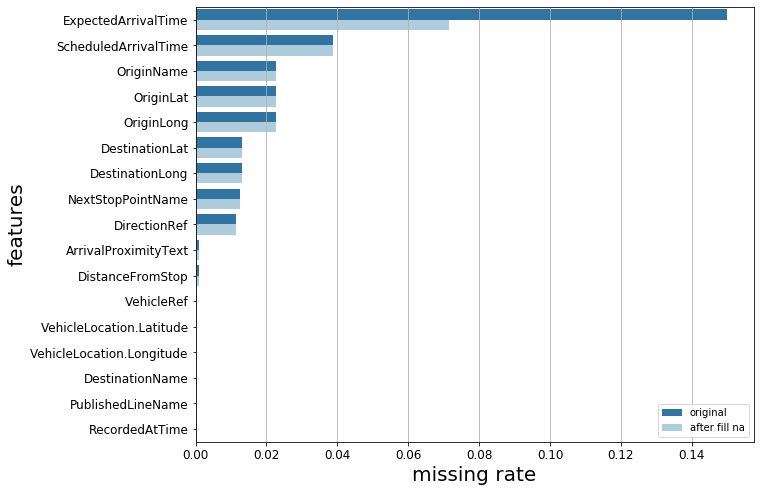

In [8]:
# missing data compare
df_tmp = pd.DataFrame({'missing_ratio': (df_original.isna().sum()/len(df_original.index)).sort_values(ascending=False)})
df_tmp_2 = pd.DataFrame({'missing_ratio': (df_fillna.isna().sum()/len(df_fillna.index)).sort_values(ascending=False)})

df_tmp_new = pd.concat([df_tmp, df_tmp_2], axis=1)
df_tmp_new=df_tmp_new.reset_index()
df_tmp_new.columns=['features','original', 'after fill na']
# df_tmp_new
df_tmp_new = df_tmp_new.melt(id_vars=['features'], value_vars=['original', 'after fill na'],
                            value_name='mission ratio', )

f, ax = plt.subplots(figsize=(10, 8))

sns.barplot(x='mission ratio', y='features', hue='variable', data=df_tmp_new,
#             palette=sns.color_palette("Blues_d", 2), 
            palette=sns.color_palette("Paired")[:2][::-1],
            ax=ax, )

ax.legend(loc='lower right')
ax.grid(axis='x')
# ax.set_xlabel(ax.get_xlabel(), fontsize=20)
ax.set_xlabel('missing rate', fontsize=20)
ax.set_ylabel('features', fontsize=20)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.show()

Just by a simple fill na logic, we have dramatically saved half of the missing data on the largest missing value feature. And since it is not a brute force imputation fill na method, we can reasonablly feel confident about the data quality.



In [9]:
# detail alart: how I fill na
# use recordedAtTime value to replace np.nan data when the bus is 'at stop' (in ArrivalProximityText)

# Exploratory Data Analysis (EDA) <a id='eda'></a> 

> ## [Brief stories of ](#eda)
- ### [Operation features ](#operation_info)
- ### [Geometric features ](#geo_info)
- ### [DateTime features ](#datatime_info)




###  <div style="text-align: right"> [back to main](#main) </div>

# EDA
# The logic underlying. Let me tell a story about the data.
First of all, let's try to understand the logics behind the data. 

The data was captured automatically from the API. We can think about at certain moment (recorded as 'RecordedAtTime' ) we query data from certain bus (assocaited with the 'VehicleRef' of certain 'PublishedLineName') about its location ('VehicleLocation.Latitude', 'VehicleLocation.Longitude'), what is the next bus stop ('NextStopPointName') and when it is expected to arrive the next stop ('ExpectedArrivalTime').

The feature names should be very self-explained. And I would like to seperate the features into three groups based on the meaning indicated by the feature names, i.e. operation info, time info, spatial info. 

### Operation info
- PublishedLineName (static)
- DirectionRef (static)
- DestinationName (static)
- NextStopPointName (static/dynamic)
- VehicleRef (static)

### Time info
- RecordedAtTime (dynamic)
- ExpectedArrivalTime (dynamic)
- ScheduledArrivalTime (static)

### Spatial info
gps coordinates
- OriginLat (static)
- OriginLong (static)
- DestinationLat (static)
- DestinationLong (static)
- VehicleLocation.Latitude (dynamic)
- VehicleLocation.Longitude (dynamic)

relative location
- ArrivalProximityText (dynamic)
- DistanceFromStop (dynamic)

As you can see, I also consider the features as either dynamic or static, i.e. 'PublishedLineName' indicate the name of the service bus line (i.e. B6, B8, etc.), and it is static because the name of the bus line would not change. On the other hand, 'VehicleLocation.Latitude' feature is a dynamic variable since the location of individual bus is changing all the time when runnig. You might wonder why I labeled 'NextStopPointName' as both static and dynamic. The reason behind is, for certain service line (i.e. b6) the bus stop would not move locations or change names over the period we are analysing. But for individual bus that is on service, the next bus stop is changing all the time. Also I would like to put a reminder here, we might be able to extract bus stop GPS coordinates, which is not given by the original featues.

Another thing we should pay attention is the hierarchy of the underlying logics. i.e. individual service line might operate several buses, but individual bus is not likely to run at several different service lines. That being said, 'VehicleRef' should be underneath 'PublishedLineName' but not the other way around. To justify this claim, you can simply check the number of unique 'PublishedLineName' values under single element under 'VehicleRef' features. 


In [10]:
# detail hidden here:
# NOTE:
# You might have noticed that in the EDA process, I didn't fill null values but drop the rows immediately. I can argue that since the largest null value percentage is 'ExpectedArrivalTime' = 0.07 (or 7%), it is not a disaster if I dropna by rows. I don't wanna dive in the details how to handle null values but I promise I will come back and talk about how to address this problem. For now, let's just let the story keep on going.    

> # Operation features <a id='operation_info'></a> 
###  <div style="text-align: right"> [back to main](#main) </div>

recall the followings are our operation info
- PublishedLineName (static)
- DirectionRef (static)
- DestinationName (static)
- NextStopPointName (static/dynamic)
- VehicleRef (static)

All of them are categorical variables and as mentioned before, they are nested, it might be ideal if we can visualize their relationship using, say, sankey diagram. But sankey is not very straightforward to plot in Python, so let's dig in one layer at a time, starting from PublishedLineName.

In [11]:
# df_eda
df_eda = df_original.copy()

In [12]:
# take a look at all the line services
df_eda.PublishedLineName.unique()

array(['B8', 'S61', 'Bx10', 'Q5', 'Bx1', 'M1', 'B31', 'B83', 'B82', 'S59',
       'Bx28', 'B1', 'B26', 'Bx39', 'M66', 'Bx31', 'Bx36', 'M96', 'Q4',
       'Q54', 'B6', 'B4', 'M101', 'Bx5', 'Q12', 'B43', 'M100', 'M11',
       'B11', 'M2', 'B41', 'M34A-SBS', 'Bx32', 'X10', 'B14', 'B62',
       'Bx17', 'Bx4', 'M103', 'M50', 'B25', 'Bx19', 'Q15A', 'Q44-SBS',
       'Bx9', 'S78', 'Q48', 'X17', 'Bx11', 'B2', 'B44', 'Bx2', 'B35',
       'B12', 'B38', 'B3', 'B15', 'M10', 'B17', 'M60-SBS', 'Bx7', 'B67',
       'M55', 'B46', 'Bx6', 'M102', 'M104', 'Q1', 'Bx35', 'S53',
       'M23-SBS', 'B24', 'Bx22', 'Bx12', 'Q20B', 'B45', 'S48', 'Bx30',
       'Q20A', 'B9', 'B63', 'Q30', 'Bx40', 'Q84', 'M15', 'Q17', 'M22',
       'Q59', 'B49', 'Bx33', 'Bx42', 'B57', 'Q83', 'Q32', 'B65', 'Q3',
       'Bx13', 'M7', 'B47', 'B52', 'S66', 'B20', 'X1', 'Bx21', 'B7',
       'Q55', 'Q31', 'Q13', 'M5', 'S74', 'M14D', 'M79-SBS', 'M3', 'S46',
       'M31', 'B70', 'Bx41', 'M8', 'S52', 'M42', 'Q28', 'S76', 'B61',
       'S40

In [13]:
# group the lines, 
# refer to this list: https://new.mta.info/schedules/bus
# It turns out that X stands for Express Service Between Staten Island and Manhattan
# ref http://web.mta.info/nyct/bus/schedule/xpress/x001cur.pdf

df_eda = df_original

lines_bronx =  df_eda[df_eda.PublishedLineName.str.startswith('Bx')].PublishedLineName.unique()
lines_brooklyn =  df_eda[df_eda.PublishedLineName.str.startswith('B') & ~df_eda.PublishedLineName.str.startswith('Bx')].PublishedLineName.unique()
lines_manhattan =  df_eda[df_eda.PublishedLineName.str.startswith('M') | df_eda.PublishedLineName.str.startswith('Sh')].PublishedLineName.unique()
lines_queens =  df_eda[df_eda.PublishedLineName.str.startswith('Q') ].PublishedLineName.unique()
lines_staten_island =  df_eda[df_eda.PublishedLineName.str.startswith('S') & ~df_eda.PublishedLineName.str.startswith('Sh')].PublishedLineName.unique()
lines_others = np.setdiff1d(df_eda.PublishedLineName.unique(),np.concatenate((lines_bronx, lines_brooklyn, lines_manhattan, lines_queens, lines_staten_island)))


print("Bronx: ",lines_bronx)
print("Brooklyn: ", lines_brooklyn)
print("Manhattan: ", lines_manhattan)
print("Queens: ", lines_queens)
print("Staten Island: ", lines_staten_island)
print("others:",lines_others)


Bronx:  ['Bx10' 'Bx1' 'Bx28' 'Bx39' 'Bx31' 'Bx36' 'Bx5' 'Bx32' 'Bx17' 'Bx4' 'Bx19'
 'Bx9' 'Bx11' 'Bx2' 'Bx7' 'Bx6' 'Bx35' 'Bx22' 'Bx12' 'Bx30' 'Bx40' 'Bx33'
 'Bx42' 'Bx13' 'Bx21' 'Bx41' 'Bx3' 'Bx27' 'Bx15' 'Bx34' 'Bx16' 'Bx24'
 'Bx46' 'Bx29' 'Bx12-SBS' 'Bx8' 'Bx4A' 'Bx26' 'Bx41-SBS' 'Bx38' 'Bx18'
 'Bx20' 'BxM2' 'BxM6' 'BxM1' 'BxM7' 'BxM9' 'BxM11' 'BxM10' 'BxM8' 'BxM3'
 'Bx23' 'BxM4' 'BxM18' 'Bx6-SBS']
Brooklyn:  ['B8' 'B31' 'B83' 'B82' 'B1' 'B26' 'B6' 'B4' 'B43' 'B11' 'B41' 'B14' 'B62'
 'B25' 'B2' 'B44' 'B35' 'B12' 'B38' 'B3' 'B15' 'B17' 'B67' 'B46' 'B24'
 'B45' 'B9' 'B63' 'B49' 'B57' 'B65' 'B47' 'B52' 'B20' 'B7' 'B70' 'B61'
 'B60' 'B42' 'B64' 'B16' 'B68' 'B36' 'B54' 'B37' 'B48' 'B13' 'B74'
 'B44-SBS' 'B46-SBS' 'B84' 'B69' 'B32' 'B39' 'B103' 'BM4' 'BM3' 'B100'
 'BM1' 'BM5' 'BM2']
Manhattan:  ['M1' 'M66' 'M96' 'M101' 'M100' 'M11' 'M2' 'M34A-SBS' 'M103' 'M50' 'M10'
 'M60-SBS' 'M55' 'M102' 'M104' 'M23-SBS' 'M15' 'M22' 'M7' 'M5' 'M14D'
 'M79-SBS' 'M3' 'M31' 'M8' 'M42' 'M72' 'M20' 'M35' 'M4

### We found a hidden layer
As you can see, we found a hidden layer of the dataset -- areas, i.e. Bronx, Broolklyn, etc.

Most of the bus service is limited to local area (or brough). This is important because the operation pattern for, say, Mahattan can be very different from that of Staten Island. That's the main reason we would like to first group the bus service lines according to the area. Even though there could be trasnportation service between areas, i.e. "Express Service Between Staten Island and Manhattan". 

The goal of such grouping is to help finding the underlying pattern. And normally this kind of feature engineering is very efficient and is favored over using machine learning clustering methods in interpretability sense.

In [14]:
# A brief stats of line counts among bronx, brooklyn, manhattan, etc.
count_list = []
line_of_area_list = []
for line in [lines_bronx, lines_brooklyn, lines_manhattan, lines_queens, lines_staten_island, lines_others]:
#     print(df_eda[df_eda.PublishedLineName.isin(line)].PublishedLineName.count())
    count_list.append(df_original[df_original.PublishedLineName.isin(line)].PublishedLineName.count())
    line_of_area_list.append(line)


df_line_count_by_areas = pd.DataFrame({'areas':['bronx', 'brooklyn', 'manhattan', 'queens', 'staten island', 'Express Service Between \nStaten Island and Manhattan'],
                                         'counts':count_list,
                                      'lines':[lines_bronx, lines_brooklyn, lines_manhattan, lines_queens, lines_staten_island, lines_others ]})
df_line_count_by_areas = df_line_count_by_areas.sort_values(by='counts', ascending=False)

# df_line_count_by_areas

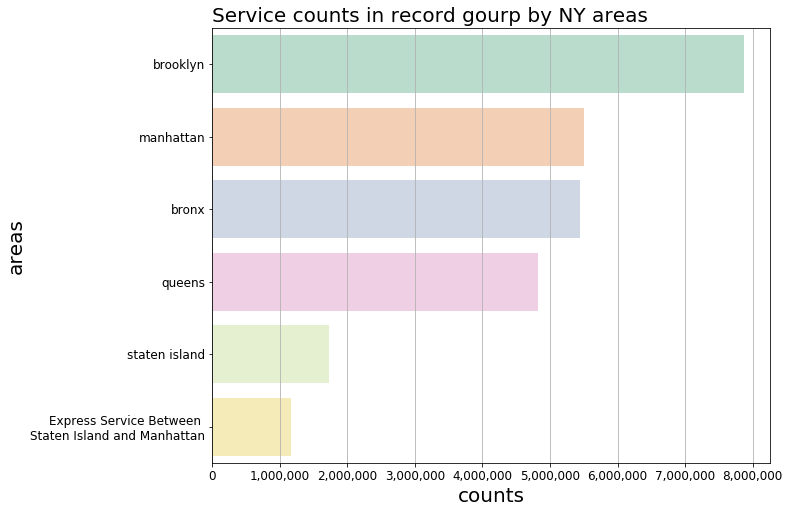

In [15]:
# plot counts stats by areas
from matplotlib.ticker import StrMethodFormatter
f, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x=df_line_count_by_areas.counts, y=df_line_count_by_areas.areas, 
            label="Service counts in record",  ax=ax, 
           palette="Pastel2",
           )
ax.grid(axis='x')
ax.set_title("Service counts in record gourp by NY areas", loc='left', fontsize=20)
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

ax.set_xlabel(ax.get_xlabel(), fontsize=20)
# ax.set_xlabel('missing rate', fontsize=20)
ax.set_ylabel(ax.get_ylabel(), fontsize=20)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.show()

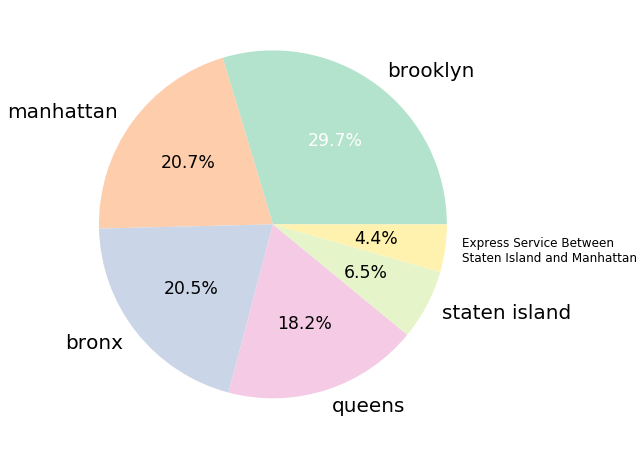

In [16]:
# take another look
f, ax = plt.subplots(figsize=(10, 8))

patches, texts, autotexts = ax.pie(x=df_line_count_by_areas.counts, labels=df_line_count_by_areas.areas, 
       autopct='%1.1f%%',
      colors=sns.color_palette("Pastel2"))

plt.setp(texts, size=20)
plt.setp(autotexts, size='xx-large')
plt.setp(texts[-1], size='large')
autotexts[0].set_color('white')

plt.show()

In [17]:
# df_line_count.head(10)

In [18]:
# df_line_count_by_areas 
# get PublishedLineName count info
df_line_count = df_eda.PublishedLineName.value_counts()
df_line_count = pd.concat([df_line_count, df_line_count/df_line_count.sum()], axis=1)
df_line_count = df_line_count.reset_index()
df_line_count.columns=['LineName','count', 'ratio']
df_line_count = df_line_count.sort_values(by='count', ascending=False)

# ['brooklyn', 'manhattan', 'bronx', 'queens', 'staten island','Express Service Between \nStaten Island and Manhattan']
area_list = df_line_count_by_areas.areas.values
line_list = df_line_count_by_areas.lines.values

for (line_name,area_name) in (zip(line_list, area_list)):
    df_line_count.loc[df_line_count.LineName.isin(line_name),'area']=area_name
#     print(area_name)
    
df_line_count

for i,area_name in enumerate(area_list):
    df_line_count.loc[(df_line_count.area==area_name),'color_code']=(sns.color_palette("Pastel2")).as_hex()[i]
    
# df_line_count

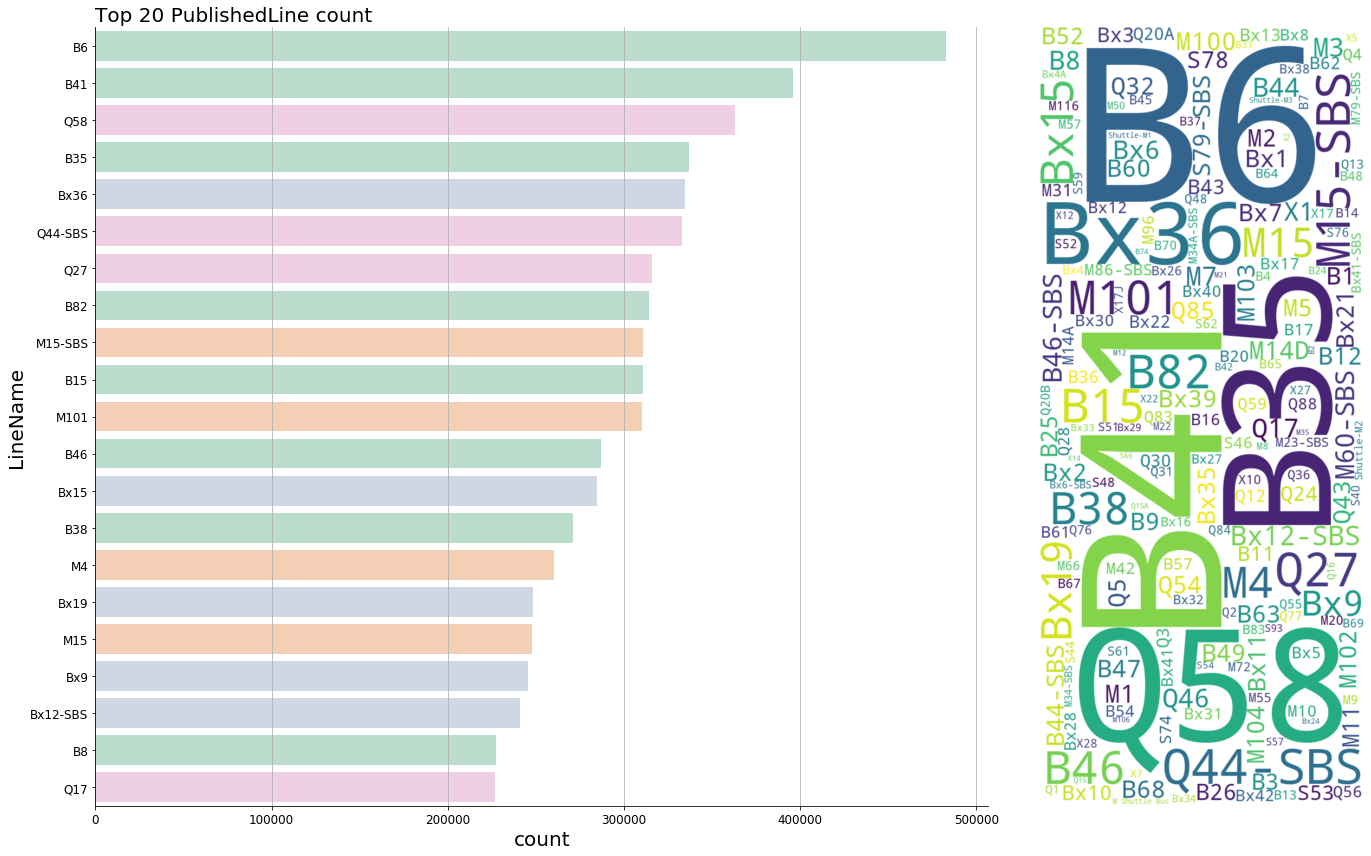

In [111]:
# visulize PublishedLineName
number_to_take = 20
# plt.figure(figsize=(10,5))
fig, ax = plt.subplots(1,2,gridspec_kw={'width_ratios': [2, 1]}, figsize=(20,12))
array_tmp = np.array(df_line_count.sort_values(by='count').index[-number_to_take:])
# sns.countplot(y=df_eda[df_eda.PublishedLineName.isin(array_tmp)].PublishedLineName, order=array_tmp[::-1], 
#              palette=sns.color_palette("BuGn_d",number_to_take),
#               ax=ax[0]
#              )
customer_color_mapping = df_line_count.loc[:number_to_take].color_code
sns.barplot(x='count', y='LineName', data=df_line_count.loc[:number_to_take,:], ax=ax[0],
#            hue='area',
            palette=customer_color_mapping,
#             color=customer_color_mapping,
           )

ax[0].set_title('Top {} PublishedLine count'.format(number_to_take), loc='left', fontsize=20)
ax[0].spines['top'].set_color('none')
ax[0].spines['right'].set_color('none')
ax[0].grid(axis='x')

ax[0].set_xlabel(ax[0].get_xlabel(), fontsize=20)
# ax.set_xlabel('missing rate', fontsize=20)
ax[0].set_ylabel(ax[0].get_ylabel(), fontsize=20)
ax[0].xaxis.set_tick_params(labelsize=12)
ax[0].yaxis.set_tick_params(labelsize=12)


from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

freq_dict = df_line_count.set_index('LineName').ratio.to_dict()
freq_dict

wc = WordCloud(background_color='white', random_state=RANDOM_STATE+1,
              width=200*3, height=240*6,)
wc.generate_from_frequencies(frequencies=freq_dict)
ax[1].imshow(wc, interpolation='bilinear', )
ax[1].axis("off")
plt.tight_layout()
plt.show()

### Decision time.

Let's focus on the 'B6' line, so that we would not be overwhelmed by the data, also 'B6' has the most record counts, so we can argue that the analysis is not unrepresentative.


In [20]:
# customer function: get target sub-dataset
def reset_dataset():
    # focus on 'B6' line
    df_fillna = get_df_fillna()
    
    df_b6 = df_fillna[df_fillna.PublishedLineName=='B6'].copy()
    # df_b6.info()

    # take a sample 
    df_trim = df_b6.copy()
    df_trim = df_trim.dropna()
#     df_trim = df_trim.sample(n=100000, random_state=RANDOM_STATE)
    df_trim.DirectionRef = df_trim.DirectionRef.astype('int32')
    # df_trim.info()
    
    return df_trim    
df_trim = reset_dataset()

In [21]:
# df_trim.groupby(['DirectionRef', ])[['OriginName']].count().reset_index().rename(columns={'OriginName': 'count'})

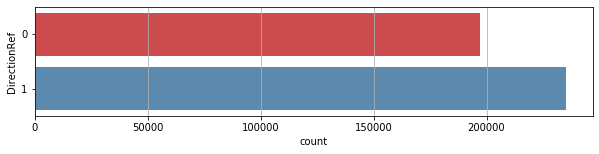

In [22]:
# visualize counts by direction_ref
plt.figure(figsize=(10,2))
sns.countplot(y=df_trim.DirectionRef, 
#               order=df_trim.DirectionRef.value_counts().index,
              alpha=0.9,
              palette=sns.color_palette("Set1", desat=0.95))
plt.grid(axis='x')
plt.show()

From the anaysis above, it seems DirectionRef=1 has more operations according to the records. Let's dive in even more.

note*: a reminder, I will designate color code 'red' for DirectionRef=0, and 'blue' for DirectionRef=1

In [23]:
# nested info 
df_operation = df_trim.groupby(['DirectionRef', 'OriginName', 'DestinationName'])[['VehicleRef']].count().rename(columns={'VehicleRef': 'count'}).sort_values(by=['DirectionRef', 'OriginName','count'], ascending=False)
df_operation

count
DirectionRef OriginName                        DestinationName                  
1            ROCKAWAY STATION/ROCKAWAY STATION BENSONHURST HARWAY AV       58519
                                               AVENUE J CONEY IS AV         8836
                                               LTD BENSONHURST HARWAY AV    4814
             LIVONIA AV/ASHFORD ST             LTD BENSONHURST HARWAY AV  124709
                                               BENSONHURST HARWAY AV       34356
             FLATLANDS AV/ELTON ST             BENSONHURST HARWAY AV         764
             E 45 ST\GLENWOOD RD               BENSONHURST HARWAY AV         282
             BEDFORD AV/CAMPUS ROAD            BENSONHURST HARWAY AV        2765
             BAY PY/60 ST                      BENSONHURST HARWAY AV         112
0            HARWAY AV/BAY 37 ST               LTD EAST NY NEW LOTS STA   105715
                                               ROCK PKY STA                52684
                                               EAST NY NEW LOTS STA        27872
             FLATLANDS AV/E 82 ST              EAST NY NEW LOTS STA          138
                                               ROCK PKY STA                   98
             AV J/CONEY ISLAND AV              ROCK PKY STA                10501

From the nested table group by 1.'DirectionRef', 2.'OriginName', 3.'DestinationName', we now know that there are 15 routes (note*) running on 'b6' line, with 9 routes running on directionRef=1, 6 routes running on directionRef=0 seperately.

Also, for directionRef=1, the rounts are from 6 different origins to 3 different destinations. While for directionRef=0, the rounts are from 3 different origins to 3 different destinations.

You might also realize that the busy routs are 'LIVONIA AV/ASHFORD ST' to 'LTD BENSONHURST HARWAY AV', 'HARWAY AV/BAY 37 ST' to 'LTD EAST NY NEW LOTS STA', etc. Since it has the most counts in the records, assuming the data was sampled randomly.

The nested relationships might at best visualize using sankey diagram, and here is an example.

Note*: when I said 'this route' I mean one of the 15 routes runing on B6, i.e. from 'HARWAY AV/BAY 37 ST' to 'LTD EAST NY NEW LOTS STA'. 


In [24]:
# prepare data for sankey diagram
df_operation_0 = df_trim.groupby(['DirectionRef', 'OriginName', 'DestinationName'])[['VehicleRef']].count().sort_values(by=['DirectionRef', 'OriginName','VehicleRef'], ascending=True).reset_index()
# df_operation_0

for dir_ref in [0,1]: 
    
    stop_name_list = df_operation_0[df_operation_0.DirectionRef==dir_ref].OriginName.unique()
    list_test=[(name,index) for name,index in zip(stop_name_list, range(len(stop_name_list)))]
    dict_test = dict(list_test)
    df_operation_0.loc[df_operation_0.DirectionRef==dir_ref, 'source'] = df_operation_0.OriginName.map(dict_test)

    stop_name_list = df_operation_0[df_operation_0.DirectionRef==dir_ref].DestinationName.unique()
    list_test=[(name,index + len(df_operation_0[df_operation_0.DirectionRef==dir_ref].OriginName.unique())) for name,index in zip(stop_name_list, range(len(stop_name_list)))]
    dict_test = dict(list_test)
    df_operation_0.loc[df_operation_0.DirectionRef==dir_ref,'target'] = df_operation_0.DestinationName.map(dict_test)

# df_operation_0

In [25]:
# sankey diagram visulize origin and destination (enable that so you can play with the interative plot)
import plotly.graph_objects as go
from matplotlib.colors import to_rgba

for dir_ref in [0,1]:
    df_operation_0_tmp = df_operation_0[df_operation_0.DirectionRef==dir_ref]

    fig = go.Figure(data=[go.Sankey(
        node = dict(
          pad = 20,
          thickness = 50,
          line = dict(color = "white", width = 0.0),
          label = np.append(df_operation_0_tmp.OriginName.unique(),df_operation_0_tmp.DestinationName.unique()),
            x= np.append(np.zeros(len(df_operation_0_tmp.OriginName.unique())), np.ones(len(df_operation_0_tmp.DestinationName.unique()))),
            color = np.append(['rgba' + str(sns.color_palette("Set2")[0])] * len(df_operation_0_tmp.OriginName.unique()), ['rgba' + str(sns.color_palette("Set2")[1])] * len(df_operation_0_tmp.DestinationName.unique()))
        ),
        link = dict(
          source = df_operation_0_tmp.source.values, # indices correspond to labels, eg A1, A2, A2, B1, ...
          target = df_operation_0_tmp.target.values,
          value = df_operation_0_tmp.VehicleRef.values,
           color = 'rgba'+str(to_rgba(sns.color_palette("Set1")[dir_ref], alpha=0.6)),            
      ))])

    fig.update_layout(title_text="B6 Routes from Origin to Destination (DirectionRef={})".format(dir_ref), font_size=15)       
#     fig.show()
#     just display sake
    if not dir_ref:
        fig_0 = fig
    else:
        fig_1 = fig


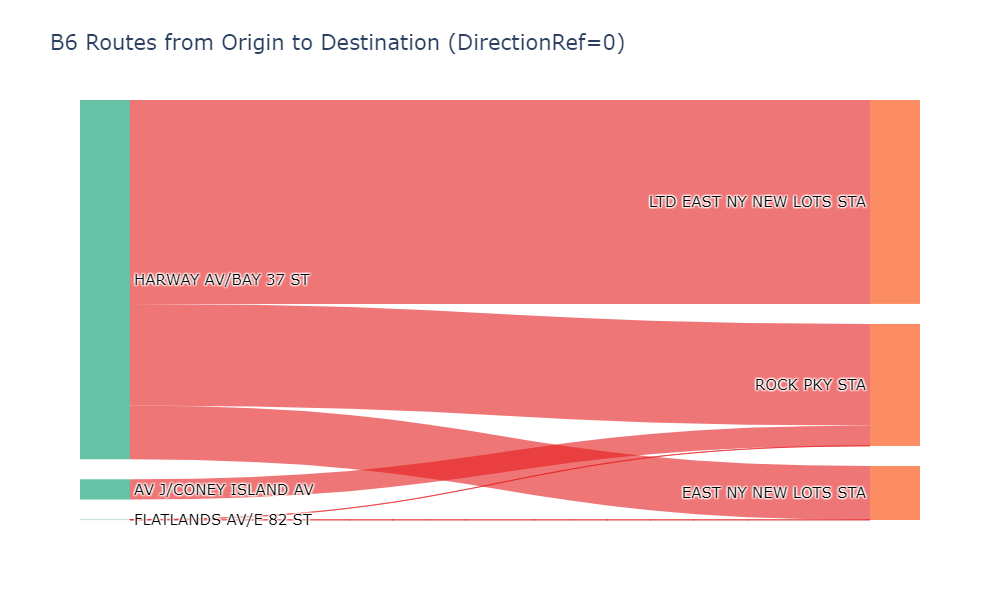

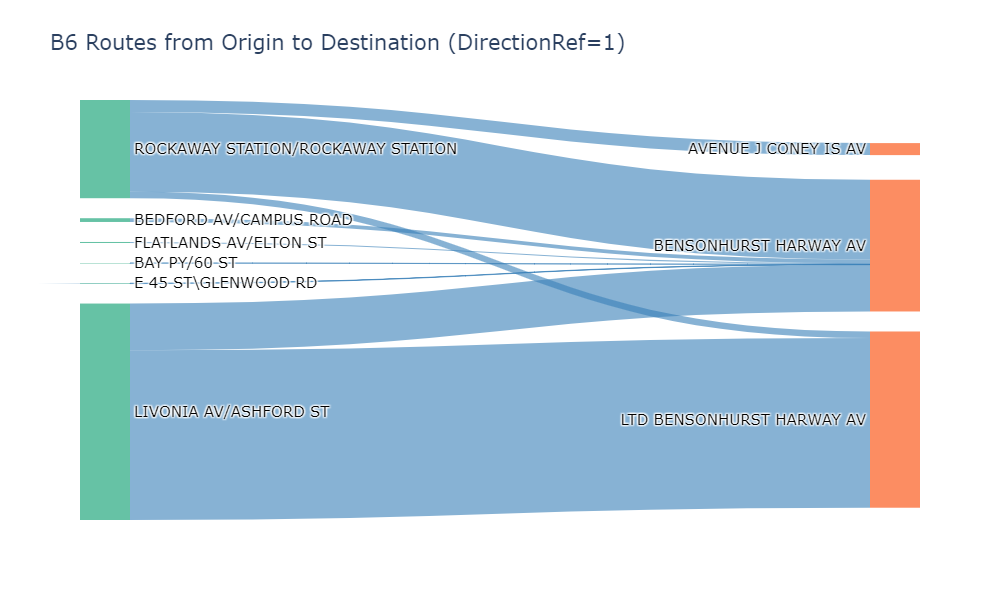

In [112]:
# static figure. just in case you cannot load the interactive plot, 
import plotly.io as pio

png_renderer = pio.renderers["png"]
png_renderer.width = 1000
png_renderer.height = 600

pio.show(fig_0, renderer='png')
pio.show(fig_1, renderer='png')

Now the operation information of each rount is much clearer. From the sankey diagram we can have a better sense which route(s) has/have more records (indicating such route(s) are operated more frequently). 

But for the better part, we can easily spot which origin to which destination(s) and vice versa. 

In [27]:
# (A side note about visualization here, ask me about it you are interested.)
# Sorry, I couldn't remember exactely,
# don't attamp to use sankey diagram in EDA, it is very tricky to create. This one is just for presentaion

In [28]:
# analyze VehicleRef
df_trim.VehicleRef.value_counts().head(20)

# get PublishedLineName count info
df_vehref_count = df_trim.VehicleRef.value_counts()
df_vehref_count = pd.concat([df_vehref_count, df_vehref_count/df_vehref_count.sum()], axis=1)
df_vehref_count.columns=['count', 'ratio']
# df_line_count.head(10)

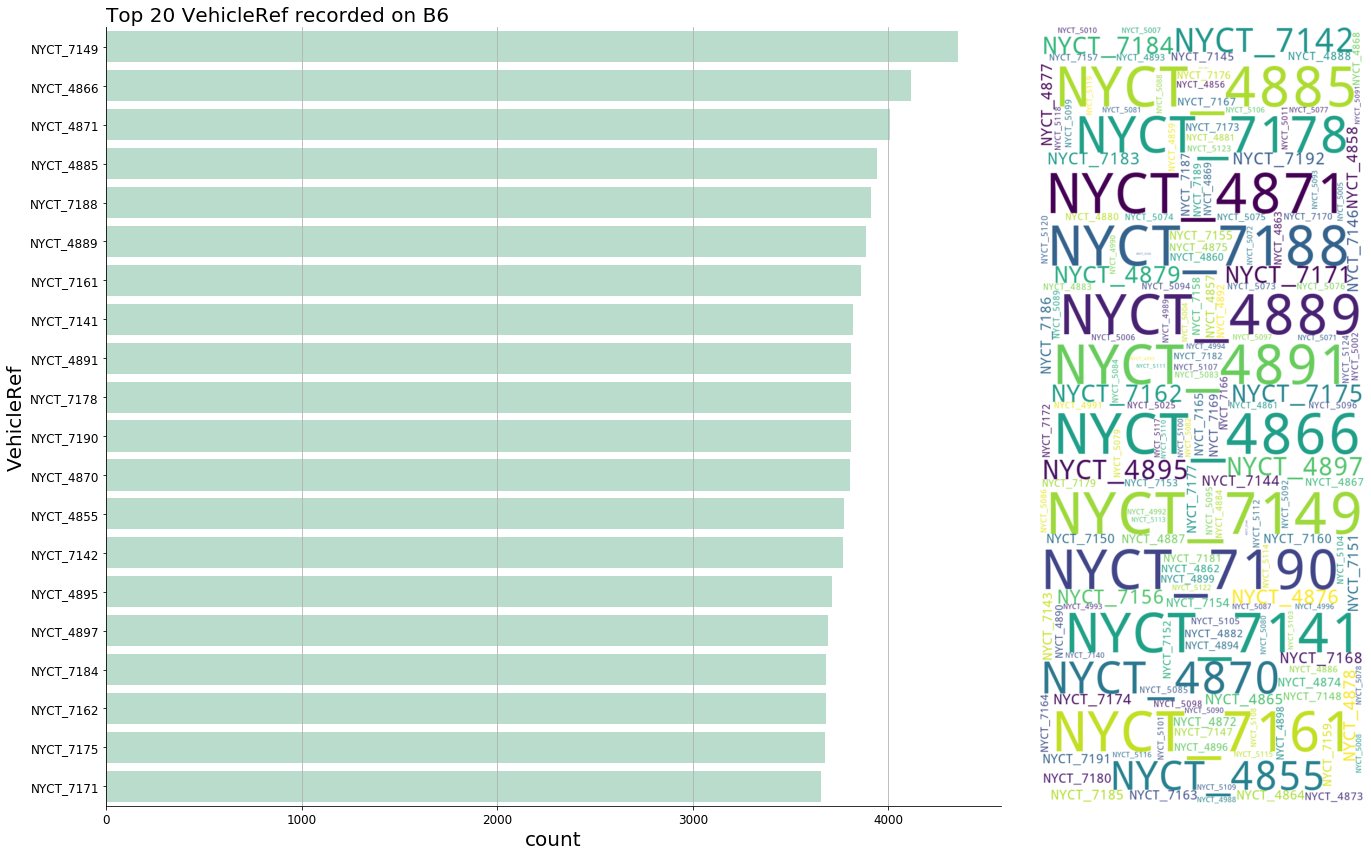

In [29]:
# visulize VehicleRef
number_to_take = 20
# plt.figure(figsize=(10,5))
fig, ax = plt.subplots(1,2,gridspec_kw={'width_ratios': [2, 1]}, figsize=(20,12))
array_tmp = np.array(df_vehref_count.sort_values(by='count').index[-number_to_take:])

sns.countplot(y=df_trim[df_trim.VehicleRef.isin(array_tmp)].VehicleRef, order=array_tmp[::-1], 
#              palette=sns.color_palette("Blues_d",number_to_take),
              color = sns.color_palette("Pastel2")[0],
              ax=ax[0]
             )
ax[0].set_title('Top {} VehicleRef recorded on B6'.format(number_to_take), loc='left', fontsize=20)
ax[0].spines['top'].set_color('none')
ax[0].spines['right'].set_color('none')
ax[0].grid(axis='x')

ax[0].set_xlabel(ax[0].get_xlabel(), fontsize=20)
# ax.set_xlabel('missing rate', fontsize=20)
ax[0].set_ylabel(ax[0].get_ylabel(), fontsize=20)
ax[0].xaxis.set_tick_params(labelsize=12)
ax[0].yaxis.set_tick_params(labelsize=12)


from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

freq_dict = df_vehref_count.ratio.to_dict()
freq_dict
wc = WordCloud(background_color='white', random_state=RANDOM_STATE,
              width=200*3, height=240*6,)
wc.generate_from_frequencies(frequencies=freq_dict)
ax[1].imshow(wc, interpolation='bilinear', )
ax[1].axis("off")
# ax[1].grid('x')
plt.tight_layout()
plt.show()

### Short summary here
Here is a brief analysis on the operation info, 'PublishedLineName', 'DirectionRef', 'DestinationName', 'NextStopPointName', and 'VehicleRef'. Since all of them are categorical variables, I just analyze and visualize the counts of these features. Nothing very exciting so far, let's move on and take a look at the geometric data.

In [30]:
### details alert 

# use either pivot_table or groupby will do the job, but first need to make sure the 'right' hierachy. 
# this become super tricky when the relashionship is nested on both up and down direction.
# use the domain knowledge,(many times domain knowledge = common sense) check with the series.unique(), check with serieres.values_counts(), 
# sometimes need to rename and group those rare name instance, but don't do it right away, this might be related to NLP

> # Geometric features <a id='geo_info'></a> 
###  <div style="text-align: right"> [back to main](#main) </div>

# Things start to become more interesting when combining geometric data
recall the geo data ara

gps coordinates
- OriginLat (static)
- OriginLong (static)
- DestinationLat (static)
- DestinationLong (static)
- VehicleLocation.Latitude (dynamic)
- VehicleLocation.Longitude (dynamic)

relative location
- ArrivalProximityText (dynamic)
- DistanceFromStop (dynamic)



Finally, we have some numerical variables to play with, hooray :) 



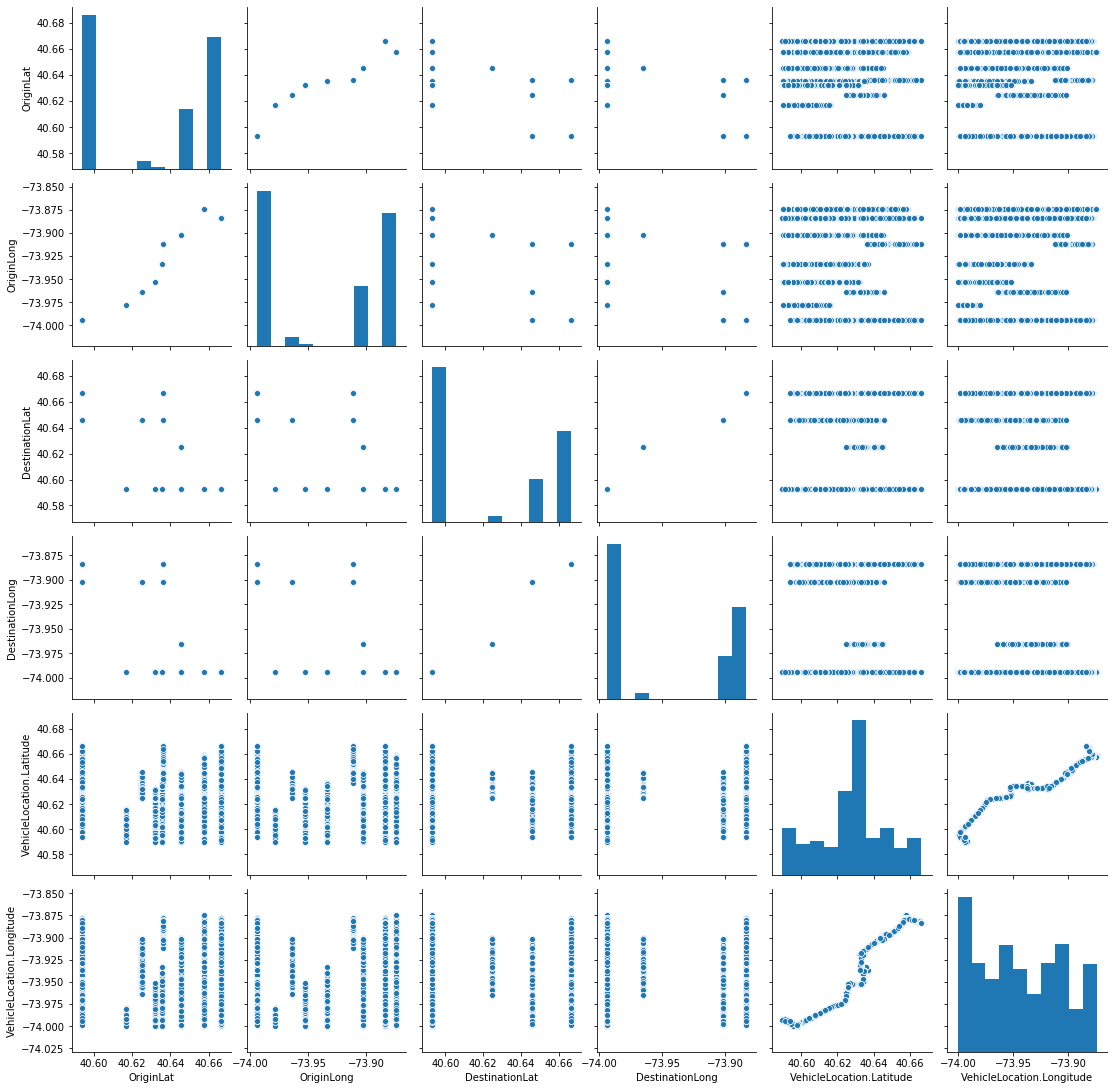

In [31]:
sns.pairplot(data=df_trim, vars=['OriginLat', 'OriginLong', 'DestinationLat', 'DestinationLong', 'VehicleLocation.Latitude', 'VehicleLocation.Longitude'])

Many times, it is very convenient to use sns.pairplot for EDA(notes*), since it can show both univariant distribution and co-relationship. But for GPS data, we should use pairplot in a different way. i.e.it doesn't make much sense to point out high-correlationship like the one between 'VehicleLocation.Latitude' and 'VehicleLocation.Longitude'. Since GPS coordinates are more likely to be useful when they are paired to each other. On the other hand, we probabely should not take it seriously about univariant distribution either, i.e. a bus service can operate in a east to west, so with large variance in latitude but small in longitude, so, we can not draw conclusion about the overal operation range based on individual GPS columns.

So how to use such GPS data, probabely it is easier for me to just show you. As a reminder, don't forget to use the hierachical relationship about operation info.

notes*: Choose wisely. Put less than 20 features for pairplot. Actually, I would say 10 is the maxium you should try. It is overwhelming for both of your eyes and the computer when the number of features to pair is too large.

### Extract the bus stop coordinate. Feature engeering again. I told you it is important.

In [32]:
# this one to check legit (), by rule, the origin and desination GPS should be unique for each route
df_legit_check = pd.pivot_table(df_trim,index=['DirectionRef', 'OriginName', 'DestinationName'], observed=True,
               values=['OriginLat', 'OriginLong', 'DestinationLat', 'DestinationLong', ], 
                                aggfunc=lambda x: list(x.unique()) )
# uncomment if desired
# df_legit_check 

In [33]:
# legit check cont'
# pd.pivot_table(df_trim,index=['DirectionRef', 'OriginName', 'DestinationName'], observed=True,
#                values=['OriginLat', 'OriginLong', 'DestinationLat', 'DestinationLong',], aggfunc=[lambda x: x.name if x.name=='DestinationLat' else 0] ).sort_values(by=['DirectionRef'])               

In [34]:
# use this intimidating pivot table to route info
df_route = pd.pivot_table(df_trim,index=['DirectionRef', 'OriginName', 'DestinationName'], observed=True,
               values=['OriginLat', 'OriginLong', 'DestinationLat', 'DestinationLong', 'NextStopPointName', 'VehicleRef'], 
                          aggfunc=lambda x: list(x.unique()) if x.name=='NextStopPointName' else (x.count() if x.name=='VehicleRef' else x.mean()) )\
.reset_index()\
[['DirectionRef', 'OriginName', 'DestinationName', 'OriginLat', 'OriginLong', 'DestinationLat', 'DestinationLong', 'NextStopPointName', 'VehicleRef']]\
.rename({'NextStopPointName':'NextStopPointName_noOrder', 'VehicleRef': 'count'}, axis='columns')\
.sort_values(by=['DirectionRef','count'], ascending=[True, False])

df_route.head()

DirectionRef            OriginName           DestinationName  OriginLat  OriginLong  DestinationLat  DestinationLong                          NextStopPointName_noOrder   count
4             0   HARWAY AV/BAY 37 ST  LTD EAST NY NEW LOTS STA  40.593510  -73.993996       40.666420       -73.883386  [AV J/E 5 ST, GLENWOOD RD/FLATBUSH AV, BAY PY/...  105715
5             0   HARWAY AV/BAY 37 ST              ROCK PKY STA  40.593510  -73.993996       40.645775       -73.902070  [BAY PY/86 ST, AV J/OCEAN PY, AV J/CONEY ISLAN...   52684
3             0   HARWAY AV/BAY 37 ST      EAST NY NEW LOTS STA  40.593510  -73.993996       40.666420       -73.883386  [GLENWOOD RD/E 98 ST, AV H/E 56 ST, BAY PY/STI...   27872
0             0  AV J/CONEY ISLAND AV              ROCK PKY STA  40.624829  -73.964228       40.645775       -73.902070  [BEDFORD AV/AV J, GLENWOOD RD/NOSTRAND AV, GLE...   10501
1             0  FLATLANDS AV/E 82 ST      EAST NY NEW LOTS STA  40.636307  -73.911844       40.666420       -73.883386  [FLATLANDS AV/E 88 ST, GLENWOOD RD/WILLIAMS AV...     138

In [35]:
# feature engineering add next stop lat and long
# add new features using mapping by dict 
def add_feature_location():
    df_trim = reset_dataset()
    
    # feature engineering add next stop lat and long
    # add new features using mapping by dict 
    df_stop_location_direct0 = df_trim[(df_trim.DirectionRef==0) & (df_trim.ArrivalProximityText=='at stop')].groupby(by='NextStopPointName')[['DirectionRef','VehicleLocation.Latitude', 'VehicleLocation.Longitude']].min()
    # df_stop_location_direct0
    df_stop_location_direct1 = df_trim[(df_trim.DirectionRef==1) & (df_trim.ArrivalProximityText=='at stop')].groupby(by='NextStopPointName')[['DirectionRef','VehicleLocation.Latitude', 'VehicleLocation.Longitude']].min()
    # df_stop_location_direct1
    dict_tmp = df_stop_location_direct0[['VehicleLocation.Latitude', 'VehicleLocation.Longitude']].to_dict()
    # dict_tmp['VehicleLocation.Latitude']
    # dict_tmp['VehicleLocation.Longitude']
    df_trim.loc[df_trim.DirectionRef==0,'next_stop_Lat'] = df_trim[df_trim.DirectionRef==0]['NextStopPointName'].map(dict_tmp['VehicleLocation.Latitude'])
    df_trim.loc[df_trim.DirectionRef==0,'next_stop_Long'] = df_trim[df_trim.DirectionRef==0]['NextStopPointName'].map(dict_tmp['VehicleLocation.Longitude'])

    dict_tmp = df_stop_location_direct1[['VehicleLocation.Latitude', 'VehicleLocation.Longitude']].to_dict()
    df_trim.loc[df_trim.DirectionRef==1,'next_stop_Lat'] = df_trim[df_trim.DirectionRef==1]['NextStopPointName'].map(dict_tmp['VehicleLocation.Latitude'])
    df_trim.loc[df_trim.DirectionRef==1,'next_stop_Long'] = df_trim[df_trim.DirectionRef==1]['NextStopPointName'].map(dict_tmp['VehicleLocation.Longitude'])
    
    return df_trim
    
df_trim = add_feature_location()
df_trim.head(5)

RecordedAtTime  DirectionRef PublishedLineName             OriginName  OriginLat  OriginLong        DestinationName  DestinationLat  DestinationLong VehicleRef  VehicleLocation.Latitude  VehicleLocation.Longitude       NextStopPointName ArrivalProximityText  DistanceFromStop  ExpectedArrivalTime ScheduledArrivalTime  next_stop_Lat  next_stop_Long
20   2017-06-01 00:03:41             0                B6    HARWAY AV/BAY 37 ST  40.593510  -73.993996   EAST NY NEW LOTS STA       40.666420       -73.883385  NYCT_7158                 40.645676                 -73.901474     GLENWOOD RD/E 98 ST              at stop               4.0  2017-06-01 00:03:56             24:05:00      40.645525      -73.901708
91   2017-06-01 00:03:42             1                B6  LIVONIA AV/ASHFORD ST  40.666382  -73.883614  BENSONHURST HARWAY AV       40.592949       -73.993385  NYCT_4989                 40.666288                 -73.883834  ASHFORD ST/NEW LOTS AV        < 1 stop away             158.0  2017-06-01 00:03:56             24:04:27      40.665816      -73.883258
191  2017-06-01 00:03:27             1                B6  LIVONIA AV/ASHFORD ST  40.666382  -73.883614  BENSONHURST HARWAY AV       40.592949       -73.993385  NYCT_4861                 40.642107                 -73.903071    FLATLANDS AV/E 94 ST              at stop              11.0  2017-06-01 00:03:56             23:49:19      40.642039      -73.903177
221  2017-06-01 00:03:25             0                B6    HARWAY AV/BAY 37 ST  40.593510  -73.993996   EAST NY NEW LOTS STA       40.666420       -73.883385  NYCT_7151                 40.633125                 -73.923898            AV H/E 56 ST          approaching             143.0  2017-06-01 00:04:05             24:05:48      40.633210      -73.922553
294  2017-06-01 00:03:49             1                B6  LIVONIA AV/ASHFORD ST  40.666382  -73.883614  BENSONHURST HARWAY AV       40.592949       -73.993385  NYCT_7174                 40.626191                 -73.952191            AV J/E 23 ST          approaching             144.0  2017-06-01 00:04:22             24:05:08      40.626004      -73.953891

In [36]:
### details alert 
# the main idea is to match the bus real-time GPS data with the bus stop GPS coords.
# need to check out the meaning of 'at stop' in ArrivalProximityText, i.e. when bus stop at stopA, does next stop mean the right now stop or the next to go
# there is a following legit check of GPS data quality, i.e. whether it is precise

# use the 9+6 different route info to plot the following plot.

In [37]:
# customer function use to plot bus route, use:
# EXAMPLE:
# plot_bus_route(lay_out_row=2, lay_out_col=3, figsize=(20,20), dir_ref=0)
# plot_bus_route(lay_out_row=3, lay_out_col=3, figsize=(20,30), dir_ref=1)
def plot_bus_route(lay_out_row=2, lay_out_col=3, figsize=(20,20), dir_ref=0):
    fig, axes = plt.subplots(lay_out_row,lay_out_col,figsize=figsize)
    for route_index in range(lay_out_row*lay_out_col):
        origin = df_route[df_route.DirectionRef==dir_ref].OriginName.values[route_index]
        destination = df_route[df_route.DirectionRef==dir_ref].DestinationName.values[route_index]
    #     mappin
        row_now = np.where(np.arange(lay_out_row*lay_out_col).reshape(lay_out_row,lay_out_col) == route_index)[0][0]
        col_now = np.where(np.arange(lay_out_row*lay_out_col).reshape(lay_out_row,lay_out_col) == route_index)[1][0]
        ax=axes[row_now, col_now]

        # plot base service path
        sns.scatterplot(x=df_trim['VehicleLocation.Latitude'], y=df_trim['VehicleLocation.Longitude'], label='Service path',legend=False,
    #                     hue=df_trim.DirectionRef, palette=sns.color_palette("Set1", 2),
                        color=sns.color_palette("Set1")[dir_ref],
                       s=10, ax=ax)
        # plot origin and destination
        condition_tmp = (df_route.DirectionRef==dir_ref) & (df_route.OriginName==origin) & (df_route.DestinationName==destination)
        sns.scatterplot(x=[df_route[condition_tmp].OriginLat.values], y=[df_route[condition_tmp].OriginLong.values], label='Origin',
                       s=500, alpha=0.8, color=sns.color_palette("Set2")[0], ax=ax)
        sns.scatterplot(x=[df_route[condition_tmp].DestinationLat.values], y=[df_route[condition_tmp].DestinationLong.values], label='Destination',
                       s=500, alpha=0.8, color=sns.color_palette("Set2")[1], ax=ax)
        # plot bus stop on the route
        condition_tmp = (df_trim.DirectionRef==dir_ref) & (df_trim.OriginName==origin) & (df_trim.DestinationName==destination)
        df_tmp = df_trim[condition_tmp & (df_trim.DistanceFromStop==0) ]
        sns.scatterplot(x=df_tmp['VehicleLocation.Latitude'], y=df_tmp['VehicleLocation.Longitude'],
                        label='Bus stops',
                       s=50, alpha=0.8, color=sns.color_palette("Set1")[dir_ref], ax=ax)
        ax.set_title(' DirectionRef= {},\n OriginName= {},\n DestinationName= {}'.format(dir_ref, origin, destination ), loc='left')
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        ax.grid(b=None, which='major', axis='both', )
        if row_now < lay_out_row-1:
            ax.set_xlabel('')    
            ax.spines['bottom'].set_color('none')
            ax.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
        if col_now >0:
            ax.set_ylabel('')            
            ax.spines['left'].set_color('none')
            ax.tick_params(
            axis='y',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelleft=False) # labels along the bottom edge are off
    plt.tight_layout()
    plt.show()

# plot_bus_route(lay_out_row=3, lay_out_col=3, figsize=(20,30), dir_ref=1)

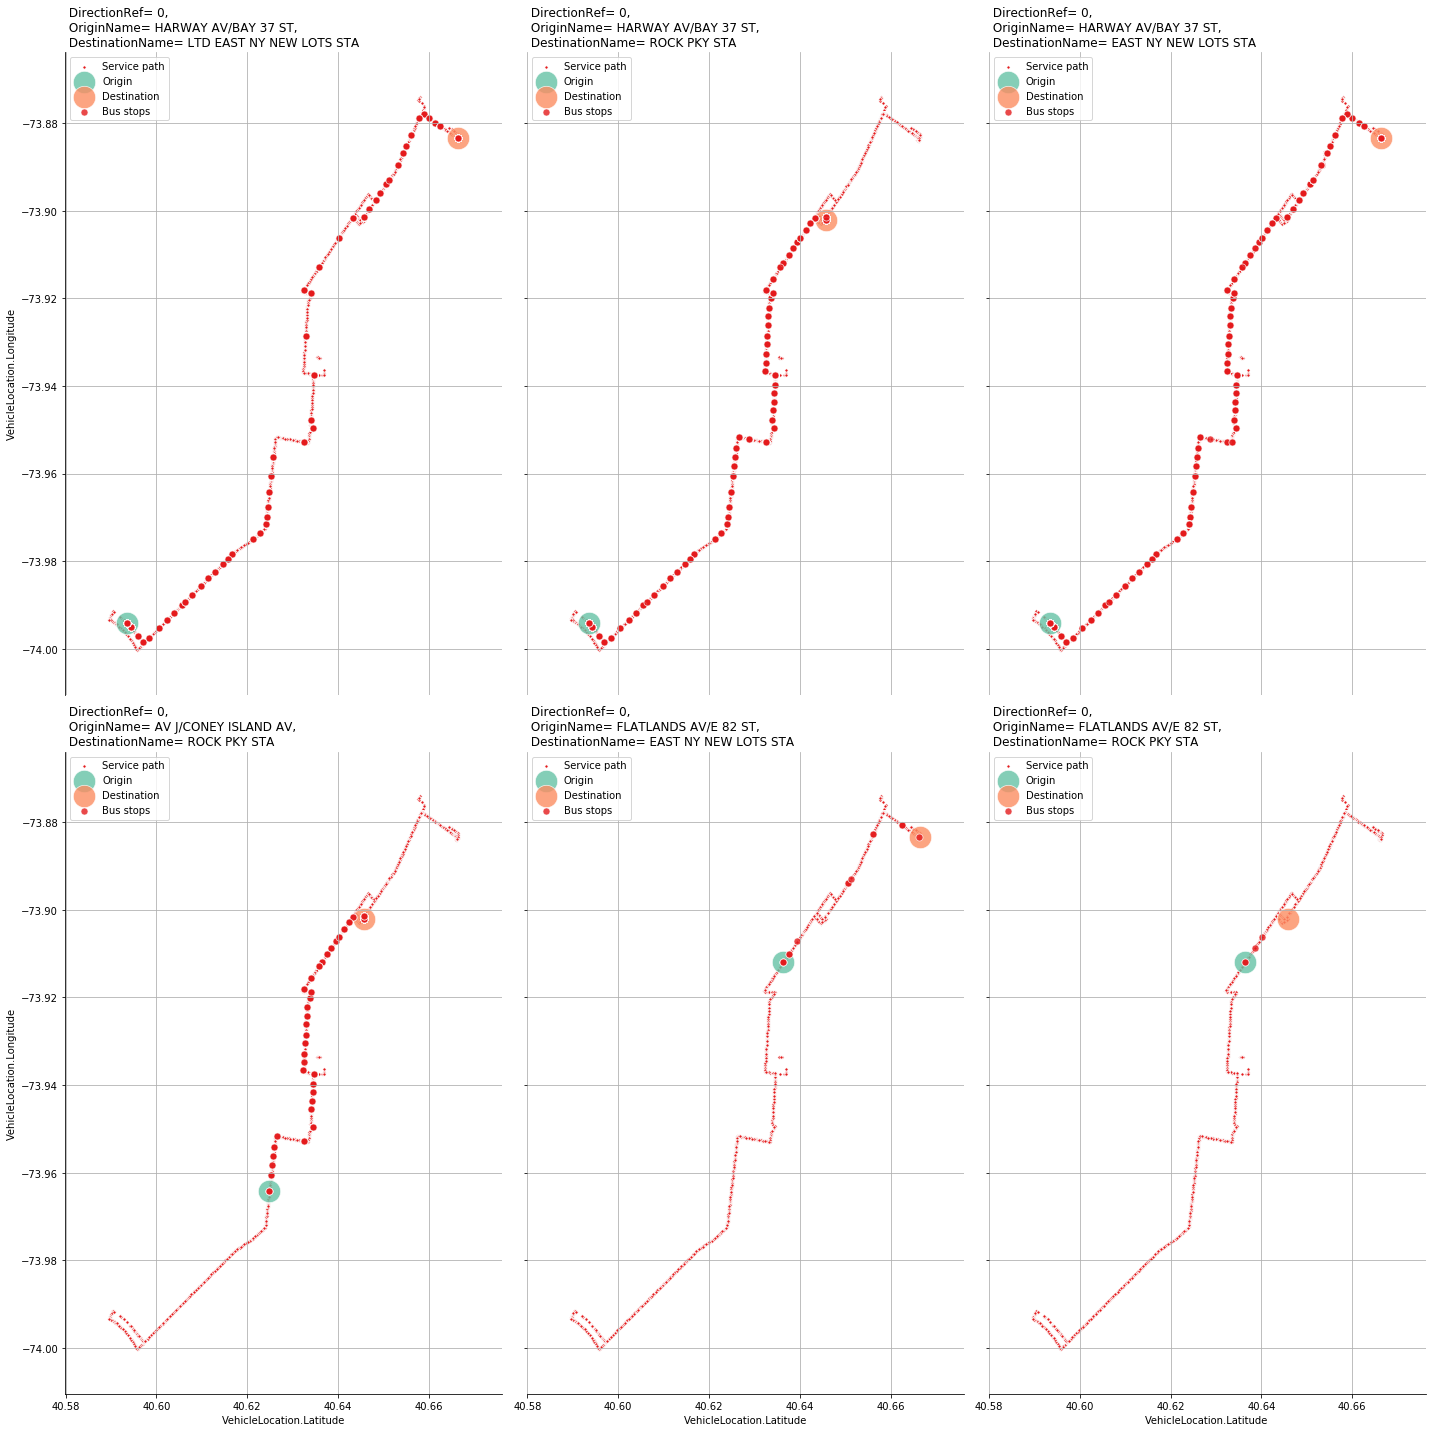

In [38]:
# customer function use to plot bus route,
plot_bus_route(lay_out_row=2, lay_out_col=3, figsize=(20,20), dir_ref=0)


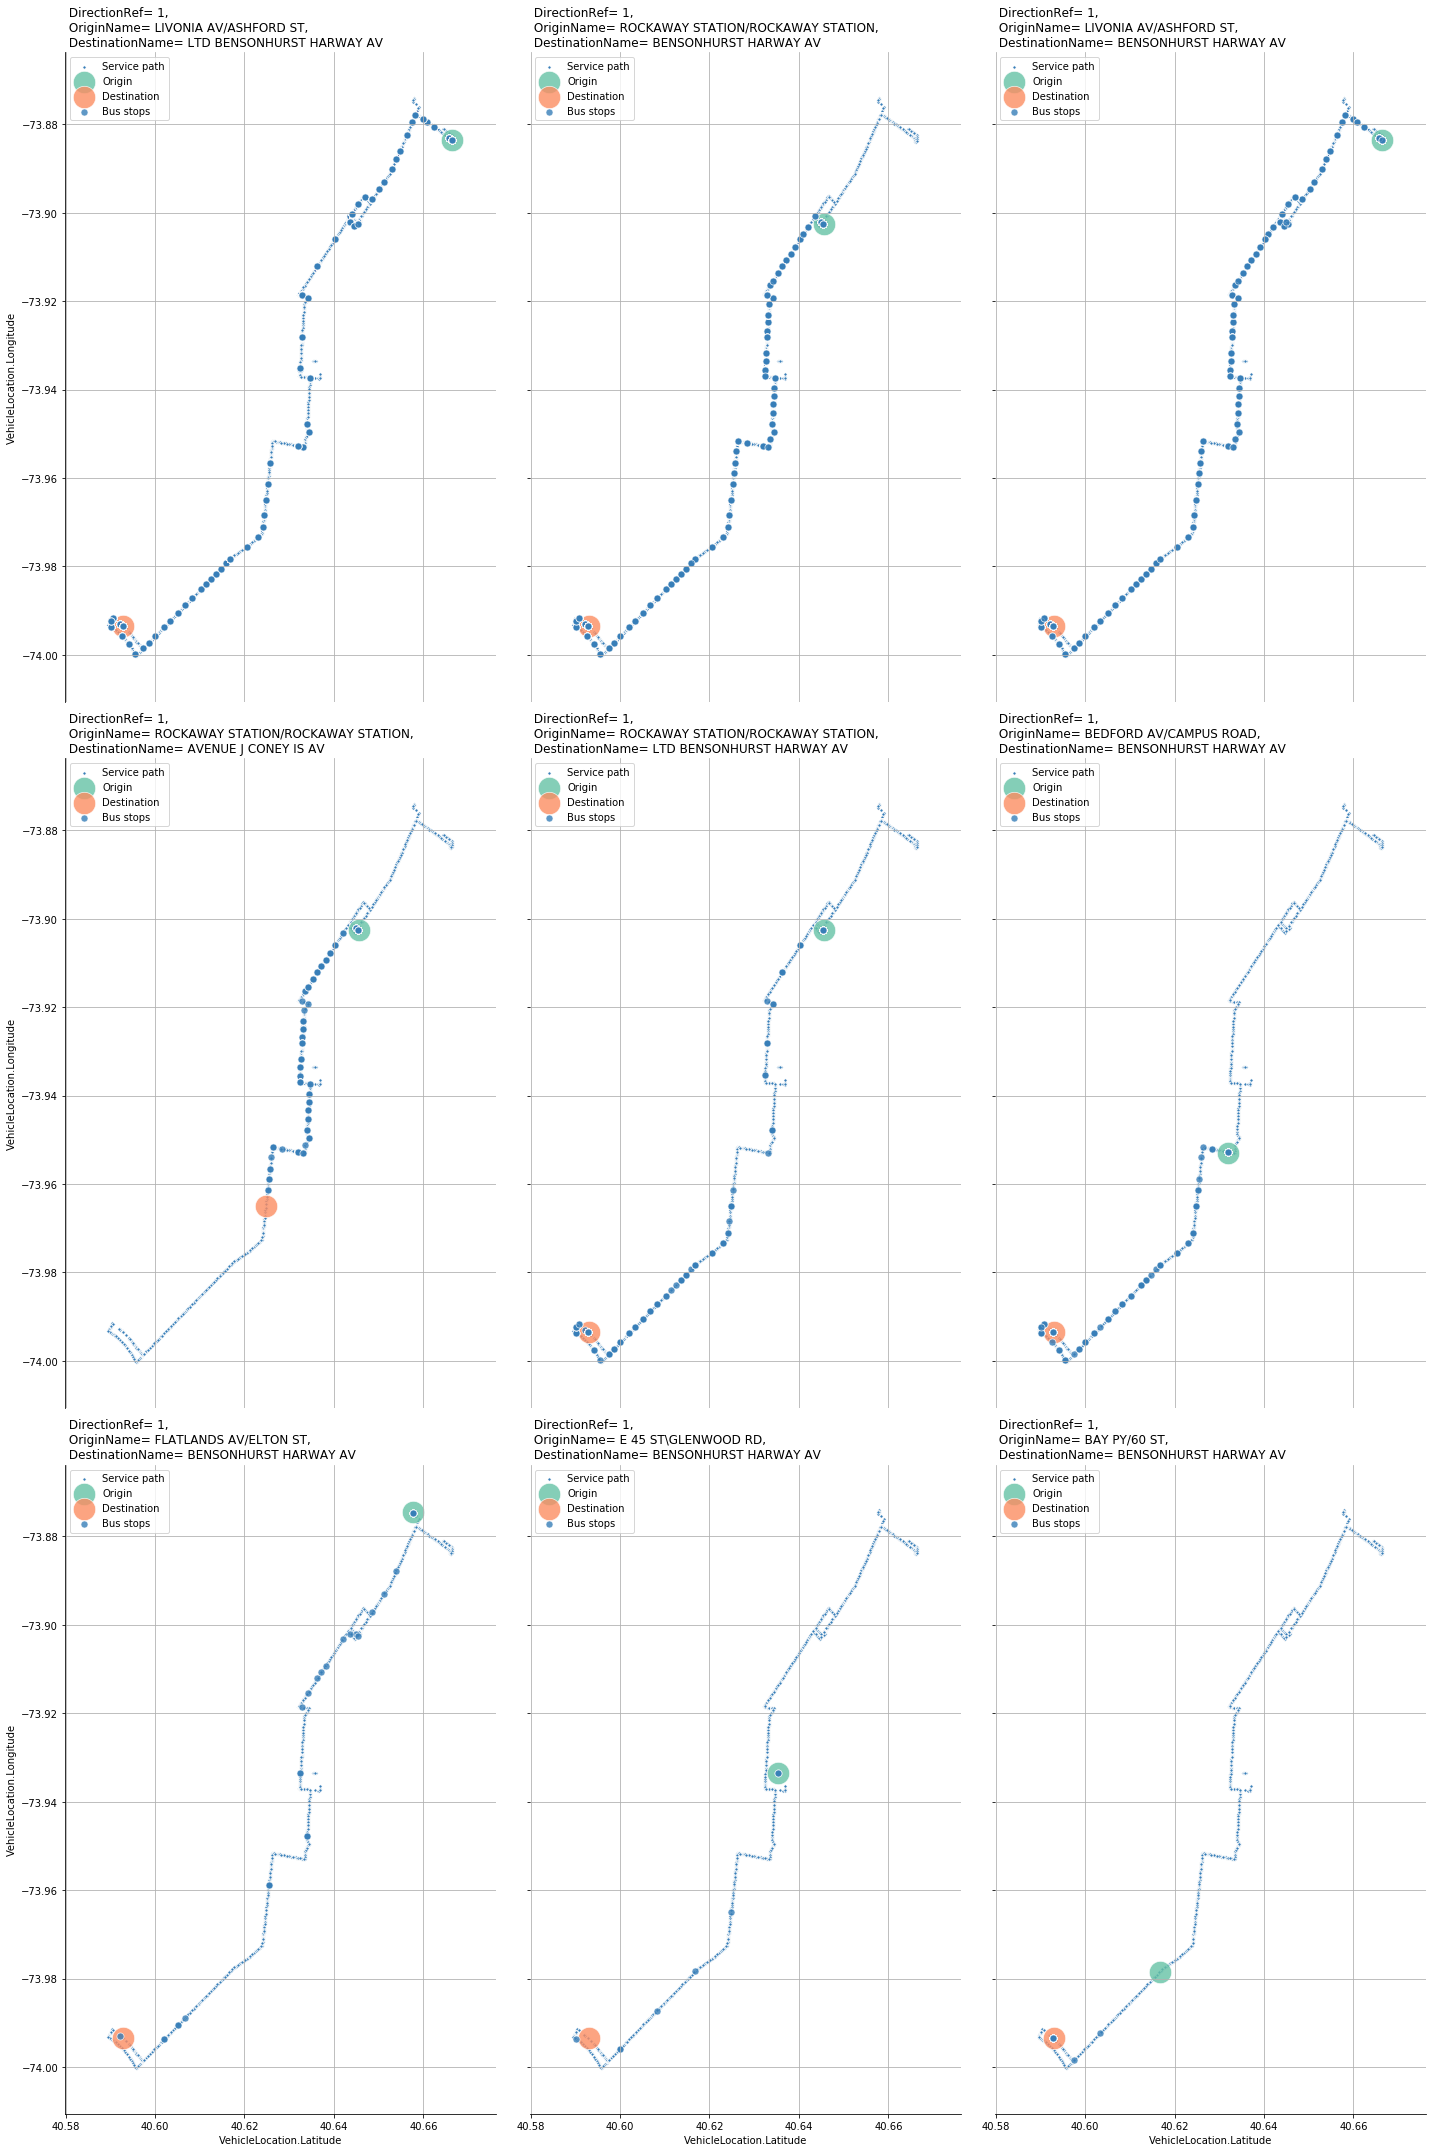

In [39]:
# customer function use to plot bus route,
plot_bus_route(lay_out_row=3, lay_out_col=3, figsize=(20,30), dir_ref=1)


### Wake up
If the former analysis is too boring I hope this plot can wake you up, because it tells a more detailed story about the B6 service line.

Recall that there 15 different routes running on B6 service line, the one you are looking right now is from 'HARWAY AV/BAY 37 ST' to 'LTD EAST NY NEW LOTS STA' and its DirectionRef is '0'.

The GPS coordinates show the route path. (Note0*). Also we know the origin and destination of this route and we can almost assure that 'DirectionRef==0' indicates that the buses operate from down left to upper right or from South West to  North East (remember that the buses are in NY). 

The red dots display the bus stops on this route. You might wonder how I achieve this information from the data, since the raw data doesn't apply bus stop GPS features. Again, if you are interested I can talk about how I dig out such information in more details. Just a hint, I performed feature engineering used all the geo info data especially 'DistanceFromStop'. This is once again a reminder that feature engineering is so powerful and essential in the machine learning pipeline.

Now it makes more sense now why some routes have more records than the others. Because they have to operate at longer distance and/or have to operate at more stops. Or simply becasue the bus operation company dispatch more buses on such routes, while the other routes with very limited stops were just emergy operation. 

Also it would bring our attention to details which might otherwise ignore. i.e. route from 'HARWAY AV/BAY 37 ST' to 'LTD EAST NY NEW LOTS STA' and route from 'HARWAY AV/BAY 37 ST' to 'EAST NY NEW LOTS STA' have exactely the same origin and destination. But we cannot rename 'LTD EAST NY NEW LOTS STA' to 'EAST NY NEW LOTS STA' or vice versa, because it would ignore the fact that the former route has less stops than the latter's. Which might as well to make us realize that the name 'LTD' indicates somthing like 'limited transportaion district' or something else that sounds more meaningful to you. 


Note0*: I plot GPS for buses with both 'DirectionRef==0' and 'DirectionRef==1', and distinguished by red and blue color.



In [40]:
# A note for myself
# maybe enxt time we can try to unsupervised-learn or semi-supervised learn the busstop coords by using machine learing.

### There is more story to tell

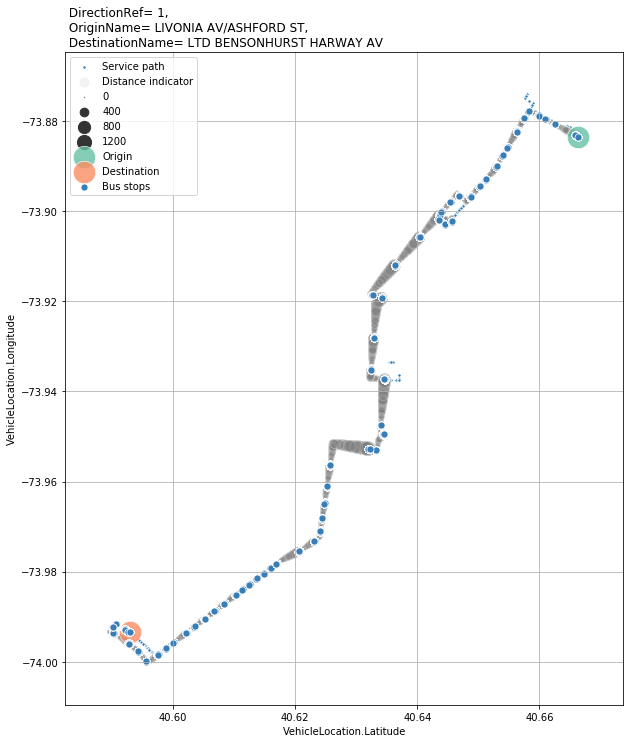

In [41]:
# pick a route to an analyze, i.e. route_index = 6, 11, 9, 

route_index = 6
# dir_ref = 1
dir_ref = df_route.DirectionRef.values[route_index]
origin = df_route.OriginName.values[route_index]
destination = df_route.DestinationName.values[route_index]
stops_list = df_route.NextStopPointName_noOrder.values[route_index]

fig, ax = plt.subplots(1,1,figsize=(10,12))
# plot base service path
sns.scatterplot(x=df_trim['VehicleLocation.Latitude'], y=df_trim['VehicleLocation.Longitude'], label='Service path',
#                 hue=df_trim.DirectionRef, palette|=sns.color_palette("Set1", 2),
               s=10, ax=ax)
# plot spot to indicate distance from next stop
condition_tmp = (df_trim.DirectionRef==dir_ref) & (df_trim.OriginName==origin) & (df_trim.DestinationName==destination)
# condition_tmp = (df_trim.DirectionRef==dir_ref) 
df_tmp = df_trim[condition_tmp ]
# df_tmp = df_trim[condition_tmp]
sns.scatterplot(x=df_tmp['VehicleLocation.Latitude'], y=df_tmp['VehicleLocation.Longitude'],
                label='Distance indicator',
               size=df_tmp.DistanceFromStop.values, 
#                 s=100,
                alpha=0.1, 
                sizes=(0.1, 200),
#                 hue = df_tmp.DistanceFromStop.values, 
#                 color=sns.color_palette("Set1")[dir_ref], 
                color='grey',
#                 palette_temp = [sns.color_palette("Set1"), sns.color_palette("Set1")],
#                 palette=sns.color_palette("Blues", len(df_tmp.DistanceFromStop.values)),
                ax=ax)
# plot origin and destination
condition_tmp = (df_route.OriginName==origin) & (df_route.DestinationName==destination)
sns.scatterplot(x=[df_route[condition_tmp].OriginLat.values], y=[df_route[condition_tmp].OriginLong.values], label='Origin',
               s=500, alpha=0.8, color=sns.color_palette("Set2")[0], ax=ax)
sns.scatterplot(x=[df_route[condition_tmp].DestinationLat.values], y=[df_route[condition_tmp].DestinationLong.values], label='Destination',
               s=500, alpha=0.8, color=sns.color_palette("Set2")[1], ax=ax)


# plot bus stop on the route
condition_tmp = (df_trim.DirectionRef==dir_ref) & (df_trim.OriginName==origin) & (df_trim.DestinationName==destination)
# df_tmp = df_trim[condition_tmp & (df_trim.DistanceFromStop==0) ]
df_tmp = df_trim[condition_tmp & (df_trim.ArrivalProximityText=='at stop') ]
sns.scatterplot(x=df_tmp['VehicleLocation.Latitude'], y=df_tmp['VehicleLocation.Longitude'],
                label='Bus stops',
               s=50, 
#                 alpha=0.8, 
                color= sns.color_palette("Set1")[dir_ref], ax=ax
               )

ax.set_title(''' DirectionRef= {},\n OriginName= {},\n DestinationName= {} '''.format(dir_ref, origin, destination, ), loc='left')
plt.grid(b=None, which='major', axis='both', )
plt.show()

### A detour: talk about measurement quality
One thing should draw our attention when dealing with spatial data like GPS coordinates is the measurement <a target="https://en.wikipedia.org/wiki/Accuracy_and_precision" href="{}">precision and trueness(wikipedia)</a>. For this data set the desimal is at 1e-6, associated with 10 cm (4 inches), which is denfinetely precise enough for bus operation study. 

But what about the trueness. Though it is non-trivial to judge the trueness of the measuremnt by a simple glance, one way to do that is by evaluating the consistency. From our data, the orgin and/or destination GPS has 1e-6 difference but not constant. (It would raise a red flag if measuremnt has 0-variance since no measuremnt in the real world is constant.) 

Some data is directely measurement like GPS coordinates but some are from derivation, i.e. 'DistanceFromStop', normally such data can be derive from GPS coordinates, but this is not trivial. i.e. It would not be correct if we calculate the distance between two points on the bus route without considering the local geometry, like streets. The following plot is an example to use visualization to check the quality of such data. Note that I use marker size to indicate the value of 'DistanceFromStop' and immediately you can see how the marker size shrink when the bus is approching the NEXT bus stops. You can tell the derived distance data is good since the change of the marker size is smooth. And you can tell the distance calulation algorithm has considered the actual local enviroment instead of measuring a straight line bewteen two points.

Also, even though we can pretty much guess the meaning of the variables by their names, but don't take it for granted. i.e. when it says 'at stop', what does 'NextStopPointName' indicate? Is it the stop right now or the one it is going to? Whoever named the variable might have a different idea as what the name means in your head. So, always check with several features and try to prove that.



In [42]:
# A small challenge. 
# It didn't say what unit is used for DistanceFromStop. What would be your approach to find out what unit is used? meter? feet?

### Relative location data analysis

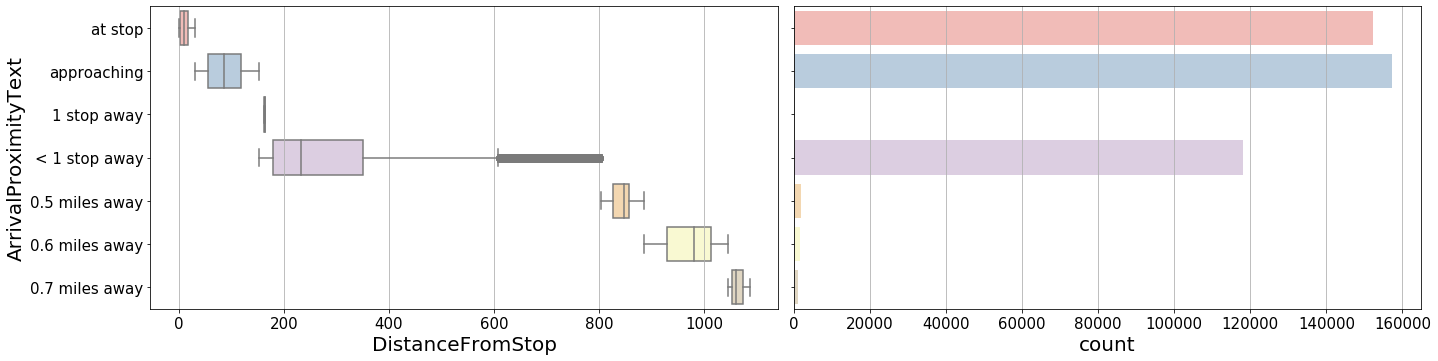

In [43]:
# relation of features
fig, ax = plt.subplots(1,2,figsize=(20,5))
order_tmp = df_trim.groupby('ArrivalProximityText')['DistanceFromStop'].mean().reset_index().sort_values('DistanceFromStop').ArrivalProximityText.unique()
sns.boxplot(x=df_trim.DistanceFromStop, y=df_trim.ArrivalProximityText, order=order_tmp, ax=ax[0], palette="Pastel1")
sns.countplot(y=df_trim.ArrivalProximityText, order=order_tmp, ax=ax[1], palette="Pastel1")
ax[0].tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected  
    labelsize=15) # labels along the bottom edge are off
ax[1].set_ylabel('')            
ax[1].tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected  
    labelleft=False,
    labelsize=15) 
plt.tight_layout()
ax[0].set_xlabel(ax[0].get_xlabel(), fontsize=20)
ax[0].set_ylabel(ax[0].get_ylabel(), fontsize=20)
ax[1].set_xlabel(ax[1].get_xlabel(), fontsize=20)
ax[0].grid(axis='x')
ax[1].grid(axis='x')

plt.show()

Immediately we can see that 'DistanceFromStop' is highly correlated with 'ArrivalProximityText', if not somewhat deterministic.

Also you can see that a large proportion of recorded buses 'ArrivalProximityText' are 'approaching' or 'at stop', which indicates that the distance between bus stops are relatively short.

But it is not very clear what's difference between '1 stop away' and '<1 stop away' based on the name, i.e. why '1 stop away' has shorter distanceFromStop than '<1 stop away'?

> # DateTime features <a id='datatime_info'></a> 
###  <div style="text-align: right"> [back to main](#main) </div>

Let's move on and analyze the time info

- To help our analysis, it is convenient to parse the datetime data into different features, i.e. year, month, day, etc.
- Special attention should be paid to 'ScheduledArrivalTime'. In the original dataset, instead of using standard 24 hours system, 'ScheduledArrivalTime' has ours from 0 to 26. Also date info is not included in the feature. There is some tedious data wraglling work to do for this feature.

In [44]:
# parse recordtime to hour, min, sec 
def feature_engeering_dataset(): 
    
    df_trim = add_feature_location()
    
    df_trim['RecordTime_month'] = pd.to_datetime(df_trim.RecordedAtTime).dt.month.astype(dtype='int32')
    df_trim['RecordTime_day'] = pd.to_datetime(df_trim.RecordedAtTime).dt.day.astype(dtype='int32')
    df_trim['RecordTime_weekday'] = pd.to_datetime(df_trim.RecordedAtTime).dt.dayofweek.astype(dtype='int32')
    
    df_trim['RecordTime_hour'] = pd.to_datetime(df_trim.RecordedAtTime, errors='coerce').dt.hour
    df_trim['RecordTime_min'] = pd.to_datetime(df_trim.RecordedAtTime, errors='coerce').dt.minute
    df_trim['RecordTime_sec'] = pd.to_datetime(df_trim.RecordedAtTime, errors='coerce').dt.second

    # parse expect arrival to hour, min, sec 
    df_trim['ExpectedArrivalTime_hour'] = pd.to_datetime(df_trim.ExpectedArrivalTime, errors='coerce').dt.hour
    df_trim['ExpectedArrivalTime_min'] = pd.to_datetime(df_trim.ExpectedArrivalTime, errors='coerce').dt.minute
    df_trim['ExpectedArrivalTime_sec'] = pd.to_datetime(df_trim.ExpectedArrivalTime, errors='coerce').dt.second

    # parse schedulearrival to hour, min, sec manually, use split to handel hour > 23
    df_trim['ScheduledArrivalTime_hour'] = df_trim['ScheduledArrivalTime'].str.split(':', 2).str[0].astype('int32')
    df_trim['ScheduledArrivalTime_min'] = df_trim['ScheduledArrivalTime'].str.split(':', 2).str[1].astype('int32')
    df_trim['ScheduledArrivalTime_sec'] = df_trim['ScheduledArrivalTime'].str.split(':', 2).str[2].astype('int32')
    # df_trim.ScheduledArrivalTime_hour
    
    # time to arrive next stop/diff_expected_and_record
    diff_expected_and_record = (pd.to_datetime(df_trim.ExpectedArrivalTime) - pd.to_datetime(df_trim.RecordedAtTime)).dt.total_seconds()
    df_trim['diff_expected_and_record'] = diff_expected_and_record

    # perform on the code
    # parse the date data
    df_record_datetime = pd.to_datetime(df_trim['RecordedAtTime'])
    # df_record_date
    df_schedule_date_addjust = df_record_datetime.dt.date.copy()
    # df_schedule_date_addjust
    # some logic to handle here
    condition_tmp = (df_trim.ScheduledArrivalTime_hour==23) & (df_trim.RecordTime_hour.isin([0,1]))
    df_schedule_date_addjust.loc[condition_tmp] = (df_record_datetime[condition_tmp] - pd.DateOffset(days=1)).dt.date
    # df_schedule_date_addjust
    condition_tmp = (df_trim.ScheduledArrivalTime_hour==24) & (df_trim.RecordTime_hour.isin([23,]))
    df_schedule_date_addjust.loc[condition_tmp] = (df_record_datetime[condition_tmp] + pd.DateOffset(days=1)).dt.date
    df_trim['ScheduledArrivalDate_adjust'] = df_schedule_date_addjust

    # parse the time data
    df_ScheduledArrivalTime_hour_standard = df_trim['ScheduledArrivalTime_hour'].apply(lambda x: x-24 if x>=24 else x)
    df_schedule_time_adjust = df_ScheduledArrivalTime_hour_standard.astype('str').apply(lambda x: '0'+x if len(x)==1 else x) +':' +\
                                                df_trim.ScheduledArrivalTime_min.astype('str').apply(lambda x: '0'+x if len(x)==1 else x) +':' +\
                                                df_trim.ScheduledArrivalTime_sec.astype('str').apply(lambda x: '0'+x if len(x)==1 else x)
    df_trim['schedule_time_addjust'] = df_schedule_time_adjust

    # combine
    df_trim['ScheduledArrivalTime_standand'] = df_schedule_date_addjust.astype('str') + ' ' + df_schedule_time_adjust.astype('str')
    # df_trim[df_trim.ScheduledArrivalTime_hour==23][['RecordedAtTime', 'ScheduledArrivalDate_adjust', 'ScheduledArrivalTime','ScheduledArrivalTime_standand']].head(5)

    # finally get the difference between expected and schedule
    diff_expected_and_scheduled = (pd.to_datetime(df_trim.ExpectedArrivalTime) - pd.to_datetime(df_trim.ScheduledArrivalTime_standand)).dt.total_seconds()
    df_trim['diff_expected_and_scheduled'] = diff_expected_and_scheduled


#     df_trim['schedule_period_of_day'] = pd.to_datetime(df_trim.ScheduledArrivalTime_standand).dt.hour // 6
    df_trim['schedule_day_of_month'] = pd.to_datetime(df_trim.ScheduledArrivalTime_standand).dt.day
    df_trim['schedule_hour_of_day'] = pd.to_datetime(df_trim.ScheduledArrivalTime_standand).dt.hour
    # day of the week parse
    cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    df_trim['schedule_day_of_week'] = pd.to_datetime(df_trim.ScheduledArrivalTime_standand).dt.day_name()
    from pandas.api.types import CategoricalDtype
    cat_type = CategoricalDtype(categories=cats, ordered=True)
    df_trim['schedule_day_of_week'] = df_trim['schedule_day_of_week'].astype(cat_type)
    
    
    return df_trim



df_trim = feature_engeering_dataset()


In [45]:
df_trim[['RecordedAtTime', 'ExpectedArrivalTime', 'ScheduledArrivalTime', 'ScheduledArrivalTime_standand']][(df_trim.ScheduledArrivalTime_hour>=24) |\
                                                                                                           (df_trim.ScheduledArrivalTime_hour<=2)].head()

RecordedAtTime  ExpectedArrivalTime ScheduledArrivalTime ScheduledArrivalTime_standand
20   2017-06-01 00:03:41  2017-06-01 00:03:56             24:05:00           2017-06-01 00:05:00
91   2017-06-01 00:03:42  2017-06-01 00:03:56             24:04:27           2017-06-01 00:04:27
221  2017-06-01 00:03:25  2017-06-01 00:04:05             24:05:48           2017-06-01 00:05:48
294  2017-06-01 00:03:49  2017-06-01 00:04:22             24:05:08           2017-06-01 00:05:08
514  2017-06-01 00:03:37  2017-06-01 00:04:17             24:04:29           2017-06-01 00:04:29

In [46]:
# df_trim.head(5)

### pairplot on hour, min, seconds

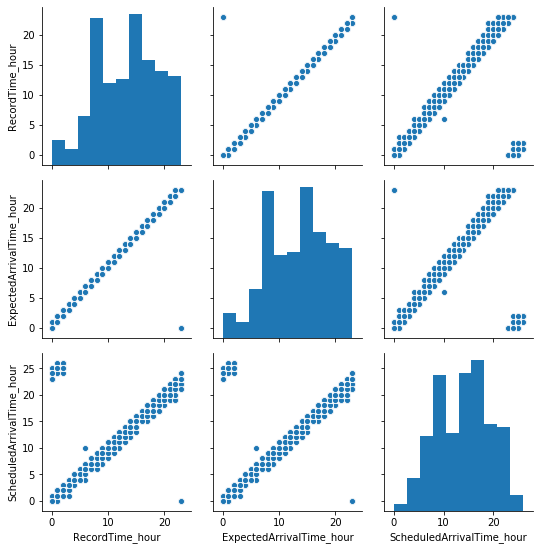

In [47]:
# hour
g = sns.pairplot(df_trim[['RecordTime_hour', 'ExpectedArrivalTime_hour', 'ScheduledArrivalTime_hour']])

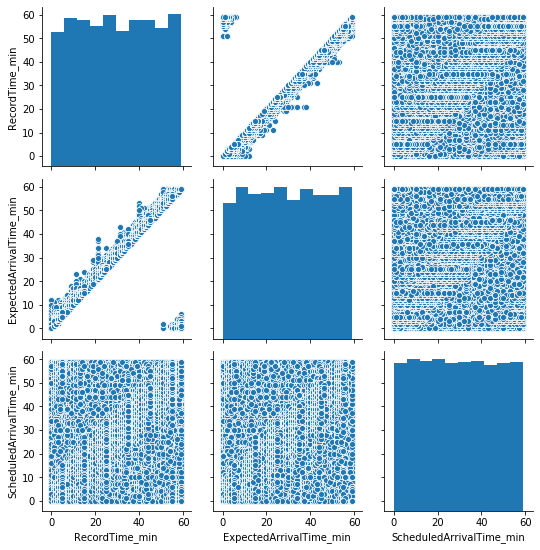

In [48]:
# minute
g= sns.pairplot(df_trim[['RecordTime_min', 'ExpectedArrivalTime_min', 'ScheduledArrivalTime_min']])

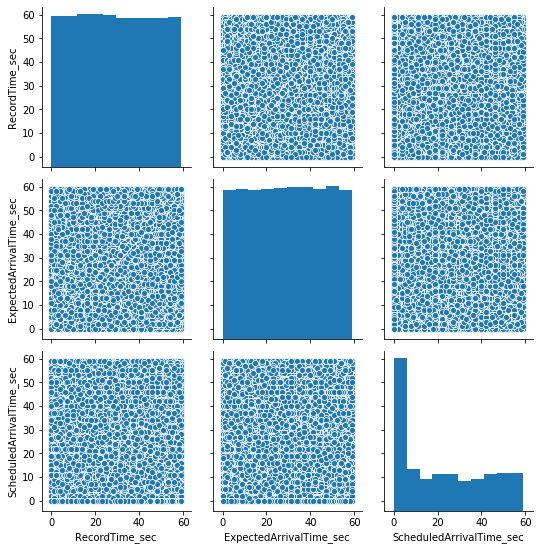

In [49]:
# seconds
g = sns.pairplot(df_trim[['RecordTime_sec', 'ExpectedArrivalTime_sec', 'ScheduledArrivalTime_sec']])

### It is not crazy to care about details
The data is not very surprising, hour data are highly correlated, which makes sense, since the shedule hour and actual arrival hour would not be that much of different. One thing you might notice is that the schedule arrival hour use a weird hour counting system, the maxium hour is 26, while the record hour and expected hour are using standard 0-23 hour system. We might want to parse the schedule hour to 0-23 later, while handeling the day passing to another one. Also we can 9am and  around 16:00 are the busy hours since there are more records around that time.

The expect arrival minute and record minute are also high correlated but not with the scheduled minute. The former high-correlation beteen expect-record paired indicates that the bus is very close to the stop when recorded, which is consistent with the fact that a large propotion of data are captured when the bus is 'at stop' or 'approaching', which also indicates that the bus stops are kinda close to each other. On the other hand, the schedule minute would not be that precise as to very close to the actual arrival minute (assuming actual arrival minute is expected arrival minute). To find out how precise the buses scheduling are, we can use frequency analysis, but this might be out of the scope of this project.

It is not surprising that there is almost no correlation between second-related data. I made the pairplot on second level mainly to check if the sampling rate has enough requency and/or whether the sampled object is randomly distributed. Both case will contribute to a uniform distribution. But what surprises me is to see that the schedule arrival time is planned at second level, my original guess was all the scheduledArrivalTime_sec would be zero. This makes me curious about how they make the scheduling decision to such details.

# Insights of <a id='insight_of'></a> 

> ### Expected time to arrive
###  <div style="text-align: right"> [back to main](#main) </div>

### Relationship with categorical variables

The difference between "ExpectedArrivalTime_hour" and "RecordedAtTime" can read as "expected time to arrive".

Let's try out if there is any trend across the categorical features. The idea here is to show the time difference distribution of feautres in intersts by thier categories. i.e. we use bar plot to show the average time difference when directionreference is 0 and 1, and found out when directionreferece=1 on average it would has more delay than the bus with directionreferece=0, and such difference is statistically significant. 

But consider that the difference is no more than two minutes (less than 10 seconds), also from boxplot we spot that the 1st-3rd quantiles are mostly overlapped, so we would not consider that the bus driving from one direction would be more likely to delay than another. (Note that I didn't plot outliers on boxplot in order to have a better view on the 1st-3rd quantile data.). Basically, I don't suggest rely too much on the result from average. That's why I faded the color of average analysis using barplot. Rather we can include the count plot to indicate the balance among classes.

Similarly we can apply idea to another categorical feauture 'OrginalName', we can also discovery some interesting statistics. i.e. Bus from 'FLATLANDS AV/ELTON ST' has longer delay than those from 'E 45 ST\\GLENWOOD RD'. (which is not shown here)

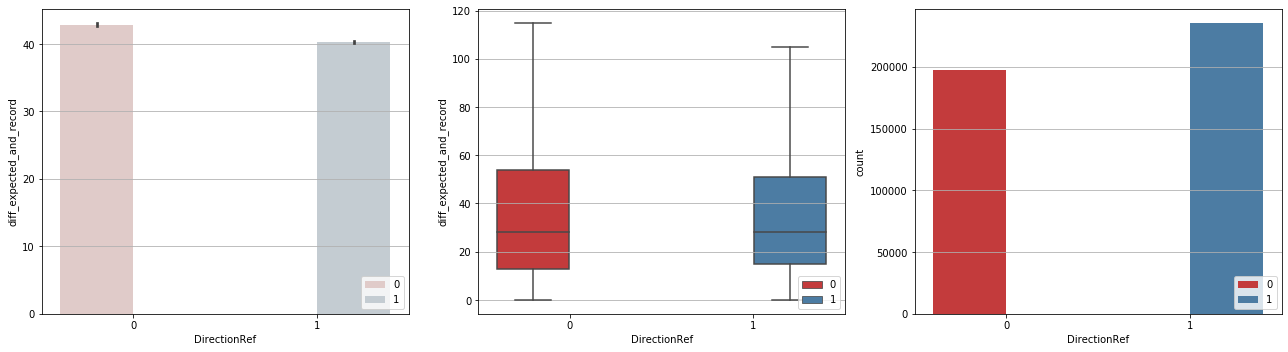

In [50]:
# show expected time to arrive using bar plot and box plot 
fig, axes = plt.subplots(1,3, figsize=(18,5))
ax=axes[0]
sns.barplot(data =df_trim,  x='DirectionRef', y='diff_expected_and_record', 
            ax=ax, 
            hue='DirectionRef', palette=sns.color_palette("Pastel1", desat=0.4))
ax=axes[1]
sns.boxplot(data =df_trim,  x='DirectionRef', y='diff_expected_and_record', 
            ax=ax, 
            showfliers=False,
            hue='DirectionRef', palette=sns.color_palette("Set1", desat=0.9))
ax=axes[2]
sns.countplot(data =df_trim,  x='DirectionRef', 
#               y='diff_expected_and_record', 
            ax=ax,
#             estimator=len,
            hue='DirectionRef', palette=sns.color_palette("Set1", desat=0.9))

for i in range(len(axes)):
#     ax[0].grid(axis='y')
    axes[i].grid(axis='y')
    axes[i].legend(loc='lower right', frameon=True)
#     ax[1].legend(loc='lower right', frameon=True)
plt.tight_layout()
plt.show()

### Relationship with numerical variables

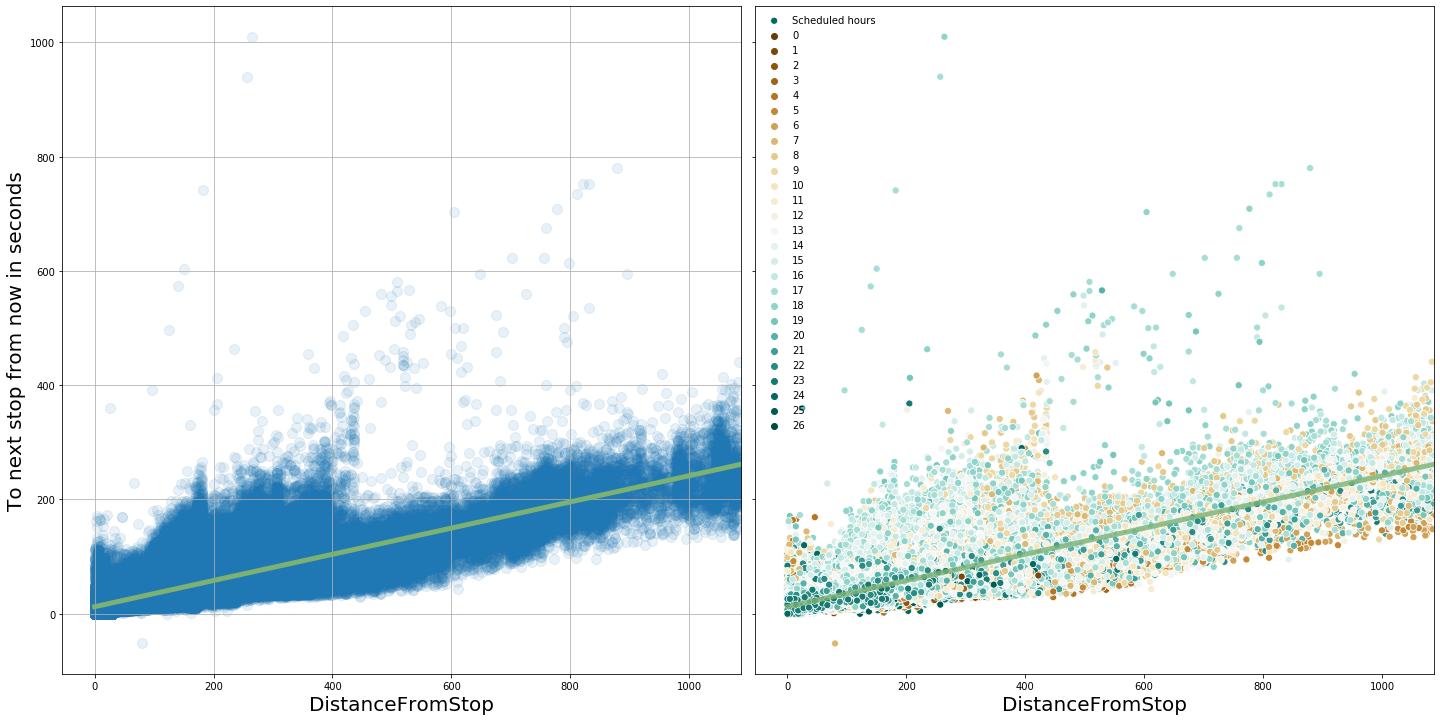

In [51]:
# distance from the stop and expected arrival time
fig, ax = plt.subplots(1,2, figsize=(20,10))
sns.regplot(data =df_trim,  x='DistanceFromStop', y='diff_expected_and_record', 
            ax=ax[0],
            scatter_kws={"alpha": 0.1, 's':100}, line_kws={'color': sns.xkcd_rgb['faded green'], 'lw':5})

sns.scatterplot(data =df_trim,  x='DistanceFromStop', y='diff_expected_and_record', label='Scheduled hours',
                s=50,
                ax=ax[1], 
                legend='full', 
#                 alpha = 0.1, 
                hue=df_trim.ScheduledArrivalTime_hour.values, palette=sns.color_palette('BrBG', 27))

sns.regplot(data =df_trim,  x='DistanceFromStop', y='diff_expected_and_record', 
            ax=ax[1],
            line_kws={'color': sns.xkcd_rgb['faded green'], "alpha":0.8,"lw":5},
           scatter=False,
#            fit_reg=False,
           )

ax[1].legend(loc='upper left', frameon=False)
ax[1].set_ylabel('')            
# ax[1].spines['left'].set_color('none')
ax[1].tick_params(
axis='y',          # changes apply to the x-axis
which='both',      # both major and minor ticks are affected
bottom=False,      # ticks along the bottom edge are off
top=False,         # ticks along the top edge are off
labelleft=False) # labels along the bottom
# plt.grid()
# plt.grid()
plt.tight_layout()
ax[0].set_xlabel(ax[0].get_xlabel(), fontsize=20)
ax[0].grid()
ax[1].set_xlabel(ax[1].get_xlabel(), fontsize=20)
ax[0].set_ylabel('To next stop from now in seconds', fontsize=20)

plt.show()

- From this one, we can clearly see that the expected time to arrive at next stop from now is highly correlated to the distance from next stop. 
- We can use a line to represent such correlationship, and the slope of this line can indicate the speed of the bus. Which is about 6 meters/second or 13 miles/hour or 21.6 km/hour. Considering the bus has to stop during operation, this speed is not too slow. 
- Also we can read the plot as when the dots are above the regression line, it means the operation speed is slower than average, while the dots underneath the regression line indicate that thery operated faster than average. When we color code the scatter by scheduled time hours, we can easily find out buses operate from 6:00 to 18:00 are mainly above the regression line, and the bus at midnight are underneath the regression line. Which is consistent to the actual situation. 
- We also spot some outliers in the plot, with some buses around 18:00 running much slower than average. Also there is an outlier that the expected time is earlier than the record time. Unlike 'ScheduledArrivalTime', 'ExpectedArrivalTime' should be something that update frequentely. The below zero outlier should be considered as an error and probabely due to the delay of system expectedArrival time calculation. (we can talk a little bit about how the bus is calculate the expected arrival time)

In [52]:
# check weird data
# df_trim[df_trim.diff_expected_and_record<0]

 # Insights 
> ### bus delays <a id='bus_delay'></a> 
###  <div style="text-align: right"> [back to main](#main) </div>

### This is a different time difference
Earlier we looked at the difference between "ExpectedArrivalTime" and "RecordedAtTime", while this time we are considering the difference between "ExpectedArrivalTime" and "ScheduledArrivalTime", which can be interpreted as bus delay. (when the difference is negative, we can say negative delay, or get earlier).

Also this time we are analysis across periodic time data extracted from the original time stamp, i.e. hours, date, day of week. So, let's display the trend of time difference across the timestamp features the same one we analyse not long ago.
Here I also create some new features that might have the potential to reveal the pattern of time difference, i.e. bus schedule day of the week, quater-period of the day, etc.

In [53]:
# a plot about analysis, I suggest avoid this
# features_in_interest = ['schedule_hour_of_day', 'schedule_day_of_week','schedule_day_of_month',]
# fig, ax = plt.subplots(len(features_in_interest),1,figsize=(20,12))
# for i, col in enumerate(features_in_interest):
# #     order = df_trim.groupby([col]).mean()["difference_in_secondes"].reset_index().sort_values("difference_in_secondes")
# #     order = []
#     sns.barplot(data=df_trim, y='diff_expected_and_scheduled', x=col, ax=ax[i], 
# #                 palette='Blues', 
#                 color = sns.color_palette('muted')[i],
# #                order = order,
#                )
#     ax[i].xaxis.set_tick_params(labelsize=15)
#     ax[i].yaxis.set_tick_params(labelsize=15)
#     ax[i].set_xlabel(ax[i].get_xlabel(), fontsize=20)
#     ax[i].set_ylabel('diff in sec', fontsize=20)
#     ax[i].grid(axis='y')
        

# # plt.suptitle('Difference between expected arrival time and scheduled time in seconds', fontsize=30, loc='left')
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
# fig.suptitle(t='Difference between expected arrival time and scheduled time in seconds', fontsize=30, 
#              ha='left', x=fig.subplotpars.left)   
# plt.show()


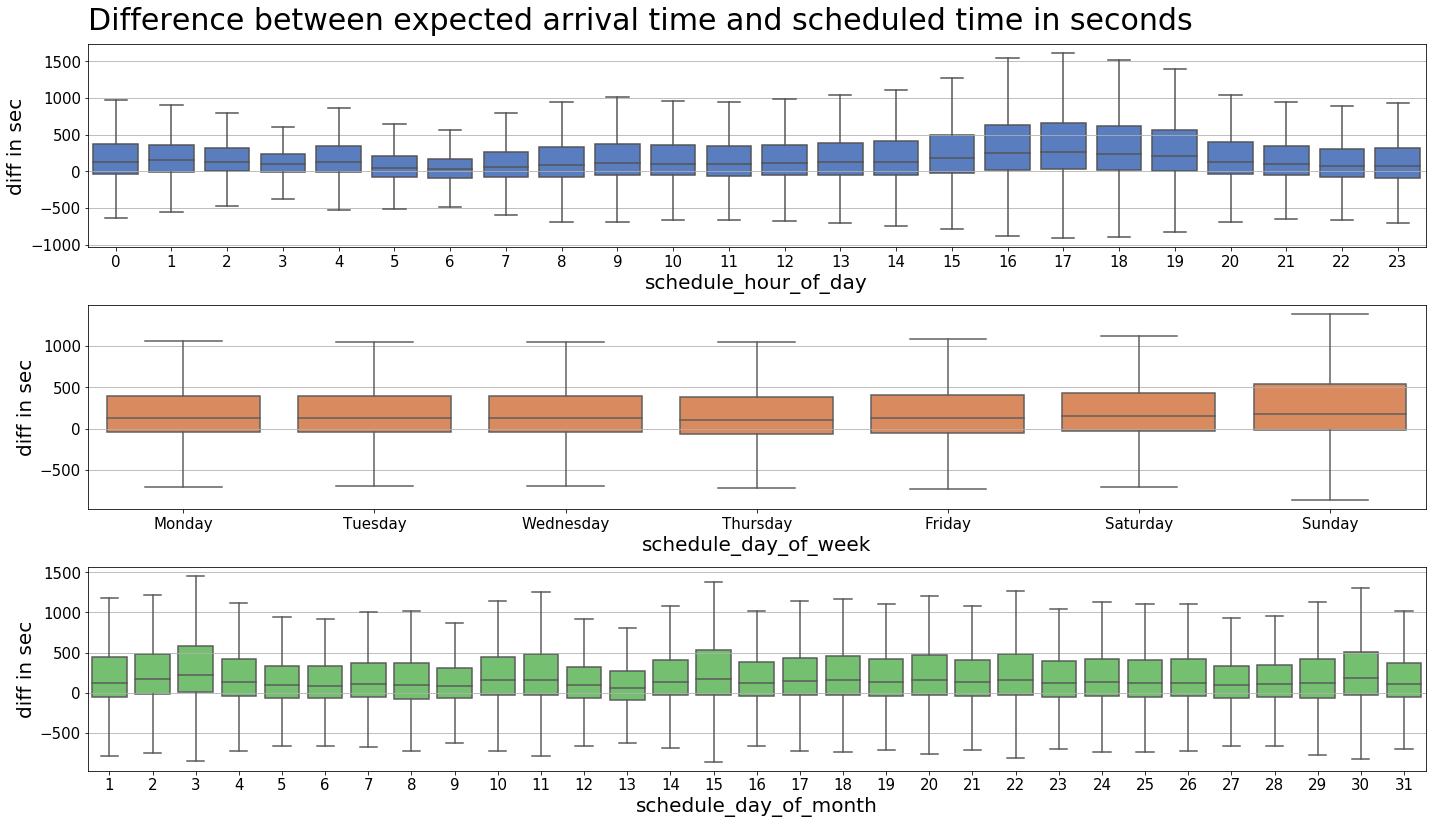

In [54]:
# boxplot
features_in_interest = ['schedule_hour_of_day', 'schedule_day_of_week','schedule_day_of_month',]
fig, ax = plt.subplots(len(features_in_interest),1,figsize=(20,12))
for i, col in enumerate(features_in_interest):
#     order = df_trim.groupby([col]).mean()["difference_in_secondes"].reset_index().sort_values("difference_in_secondes")
#     order = []
    sns.boxplot(data=df_trim, y='diff_expected_and_scheduled', x=col, ax=ax[i], 
                showfliers=False,
#                 palette='Blues', 
                color = sns.color_palette('muted')[i],
#                order = order,
               )
    ax[i].xaxis.set_tick_params(labelsize=15)
    ax[i].yaxis.set_tick_params(labelsize=15)
    ax[i].set_xlabel(ax[i].get_xlabel(), fontsize=20)
    ax[i].set_ylabel('diff in sec', fontsize=20)
    ax[i].grid(axis='y')
        

# plt.suptitle('Difference between expected arrival time and scheduled time in seconds', fontsize=30, loc='left')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
fig.suptitle(t='Difference between expected arrival time and scheduled time in seconds', fontsize=30, 
             ha='left', x=fig.subplotpars.left)   
plt.show()


In [55]:
# use this check the count
# sns.barplot(x=df_trim.schedule_hour_of_day.value_counts().index, y=df_trim.schedule_hour_of_day.value_counts())

### Sumary of EDA

We have spent a lot of time on EDA, which I called "a story about B6". We acted like a detector and used domain knowledge to explore information underlying. We explore the mechanism how the data is generated, evaluate how precise and truethful the data is, and how to interprete the features besides thier names. i.e. We assume that "expectedarrivaltime" is the "actualarrivaltime" and justify such assumption. Also we parse the schedulearrivaltime to standard form and combine with the date information, in a way that we can calculate the differece between schedule arrival time and actual/expected arrival time, and furth create a target called "is_off_time" to reflect the time differece information.

You might have realized data analysis takes half length of this notebook. But I feel it is necessary, because we are performing an unsupervised learning task, without understanding the data, it is almost impossible to evaluate the result nor to interprete that because we don't have labels to guide us.

Before we moving to the next session, I just cannot emphasize enough the importance of feature engineering and the benefit from it for feature extraction and data analysis. But I also want point out that such analysis should not be exhaustive, i.e. there would be easily over hundreds of plots if we try to cross-analyze every features. Rather, it is more important to assure ourselves that the measurement is precise and truethful, the observation consistent with reality. And try to confirm and interprete the meaning of variable names. 



In [56]:
# Just one more example to show how to practice the afforementioned principle. 
# For the last two plots, if we focus on the bus delay by hours. We can see that from the barplot, (which indicate the average difference,) hour 16,17,18 are significant delay than the others. But I would not take it too seriously and give advice based on that. i.e. give a data with difference around 420 secs, I would preict that it is probabely from hour 16, 17, 18. No. I would not do that. Rather, I would go to the boxplot, and say, okay, the  i.e. hour 16,17,18 has higher variance, probability because they busy hours, which means there are probablity more counts in the record.

# Design the Task <a id='design_task'></a> 
> ## An unconventional unsupervised learning task demo
###  <div style="text-align: right"> [back to main](#main) </div>

Finally, let's do some machine learning stuff.

As mentioned before, a big issue for unsupervised learning is many times it is hard to evaluate the result. The goal of unsupervised the learning is to find some underlying pattern, but who will be the judge it is a useful pattern. Think about the MNIST digit dataset if we don't know what the acutal number is, we might not condident enough to barely rely on metrics to evaluate the result. 

Let's create a off-time lable to make this problem into a classification problem so that we have some guidance to evaluate the result. The label is irrelevant to the unsupervised learning method, but rather something to provide metrics so that we can evaluate the unsupervised learning result. To be more specific, I will show you how to use PCA as a feature engeering tools and demonstrate its benifits by comparing the performance with PCA transformed data and without.

First of all let's assign some labels and design a supervised learning task.

### Assign target labels

We can assign an label called "is_off_time", when the absolute difference between "ExpectedArrivalTime" and "ScheduledArrivalTime" is larger than 3 minutes, then its label=1 (off-time), otherwise label=0 (not off-time)


In [57]:
# customer function create target
# to-do-list, there is some repeating copy-and-paste data here, need to optimize that.
def create_df_with_target():
    df_trim = feature_engeering_dataset()
    
    df_trim['is_off_time'] = df_trim['diff_expected_and_scheduled'].apply(lambda x: 1 if np.abs(x)>3*60 else 0).astype('int32')
    df_trim['is_off_time_categ'] =  df_trim['is_off_time'].apply(lambda x: 'yes' if x==1 else 'no')
    
    return df_trim

df_trim = create_df_with_target()

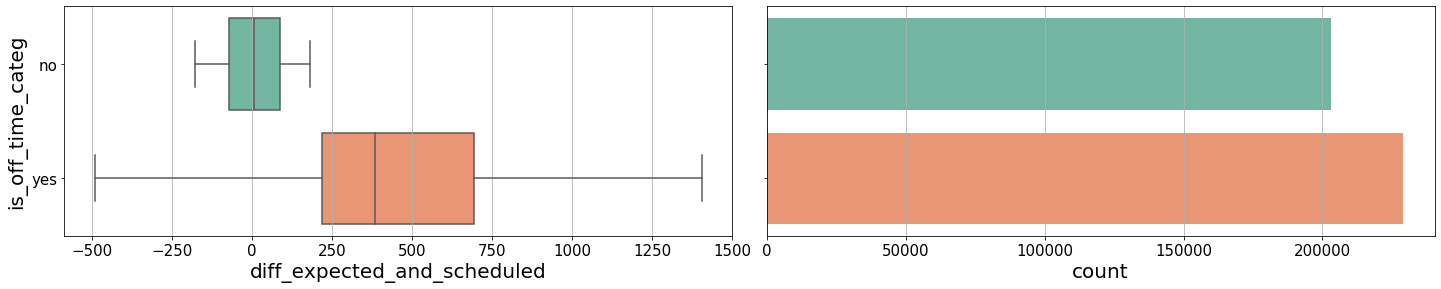

In [58]:
# EDA one more time
fig, ax = plt.subplots(1,2,figsize=(20,4))
# order_tmp = df_trim.groupby('ArrivalProximityText')['DistanceFromStop'].mean().reset_index().sort_values('DistanceFromStop').ArrivalProximityText.unique()
sns.boxplot(x=df_trim.diff_expected_and_scheduled, y=df_trim.is_off_time_categ, showfliers=False,
#             order=order_tmp, 
            ax=ax[0], palette="Set2")
sns.countplot(y=df_trim.is_off_time_categ, 
#               order=order_tmp, 
              ax=ax[1], palette="Set2")
ax[0].tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected  
    labelsize=15) # labels along the bottom edge are off
ax[1].set_ylabel('')            
ax[1].tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected  
    labelleft=False,
    labelsize=15) 
plt.tight_layout()
ax[0].set_xlabel(ax[0].get_xlabel(), fontsize=20)
ax[0].set_ylabel(ax[0].get_ylabel(), fontsize=20)
ax[1].set_xlabel(ax[1].get_xlabel(), fontsize=20)
ax[0].grid(axis='x')
ax[1].grid(axis='x')

plt.show()

In [59]:
# detail alert
# conventionally, the independent variables are put on x-axis while the dependent variables are put on y-axis. 
# Since "is_off_time_categ" is the target which is normally consider to be the dependent variable, so "is_off_time_categ" 
# is set on y-axis. which maybe makes it weired to watch, and become inconsistent with the orientation in the former sessioin
# when we talk about the relationship between expected time to arrive and the  DirectionRef.

In [60]:
# proportion of label classes
print('is_off_time==0: {}'.format(df_trim[df_trim.is_off_time==0].is_off_time.count()/len(df_trim)))
print('is_off_time==1: {}'.format(df_trim[df_trim.is_off_time==1].is_off_time.count()/len(df_trim)))

is_off_time==0: 0.47027177119850055
is_off_time==1: 0.5297282288014994


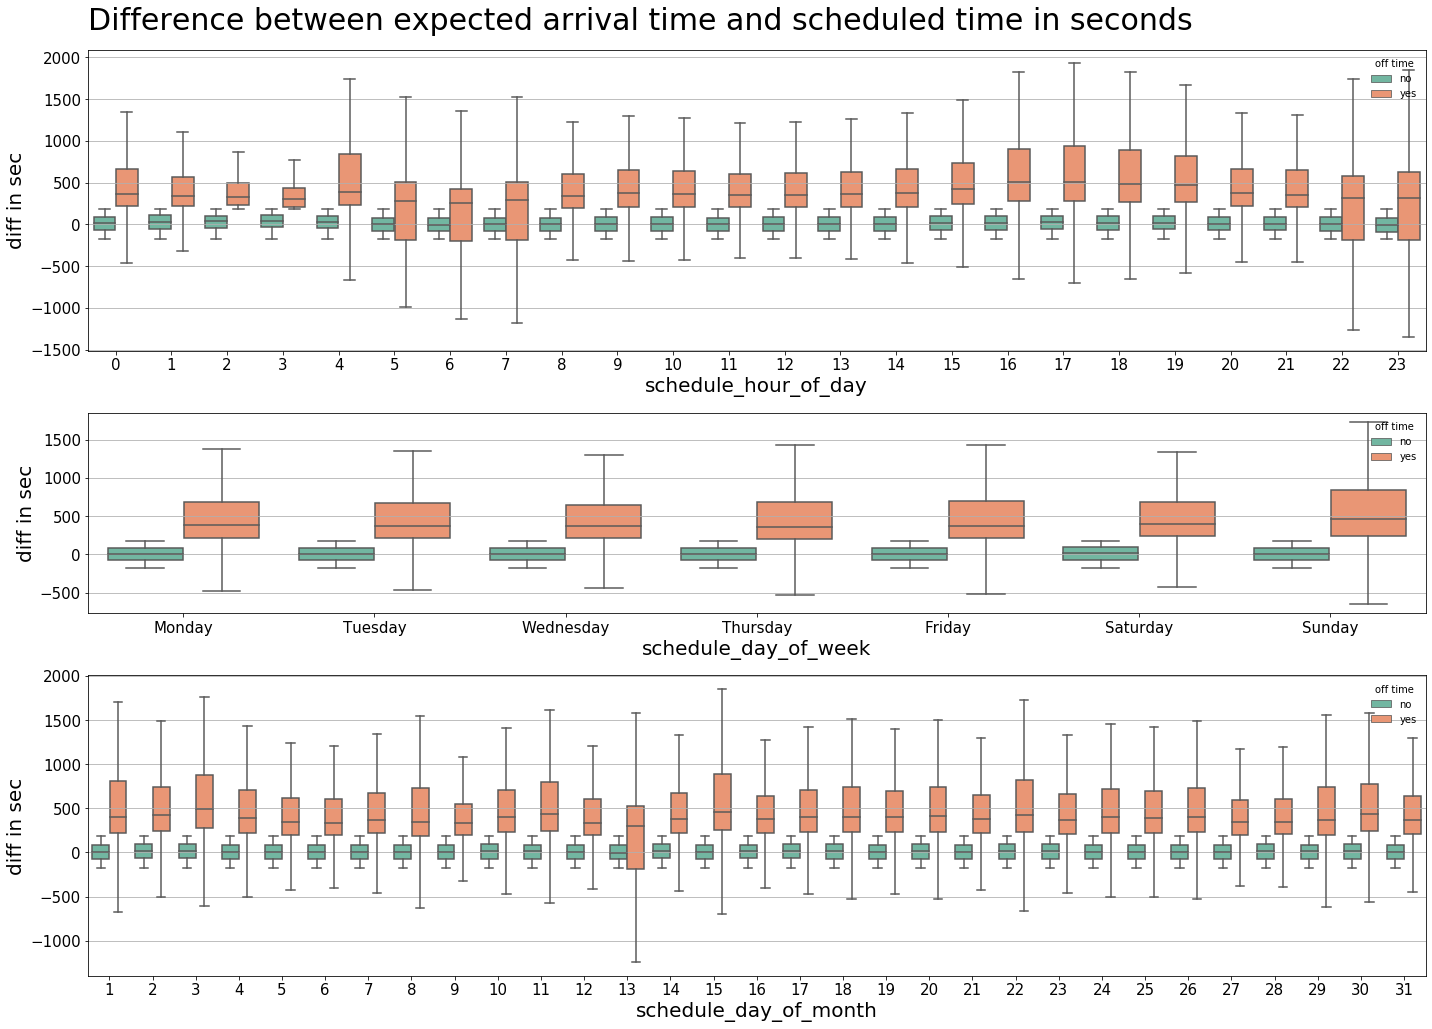

In [61]:
# EDA cont'
features_in_interest = ['schedule_hour_of_day', 'schedule_day_of_week','schedule_day_of_month',]
fig, ax = plt.subplots(len(features_in_interest),1,figsize=(20,15), gridspec_kw={'height_ratios': [3,2,3]})
for i, col in enumerate(features_in_interest):    
    sns.boxplot(data=df_trim, y='diff_expected_and_scheduled', x=col, hue='is_off_time_categ', 
                palette="Set2",
                showfliers=False, ax=ax[i] )
    ax[i].legend(title='off time', loc='upper right', frameon=False) 
    plt.tight_layout()
    
    ax[i].xaxis.set_tick_params(labelsize=15)
    ax[i].yaxis.set_tick_params(labelsize=15)
    ax[i].set_xlabel(ax[i].get_xlabel(), fontsize=20)
    ax[i].set_ylabel('diff in sec', fontsize=20)
    ax[i].grid(axis='y')
        

# plt.suptitle('Difference between expected arrival time and scheduled time in seconds', fontsize=30, loc='left')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
fig.suptitle(t='Difference between expected arrival time and scheduled time in seconds', fontsize=30, 
             ha='left', x=fig.subplotpars.left)   
plt.show()


In [62]:
# create df_work_on
# N_sample_size = 50000
features_filter = ['OriginLat', 'OriginLong', 'DestinationLat', 'DestinationLong', 'next_stop_Lat', 'next_stop_Long',
                   'VehicleLocation.Latitude', 'VehicleLocation.Longitude', 
                   'RecordTime_month', 'RecordTime_day', 'RecordTime_weekday', 'RecordTime_hour', 'RecordTime_min', 'RecordTime_sec',
                   'DirectionRef', 
                   'OriginName', 'DestinationName', 'NextStopPointName', 'VehicleRef', 
                   'RecordedAtTime',
                   'ScheduledArrivalTime_standand',
                   'diff_expected_and_scheduled', 'is_off_time',
                  'ArrivalProximityText']
# df_work_on = df_trim[features_filter].copy()
# just pick the one that is not "at stop" or "approaching" or ''< 1 stop away', '
# df_work_on = df_trim[df_trim.ArrivalProximityText.isin(['0.5 miles away',
#        '0.7 miles away', '0.6 miles away'])][features_filter][df_trim.is_off_time.isin([0,1])].sample(n=N_sample_size, random_state=RANDOM_STATE).copy()
df_work_on = df_trim.loc[df_trim.ArrivalProximityText.isin(['< 1 stop away', '0.5 miles away',
       '0.7 miles away', '0.6 miles away']),features_filter].copy()

# df_work_on.info()

In [63]:
# feature engineering
df_work_on['schedule_year'] = pd.to_datetime(df_work_on.ScheduledArrivalTime_standand).dt.year
df_work_on['schedule_month'] = pd.to_datetime(df_work_on.ScheduledArrivalTime_standand).dt.month
df_work_on['schedule_day'] = pd.to_datetime(df_work_on.ScheduledArrivalTime_standand).dt.day
df_work_on['schedule_weekday'] = pd.to_datetime(df_work_on.ScheduledArrivalTime_standand).dt.day_name()

df_work_on['schedule_hour'] = pd.to_datetime(df_work_on.ScheduledArrivalTime_standand).dt.hour
df_work_on['schedule_minute'] = pd.to_datetime(df_work_on.ScheduledArrivalTime_standand).dt.minute
df_work_on['schedule_second'] = pd.to_datetime(df_work_on.ScheduledArrivalTime_standand).dt.second

df_work_on['schedule_hour_num'] = pd.to_datetime(df_work_on.ScheduledArrivalTime_standand).dt.hour
df_work_on['schedule_hour_num_overlap'] = df_work_on['schedule_hour_num'].apply(lambda x: x+24 if x<=2 else x)
df_work_on['schedule_day_num'] = df_work_on['schedule_day']
df_work_on['schedule_weekday_num'] = pd.to_datetime(df_work_on.ScheduledArrivalTime_standand).dt.weekday
df_work_on['schedule_weekday_num'] = df_work_on['schedule_weekday_num'].apply(lambda x: x+1)
df_work_on['schedule_minute_num'] = df_work_on['schedule_minute']


# df_work_on.head(5)

In [64]:
# df_work_on.info()

In [65]:
# df_work_on.columns

In [66]:
# df_X and df_y
encode_keep = ['OriginLat', 'OriginLong', 'DestinationLat', 'DestinationLong', 'next_stop_Lat', 'next_stop_Long',
#                    'VehicleLocation.Latitude', 'VehicleLocation.Longitude', 
                   'RecordTime_month', 'RecordTime_day', 'RecordTime_weekday', 'RecordTime_hour', 'RecordTime_min', 'RecordTime_sec',
               'schedule_month', 'schedule_day', 'schedule_hour_num', 'schedule_hour_num_overlap',
              'schedule_day_num', 'schedule_weekday_num', 'schedule_minute_num',
              ]
df_X = df_work_on[encode_keep].copy()

df_y = df_work_on[['is_off_time']].copy()


In [67]:
# df_X.head(5)

In [68]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122843 entries, 91 to 26520637
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   OriginLat                  122843 non-null  float64
 1   OriginLong                 122843 non-null  float64
 2   DestinationLat             122843 non-null  float64
 3   DestinationLong            122843 non-null  float64
 4   next_stop_Lat              122843 non-null  float64
 5   next_stop_Long             122843 non-null  float64
 6   RecordTime_month           122843 non-null  int32  
 7   RecordTime_day             122843 non-null  int32  
 8   RecordTime_weekday         122843 non-null  int32  
 9   RecordTime_hour            122843 non-null  int64  
 10  RecordTime_min             122843 non-null  int64  
 11  RecordTime_sec             122843 non-null  int64  
 12  schedule_month             122843 non-null  int64  
 13  schedule_day              

In [69]:
df_X.head()

OriginLat  OriginLong  DestinationLat  DestinationLong  next_stop_Lat  next_stop_Long  RecordTime_month  RecordTime_day  RecordTime_weekday  RecordTime_hour  RecordTime_min  RecordTime_sec  schedule_month  schedule_day  schedule_hour_num  schedule_hour_num_overlap  schedule_day_num  schedule_weekday_num  schedule_minute_num
91   40.666382  -73.883614       40.592949       -73.993385      40.665816      -73.883258                 6               1                   3                0               3              42               6             1                  0                         24                 1                     4                    4
297  40.666382  -73.883614       40.592949       -73.993385      40.633998      -73.947753                 6               1                   3                0               3              30               5            31                 23                         23                31                     3                   43
518  40.593510  -73.993996       40.666420       -73.883385      40.666352      -73.883369                 6               1                   3                0               3              29               6             1                  0                         24                 1                     4                    5
742  40.593510  -73.993996       40.666420       -73.883385      40.666352      -73.883369                 6               1                   3                0              13              50               6             1                  0                         24                 1                     4                   16
934  40.593510  -73.993996       40.666420       -73.883385      40.641122      -73.904594                 6               1                   3                0              13              34               6             1                  0                         24                 1                     4                   14

### This is not a trivial problem

Given the features above, do you think you have a good strategy to solve that? i.e. label the data as is_off_time=0 or 1. Note that the ExpectedArrivalTime data should not be included in the estimator, otherwise it would be cheating, a so-called lookahead leakage. So you cannot subtract scheduleTime from ExpectedArrivalTime to get the difference. Besides, suppose you don't know how many minutes would be consider off-time.

Also, the data is from bus that are not "at stop" or "approching" the store. Actually you don't even know how far you are away from the stop, all you have is the current GPS coordinates and "ArrivalProximityText" to indicates bus is "1 stop away", "<1 stop away", etc.

Don't worry, I am not serioiusly asking you to solve the problem but just to claim that this problem is non-trivial, even though you might have some clue about the underlying mechanism.

For the following part, we will sort to machine learning models to build a estimator that predict the "is_off_time" label. Especially, I will demonstrate how to utilize the result from unsupervised learning and integrate the results into a supervised learning task.

(I will still work on a trimmed version dataset, just to show the workflow to build the pipeline, which can be later applied to the original dataset)

# Train-test split

I choose the train:test=2:1 split. 

I was asked why I choose this value because the person is concerned this value is a bit higher.

The reasoning of this split ratio value is 
- this is Sklearn's choice in thier website demo. 
- Also I would be concerned if the test size is too small since it might cause unrevealed overfitting. 

A side-note: it became a semi-supervised learning problem if we have small amount of labeled target.

# Machine Learning <a id='machine_learning'></a> 
## Data preparation
> ### Train-test split
> ### PCA



###  <div style="text-align: right"> [back to main](#main) </div>

In [114]:
# train test split
from sklearn.model_selection import train_test_split
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df_X, df_y, test_size=0.33, random_state=RANDOM_STATE)
# df_X_train

# PCA

In [71]:
# preprocessing scaling
from sklearn.preprocessing import StandardScaler
ss_transformer = StandardScaler()
# ss_transformer.fit(df_X)
ss_transformer.fit(df_X_train)
# df_X_0 = ss_transformer.transform(df_X)
df_X_train_0 = ss_transformer.transform(df_X_train)
df_X_test_0 = ss_transformer.transform(df_X_test)

In [113]:
# pca to handle correlation and sparsity
from sklearn.decomposition import PCA
pca = PCA()
# pca.fit(df_X_0)
pca.fit(df_X_train_0)
df_X_train_pca = pca.transform(df_X_train_0)
df_X_test_pca = pca.transform(df_X_test_0)

df_X_train_pca = pd.DataFrame(df_X_train_pca)
# df_X_train_pca.columns = df_X_train.columns
df_X_train_pca.index = df_X_train.index

df_X_test_pca = pd.DataFrame(df_X_test_pca)
# df_X_test_pca.columns = df_X_test.columns
df_X_test_pca.index = df_X_test.index


In [73]:
# Note for myself
# you might notice I have the test data totally unrevealed to the tranforming process.
# Actually for trasnformation, testset features can be revealed to the trasnformation. It is not cheating.

In [74]:
pca.explained_variance_ratio_.cumsum()

array([0.20941386, 0.36745551, 0.50962413, 0.61654536, 0.72047286,
       0.82141115, 0.90519341, 0.95779428, 0.97913786, 0.99341059,
       0.99667152, 0.99893656, 0.99958044, 0.99985671, 0.99991   ,
       0.99995923, 0.9999931 , 1.        , 1.        ])

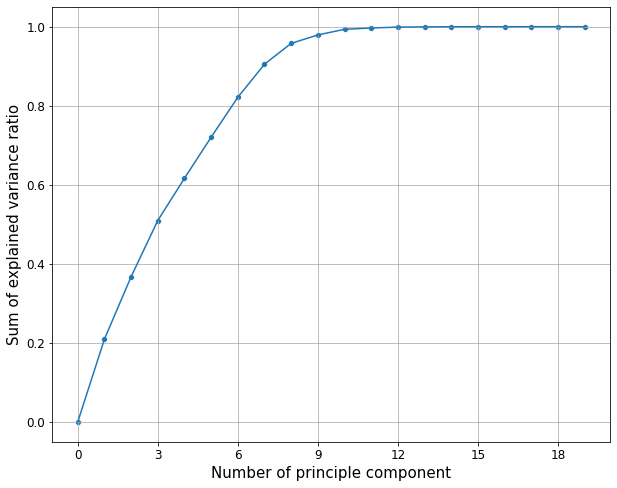

In [75]:
# plot explained_variance cumsum
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(range(len(pca.explained_variance_ratio_)+1), np.append(0,pca.explained_variance_ratio_.cumsum()), ax=ax, )
sns.lineplot(range(len(pca.explained_variance_ratio_)+1), np.append(0,pca.explained_variance_ratio_.cumsum()), ax=ax, )
ax.set_ylim([-0.05,1.05])
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.grid()

# ax.set_xlabel(ax[0].get_xlabel(), fontsize=20)
ax.set_xlabel('Number of principle component', fontsize=15)
ax.set_ylabel('Sum of explained variance ratio', fontsize=15)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)



The first 10 principle components already explained 99% of the variance, so it is reasonable to just take the first 10 priciple componenets.

In [76]:
# choose the top PCA components with threshold = 0.99, here I kept them all without touch
is_cut = False
if is_cut:
    pca_cut_threshold = 0.99
    pca_cut = np.where(pca.explained_variance_ratio_.cumsum() >pca_cut_threshold)
    pca_cut[0][0]

    pca = PCA(n_components=pca_cut[0][0]+1)

else:pca = PCA()

    # pca.fit(df_X_0)
pca.fit(df_X_train_0)
df_X_train_pca = pca.transform(df_X_train_0)
df_X_test_pca = pca.transform(df_X_test_0)

df_X_train_pca = pd.DataFrame(df_X_train_pca)
# df_X_train_pca.columns = df_X_train.columns
df_X_train_pca.index = df_X_train.index

df_X_test_pca = pd.DataFrame(df_X_test_pca)
# df_X_test_pca.columns = df_X_test.columns
df_X_test_pca.index = df_X_test.index


First let's try our luck to see if the data after PCA show any pattern that might help. i.e. the different target would form some cluster. 


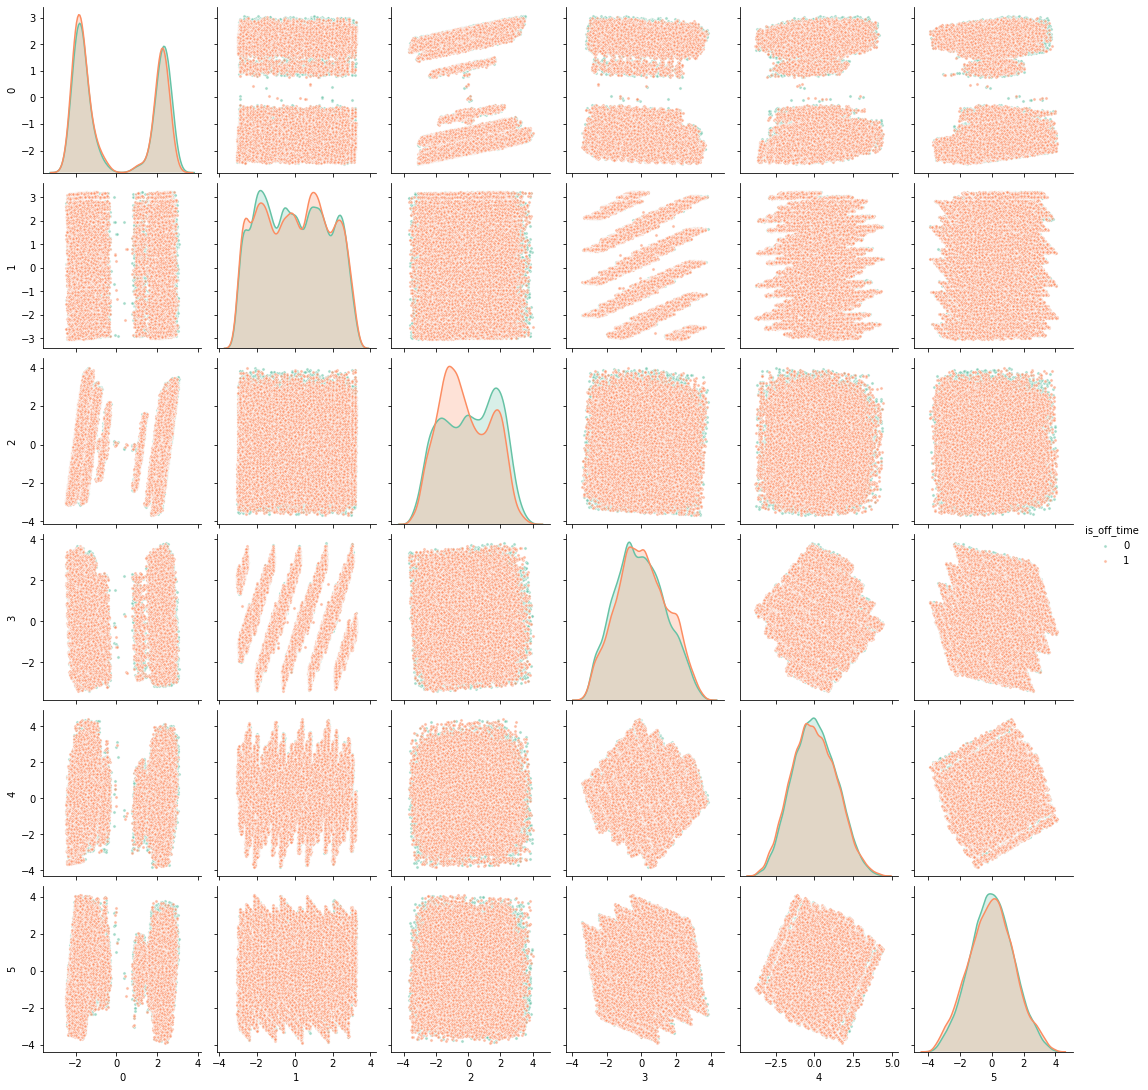

In [77]:
# pair plot, top 6 component from PCA
df_tmp = pd.concat([df_X_train_pca, df_y_train],axis=1)
# df_tmp.columns =['p0', 'p1', 'p2', 'is_off_time']
sns.pairplot(data=df_tmp, vars=df_tmp.columns[:6], hue='is_off_time', palette="Set2", 
             plot_kws={'alpha':0.6, 's':10})

At first sight, the transformed data has a kind of weird distribution, this is mainly becasue many features like hours, day of weeks is encoded from categorical data.

Also it doesn't seem like PCA is very helpful either. i.e. both is_off_time==0 and is_off_time==1 have very similiar distribution. In other word, the data is not linearly seperatable. (What you see in the scatterplot that is all orange is because of data from the two classes are overlapping with each other and the orange scatters plot after the green ones). 


# Model training <a id='model_training'></a> 
> ### Choice of models
> ### Training demo



###  <div style="text-align: right"> [back to main](#main) </div>

# Choice of models

Let's try if machine learning algorithm can learn from the data. Here I choose 
- Logistic regression
- Random forest
- XGBoost
- LightGBM

Logistic regression is chosen as a base-line model. Random forest is chosen because it can mimic the many people voting situation. XGBoost and LightGBM are the stars in the supervised learning family and potentially perform well in many situations.

For this project I am not trying to demonstrate how to fine tune the machine learning models, so all the models will use their default hyper-parameter settings. Just you should know there is definetely better cross-validation schemes to help improve performance and justify evaluation.


# Training Demo

In [78]:
from sklearn.metrics import f1_score

In [79]:
# copy training data here
# X_train_1 = df_X_train_pca.copy()
# X_test_1 = df_X_test_pca.copy()
# y_train_1 = df_y_train.copy()
# y_test_1 = df_y_test.copy()

X_train_1 = df_X_train_pca
X_test_1 = df_X_test_pca
y_train_1 = df_y_train
y_test_1 = df_y_test

### try logistic regression

In [80]:
# train with the default model
from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression(   
    max_iter=1e4,     
    random_state= RANDOM_STATE) 
lr1.fit(X=X_train_1, y=y_train_1.is_off_time.values)
lr1.get_params

print("f1-score on training set: {}".format(f1_score(y_true=y_train_1, y_pred=lr1.predict(X_train_1))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_1, y_pred=lr1.predict(X_test_1))))


f1-score on training set: 0.6328348992104451
f1-score on test set: 0.6313850577294577


# Evaluation <a id='evaluation'></a> 




###  <div style="text-align: right"> [back to main](#main) </div>

In [81]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score

In [82]:
# Customer function # evaluation and visulization function
def model_evaluation(y_test, y_pred, y_pred_prob=None, is_print_classification_report=True):
    
# input:
# y_pred: dataframe, in [0,1]
# y_pred_prob: dataframe, between (0,1)
# y_test: dataframe, in [0,1]
# example: model_evaluation(y_test_1, df_dumb_model.churn_yes, df_dumb_model.churn_prob ):


    y_pred_tmp = y_pred
    y_pred_prob = y_pred_prob
    y_test_tmp = y_test
    is_print_classification_report = is_print_classification_report
    
        
# classification report
    if is_print_classification_report:
        print('classification_report')
        print(classification_report(y_test_tmp,y_pred_tmp, zero_division=0))

# plot ROC curve and precision-recall curve in one plot
    fig, ax = plt.subplots(1,2, figsize=(10,5))
    # ROC plot
    
    fpr, tpr, threshold = roc_curve(y_test_tmp, y_pred_prob)
    threshold[0]=1
    roc_auc = auc(fpr, tpr)

    ax[0].scatter(fpr, tpr, c='r', s=2, )
    ax[0].fill_between(fpr, tpr, step='post', alpha=0.1, color='r')

#         plt.scatter(fpr, tpr, c=threshold, cmap='tab10', s=1, label = 'ROC_AUC = %0.2f' % roc_auc)
    ax[0].plot([0, 1], [1, 1],'k--')   
    ax[0].plot([0, 1], [0, 1],'k--')
#     ax[0].legend(loc = 'lower right',)
    ax[0].set_xlim([0.0, 1.0])
    ax[0].set_ylim([0.0, 1.05])
    ax[0].set_title('Receiver operating characteristic: ROC_AUC = %0.2f' % roc_auc)
    ax[0].set_ylabel('TPR')
    ax[0].set_xlabel('FPR')

    # precision-recall curve   


    precision, recall, thresholds2 = precision_recall_curve(y_test_tmp, y_pred_prob)
    thresholds2 = np.append(thresholds2,1)
    pr_auc = auc(recall,precision)
    average_precision = average_precision_score(y_test_tmp,y_pred_prob)
#     average_precision = average_precision_score(y_test_tmp, y_pred_prob)

# plt.scatter(precision, recall, 'g', label = 'AP = %0.2f' % average_precision)
    ax[1].scatter(recall, precision, c='k', s=1, )
    ax[1].fill_between(recall, precision, step='post', alpha=0.1, color='k')

#         plt.scatter(precision, recall, c=thresholds2, cmap='tab10', s=1, label = 'PR_AUC = %0.2f' % pr_auc)
 
    ax[1].set_title('Precision-Recall curve: average precision = %0.2f' % average_precision)
#     ax[1].legend(loc = 'upper right',)
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_ylim([0.0, 1.05])
    ax[1].set_ylabel('Precision')
    ax[1].set_xlabel('Recall')
    ax[1].grid()
    #     plt.colorbar()
    plt.tight_layout()
    plt.show()   

In [83]:
# customer func for evaluation and visualization
def plot_prediction_probability(y_test, y_pred, y_pred_prob=None):
    
    y_pred_tmp = y_pred
    y_pred_prob = y_pred_prob
    y_test_tmp = y_test   
    
    
    #     fig, ax = plt.subplots(1,2, figsize=(12,6))
    # Plot of Prediction Probabilities and the True Label
    df_scatterData = pd.DataFrame({'trueLabel':np.array(y_test).ravel(), 'proba': y_pred_prob})
    scatterDataMelted = pd.melt(df_scatterData, "trueLabel", \
                                var_name="proba")
    fig, ax = plt.subplots(2,1,figsize=(12,5), gridspec_kw={'height_ratios': [2,2]})
    sns.stripplot(x="value", y="proba", ax=ax[0],
                       hue='trueLabel', jitter=0.4, alpha=0.4,\
                  palette='Set2',
                       data=scatterDataMelted)
    ax[0].set_xlim([0,1])
    
    #     ax[0].set_xlabel(ax.get_xlabel(), fontsize=20)
    ax[0].set_xlabel("")
    ax[0].xaxis.set_tick_params(bottom=False, labelbottom=False,)
    #     ax[0].spines['bottom'].set_color('none')
    #
    ax[0].set_ylabel("")
    ax[0].yaxis.set_tick_params(left=False, labelleft=False,)
    ax[0]. legend(loc='upper right', frameon=True)
    ax[0].grid(axis='x')
    ax[0].set_title('Plot of prediction probabilities with true Labels', loc='left', fontsize=20,)
    
    
    #     sns.kdeplot(y_prob_model, ax=ax[1], shade=True, color='grey',
    #                 alpha=0.3, 
    #                 label='All prediction probability', 
    # #                 kwargs=dict(linewidth=1)
    # #                  plot_kws=dict(lw=1)                            
    #             )

#     sns.kdeplot(data=y_pred_prob[y_test_tmp.is_off_time==0], 
#                 ax=ax[1], shade=True, color=sns.color_palette("Set2")[0],
#     #                 alpha=0.2,
#                label='Prediction with actual label=0')
#     sns.kdeplot(y_pred_prob[y_test_tmp.is_off_time==1], ax=ax[1], shade=True, color=sns.color_palette("Set2")[1],
#     #                 alpha=0.2,
#                label='Prediction with actual label=1',)
    sns.kdeplot(y_pred_prob, ax=ax[1], shade=True, color=sns.color_palette("Paired")[0],
    #                 alpha=0.2,
               label='prediction probability',)
    #     ax[1].add_legend()
   
    ax[1].set_ylabel("")
    ax[1].yaxis.set_tick_params(left=False, labelleft=False,)
    ax[1].set_xlim([0,1])
    ax[1].set_xlabel("")
#     ax[1].xaxis.set_tick_params(bottom=False, labelbottom=False,)
    ax[1].grid(axis='x')
    ax[1].legend(loc='upper right', frameon=True)
    ax[1].set_xlabel('Predicted probability', fontsize=15)

    ax[1].yaxis.set_tick_params(labelsize=12)
        
    plt.show()

In [84]:
# customer functioin plot precision
def plot_probability_calibration(y_test, y_pred, y_pred_prob=None):
    
    y_pred_tmp = y_pred
    y_pred_prob = y_pred_prob
    y_test_tmp = y_test   
    
    fig, ax = plt.subplots(figsize=(12,3))
    
    precision_,_,thres_ =  precision_recall_curve(y_true=y_test_tmp.is_off_time.values, probas_pred=y_pred_prob)
    
    
#     ax=axes[0]
#     sns.lineplot(np.concatenate(([0],thres_,[1]))[::-1], np.concatenate((precision_,[1])), ax=ax,
#                  color=sns.color_palette("Set2")[0], label='precision on label=0',)
    sns.lineplot(thres_[::-1], precision_[1:], ax=ax,
                 color=sns.color_palette("Set2")[0], label='precision on label=0',)
    sns.lineplot(thres_, precision_[1:], ax=ax,
                 color=sns.color_palette("Set2")[1], label='precision on label=1')
    ax.fill_between(thres_[::-1], precision_[1:],
                    where=(thres_[::-1]<=0.5),
                    step='post', alpha=0.1, color=sns.color_palette("Set2")[0])
#     ax.fill_between(np.concatenate(([0],thres_))[::-1], precision_,
#                     where=((np.concatenate(([0],thres_))[::-1]<=0.5)  & ((np.concatenate(([0],thres_))<np.max(y_pred_prob)))),
#                     step='post', alpha=0.1, color=sns.color_palette("Set2")[0])
    ax.fill_between(thres_, precision_[1:], 
                       where=(thres_>=0.5) ,
                       step='post', alpha=0.1, color=sns.color_palette("Set2")[1])

    sns.lineplot([0, 1], [0.95, 0.95], linestyle=':', ax=ax, lw=1, label='0.95', color='grey')
    sns.lineplot([0, 1], [0.975, 0.975], linestyle=':', ax=ax, lw=1, label='0.975', color='grey')
    ax.lines[2].set_linestyle("--")
    ax.lines[3].set_linestyle("--")
    
    ax.yaxis.set_tick_params(right=True, labelright=True,
                            left=False, labelleft=False,)        
    ax.legend(loc='lower right', frameon=True)
    ax.set_xlim([0,1])
    ax.set_ylim([0,1.05])
    ax.grid(axis='x')
    ax.set_xlabel('Predicted probability', fontsize=15)
    ax.yaxis.set_tick_params(labelsize=12)
    plt.show()

In [85]:
# Customer func for precision analysis
def precisionAnalysis(true_label, proba, recall_at):
    df = pd.DataFrame({'trueLabel':np.array(true_label).ravel(), 'proba': proba})
    df.sort_values(by='proba', ascending=False, inplace=True)
    threshold_value = recall_at*df.trueLabel.sum()
    i = 0
    j = 0
    while i < threshold_value+1:
        if df.iloc[j]["trueLabel"]==1:
            i += 1
        j += 1
    precision = i/j
    return precision

# evaluation on logistic regression

classification_report
              precision    recall  f1-score   support

           0       0.60      0.51      0.55     19708
           1       0.59      0.67      0.63     20831

    accuracy                           0.60     40539
   macro avg       0.60      0.59      0.59     40539
weighted avg       0.60      0.60      0.59     40539



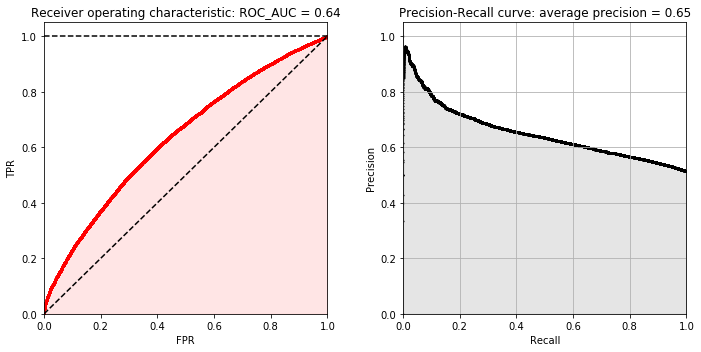

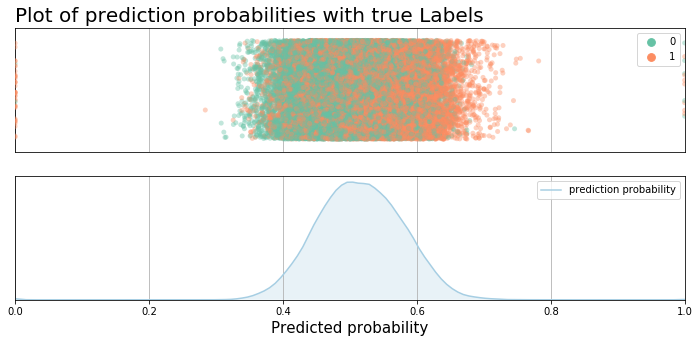

When recall is 75%, Precison is:  0.5775486064907223


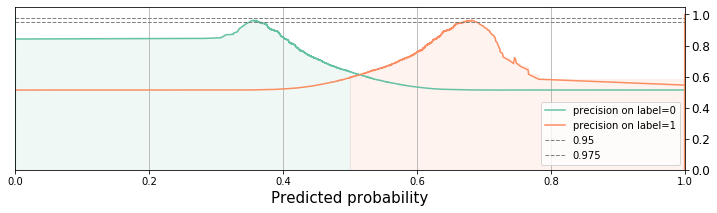

In [86]:
# evaluation metrics and visualization
y_pred_model = lr1.predict(X_test_1)
y_prob_model = lr1.predict_proba(X_test_1)[:,1]
# y_prob_model

model_evaluation(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)
plot_prediction_probability(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)
precision = precisionAnalysis(true_label=y_test_1, proba=y_prob_model, recall_at=0.75)
print("When recall is 75%, Precison is: ", precision)
plot_probability_calibration(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)

### Explain on the result
The evaluation metrics can be read directely from the classificaiton report, including accuracy, precision, recall and f1 score on both 0 and 1 class.
- The ROC curve is displayed. For ROC curve we usually care about the area under curve (AUC). Note that there is an diagonal line. I am afraid I cannot go to the details about ROC. Just remember, we desire an ROC curve above the diagonal line as much as possible which will gives us an maximum AUC ROC value of 1, while the diagonal line is associated with AUC ROC = 0.5.
- Precision-recall curve is also ploted. For this curve, we normally care about average precision and the precision at certain recall level, i.e. at 75% reacall.  

The performance of logistic regression model is not very good in this case. We were already expecting this since the data is not linearly seperatable.
- Among the accuracy is around 0.55, recall=0.60, and precision=0.57. Note that such metrics are calculated assuming the threshold is 0.5. note*
- ROC AUC is a 0.57, which we can see from the plot that ROC curve is just above the diagonal line. 
- The average precision is 0.57, and it is pretty flat across all the recall value, (most of the case, precision would drop when recall increase), with precision=0.56 when recall is 75%.

Next, I would like to introduce to you the predication probability strip plot. I found it very intuitive to show the distribution of predicted probablity with repective to the true label. This plot should be consistent with the conclusion drawn from ROC curve and precision-recall curve, but it also tells a story in more details about the predicted probability distribution, which can be helpful for making decision in proability calibration. i.e. we an pick up predictions that when we are very sure according to its prediction proability. I will explain this concept on the following machine learning models and the idea should be immediately clearer to you.

note*: some metrics might change due to I choose different sample size, but they should not be dramatically different. 

### try random forest

In [115]:
from sklearn.ensemble import RandomForestClassifier

rfc1 = RandomForestClassifier(random_state= RANDOM_STATE)
rfc1.fit(X=X_train_1, y=y_train_1.is_off_time.values)
y_pred_model = rfc1.predict(X_test_1)
y_prob_model = rfc1.predict_proba(X_test_1)[:,1]

print("f1-score on training set: {}".format(f1_score(y_true=y_train_1, y_pred=rfc1.predict(X_train_1))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_1, y_pred=rfc1.predict(X_test_1))))

f1-score on training set: 0.9999646030229018
f1-score on test set: 0.9265798124923902


classification_report
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     19708
           1       0.94      0.91      0.93     20831

    accuracy                           0.93     40539
   macro avg       0.93      0.93      0.93     40539
weighted avg       0.93      0.93      0.93     40539



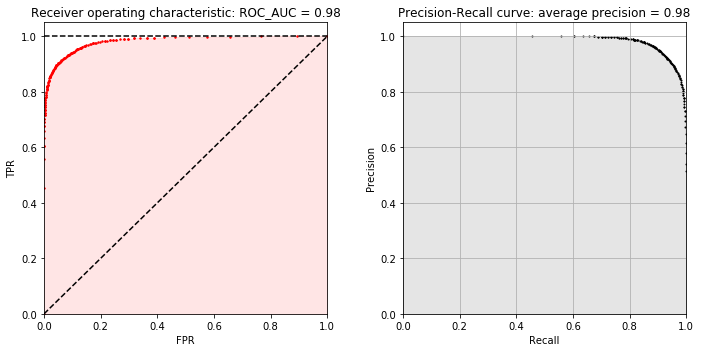

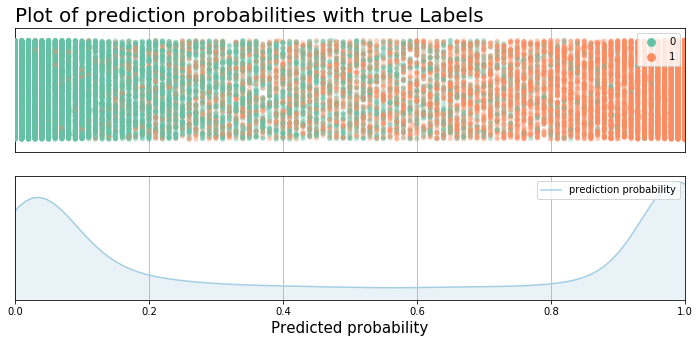

When recall is 75%, Precison is:  0.9961746891934969


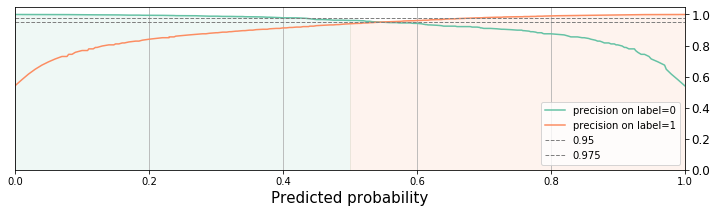

In [88]:
# evaluation metrics and visualization
y_pred_model = rfc1.predict(X_test_1)
y_prob_model = rfc1.predict_proba(X_test_1)[:,1]
# y_prob_model

model_evaluation(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)
plot_prediction_probability(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)
precision = precisionAnalysis(true_label=y_test_1, proba=y_prob_model, recall_at=0.75)
print("When recall is 75%, Precison is: ", precision)
plot_probability_calibration(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)

In [89]:
# calculation cast rate at (0.2 to 0.8)
df_tmp = pd.DataFrame({'prob':y_prob_model})
df_tmp[(df_tmp.prob<=0.8) & (df_tmp.prob>=0.2)].prob.count()/len(df_tmp)

0.18929919336934803

### evaluation on random forest
The performance has improved a lot, 
- accuracy, precision, f1 score are over 0.90, with recall a short of 0.89. Again, all these are associated with proability threshold==0.5.
- the AUC ROC and average precision is close to a full score. with AUC of ROC =0.97, average precision = 0.98.

Let's put our atttention to prediction proability stip plot. This time the predicted probability distribution is seperated on two side. With the actual labels color code with green=0, orange=1, you should realize that when an orage lable comes to the left side it indicates the model made a wrong prediction. (Here assuming the arbitrary threshold is set to 0.5).

Next, a good nature of many machine learning models is when it has a prediction value close to 1 or 0, pretty good chance that this prediction is correct. This phenomenon can be easily spot in the precision-probability plot (the last plot). i.e. when the predicted probability is over 0.8, the precion on label=1 is over 0.975, and when the predicted probability is less than 0.2, the precision on label=0 is also over 0.975. Actually it is very straightforward to see that as the predicted probability increase, the precision on label=1 also increase, on the other hand, when the predicted probability decrease, the precision on label=1 also increase. (Hopefully you see what I am doing now).

What I describe is the idea of probability calibration. Namely, we can cast away those predictions with value around 0.5, which can help to improve precision (at the cost of decrease of recall of course.). 

Note that if we throw away those prediction is within (0.2-0.8), the precision on both label=0 and lable=1 are above 0.975. Then how much element we have lost? We will lost 20% of the prediction. Since the logistic regression is too bad, for now just remember this number and we will compare the rest of the models.

notes* I drop the color to represent a more realistic condition, that is when you look at the predicted probaility distribution, there is no color to tell you the actual label. But this should not 

In [90]:
### challenge for you
# There two curves shown in the plot, what about the curve when under neath another one? Why I can say that the precision is higher than 0.975 when choosing threshold 0.2 and 0.8.

### try XGBoost

In [116]:
from xgboost import XGBClassifier

xgbc = XGBClassifier(random_state=RANDOM_STATE)
xgbc.fit(X=X_train_1, y=y_train_1.is_off_time.values)
xgbc.get_params

print("f1-score on training set: {}".format(f1_score(y_true=y_train_1, y_pred=xgbc.predict(X_train_1))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_1, y_pred=xgbc.predict(X_test_1))))

f1-score on training set: 0.9599579259400923
f1-score on test set: 0.9294292465469781


classification_report
              precision    recall  f1-score   support

           0       0.91      0.94      0.93     19708
           1       0.94      0.92      0.93     20831

    accuracy                           0.93     40539
   macro avg       0.93      0.93      0.93     40539
weighted avg       0.93      0.93      0.93     40539



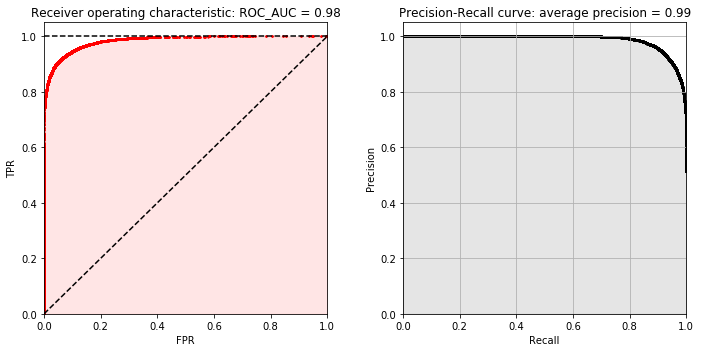

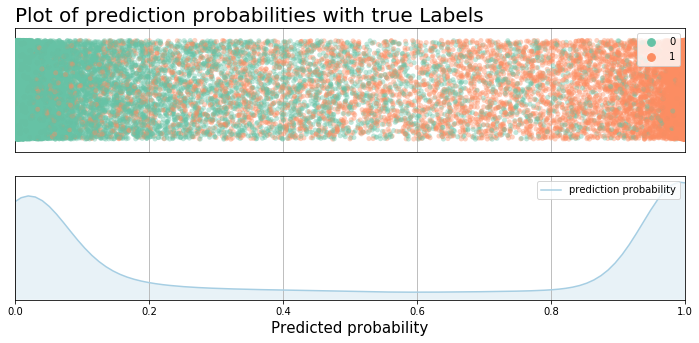

When recall is 75%, Precison is:  0.997701296213524


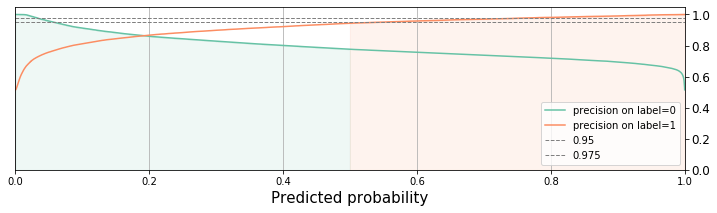

In [92]:
# evaluation metrics and visualization
y_pred_model = xgbc.predict(X_test_1)
y_prob_model = xgbc.predict_proba(X_test_1)[:,1]
# y_prob_model

model_evaluation(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)
plot_prediction_probability(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)
precision = precisionAnalysis(true_label=y_test_1, proba=y_prob_model, recall_at=0.75)
print("When recall is 75%, Precison is: ", precision)
plot_probability_calibration(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)

In [93]:
# calculation cast rate at (0.2 to 0.8)
df_tmp = pd.DataFrame({'prob':y_prob_model})
df_tmp[(df_tmp.prob<=0.8) & (df_tmp.prob>=0.2)].prob.count()/len(df_tmp)

0.1323416956511014

### sumary of XGBoost
I will save some words here but just talk about one thing. Remember the 20% prediction random forest cast away. What about XGBoost? This number is down to 13%. Wow, great improve.

From the classification report you can see that, even the metrics didn't seem better than the one of random forest. But when look into the predicted probability, we would realize the result from XGBoost is actually even better.


Let's move on to take a look at the last candidate. (Let me know if proability calibration doesn't make much sense to you)

### try lightGBM

In [94]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=RANDOM_STATE)
lgbm.fit(X=X_train_1, y=y_train_1.is_off_time.values)
lgbm.get_params

print("f1-score on training set: {}".format(f1_score(y_true=y_train_1, y_pred=lgbm.predict(X_train_1))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_1, y_pred=lgbm.predict(X_test_1))))

f1-score on training set: 0.9382898917743746
f1-score on test set: 0.9270177655722167


classification_report
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     19708
           1       0.94      0.92      0.93     20831

    accuracy                           0.93     40539
   macro avg       0.93      0.93      0.93     40539
weighted avg       0.93      0.93      0.93     40539



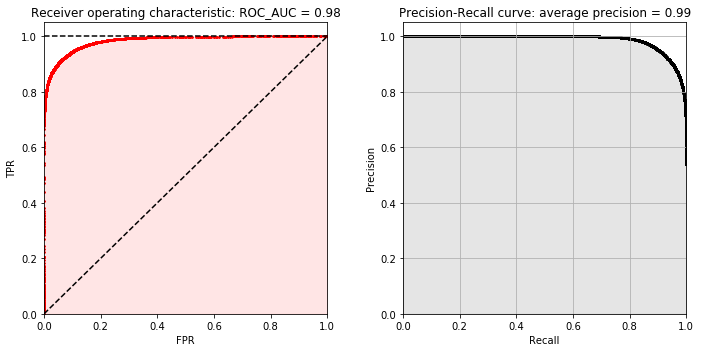

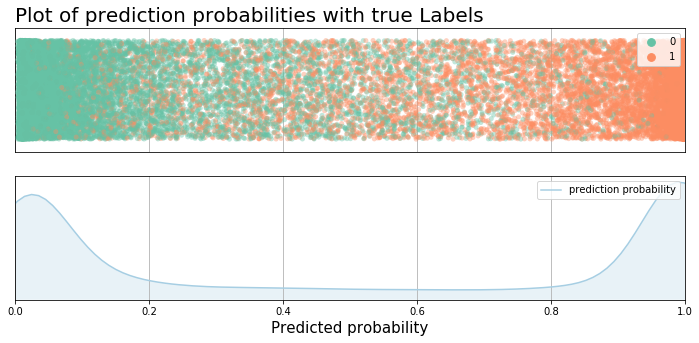

When recall is 75%, Precison is:  0.9972555527189175


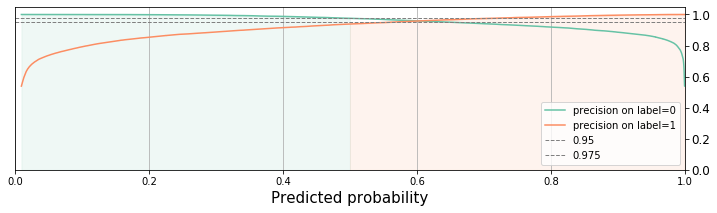

In [95]:
# evaluation metrics and visualization
y_pred_model = lgbm.predict(X_test_1)
y_prob_model = lgbm.predict_proba(X_test_1)[:,1]
# y_prob_model

model_evaluation(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)
plot_prediction_probability(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)
precision = precisionAnalysis(true_label=y_test_1, proba=y_prob_model, recall_at=0.75)
print("When recall is 75%, Precison is: ", precision)
plot_probability_calibration(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)

In [96]:
# calculation cast rate at (0.2 to 0.8), and (0.4 to 0.6)
df_tmp = pd.DataFrame({'prob':y_prob_model})
print(df_tmp[(df_tmp.prob<=0.8) & (df_tmp.prob>=0.2)].prob.count()/len(df_tmp))
print(df_tmp[(df_tmp.prob<=0.6) & (df_tmp.prob>=0.4)].prob.count()/len(df_tmp))

0.1564912800019734
0.0496558869237031


### Summary on lightGBM
I will just brief the result here.
The performance based on metrics is very similar to XGBoost. 
From probability calibration point of view, the cast rate is 0.16, a bit higher than the 13% of XGBoost, when choosing threshold 0.2 and 0.8. If you think this is too aggressive then you can choose threshold 0.4 and 0.6. While the precision is still above 0.95, and the cast rate will down to 0.04.

# without PCA

In [97]:
# X_train_2 = df_X_train.copy()
# X_test_2 = df_X_test.copy()
# y_train_2 = df_y_train.copy()
# y_test_2 = df_y_test.copy()

X_train_2 = df_X_train
X_test_2 = df_X_test
y_train_2 = df_y_train
y_test_2 = df_y_test

In [98]:
# logistic regression, train with the default model

from sklearn.linear_model import LogisticRegression

lr2 = LogisticRegression(   
    max_iter=1e4,
#     C=1e-4,
#     penalty='l2',
#     solver='lbfgs',        
    random_state= RANDOM_STATE
) 


lr2.fit(X=X_train_2, y=y_train_2.is_off_time.values)
lr2.get_params

print("f1-score on training set: {}".format(f1_score(y_true=y_train_2, y_pred=lr2.predict(X_train_2))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_2, y_pred=lr2.predict(X_test_2))))


f1-score on training set: 0.6391839170654613
f1-score on test set: 0.6385227835005173


classification_report
              precision    recall  f1-score   support

           0       0.61      0.52      0.56     19708
           1       0.60      0.68      0.64     20831

    accuracy                           0.60     40539
   macro avg       0.60      0.60      0.60     40539
weighted avg       0.60      0.60      0.60     40539



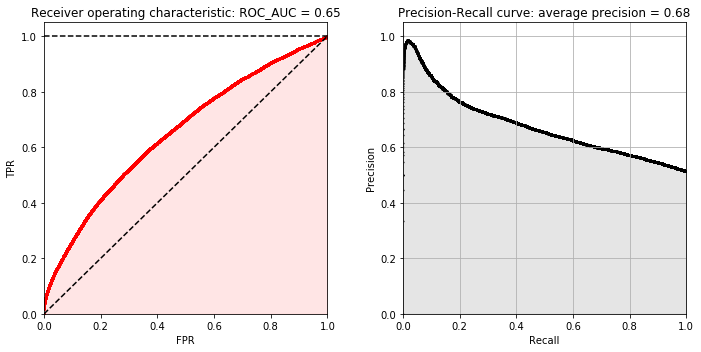

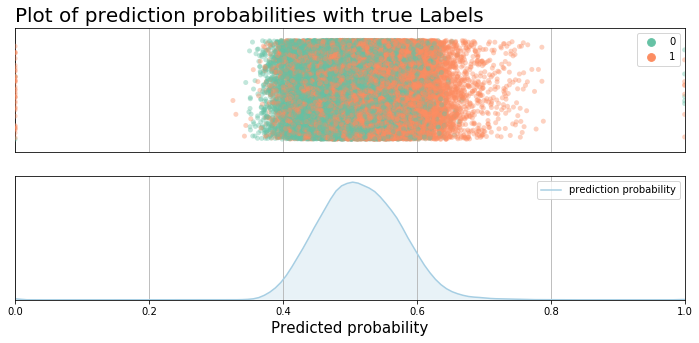

When recall is 75%, Precison is:  0.5862819406401261


In [99]:
# evaluation metrics and visualization
y_pred_model = lr2.predict(X_test_2)
y_prob_model = lr2.predict_proba(X_test_2)[:,1]
# y_prob_model

model_evaluation(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)
plot_prediction_probability(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)
precision = precisionAnalysis(true_label=y_test_1, proba=y_prob_model, recall_at=0.75)
print("When recall is 75%, Precison is: ", precision)

In [100]:
# random forest
from sklearn.ensemble import RandomForestClassifier

rfc2 = RandomForestClassifier(random_state= RANDOM_STATE)

rfc2.fit(X=X_train_2, y=y_train_2.is_off_time.values)
# print(rfc1.get_params)

y_pred_model = rfc2.predict(X_test_2)
y_prob_model = rfc2.predict_proba(X_test_2)[:,1]
# y_prob_model

print("f1-score on training set: {}".format(f1_score(y_true=y_train_2, y_pred=rfc2.predict(X_train_2))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_2, y_pred=rfc2.predict(X_test_2))))

f1-score on training set: 0.9999646021875848
f1-score on test set: 0.7118718455123986


classification_report
              precision    recall  f1-score   support

           0       0.69      0.72      0.71     19708
           1       0.72      0.70      0.71     20831

    accuracy                           0.71     40539
   macro avg       0.71      0.71      0.71     40539
weighted avg       0.71      0.71      0.71     40539



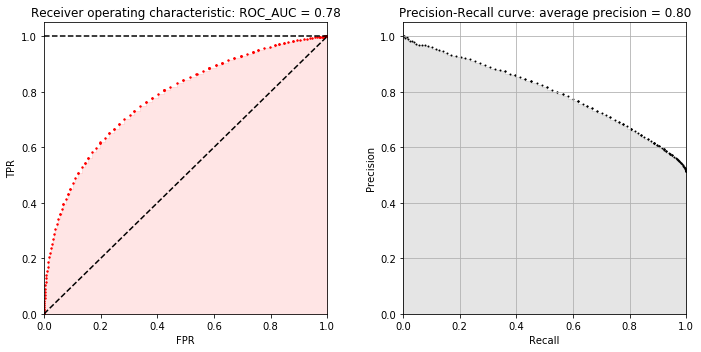

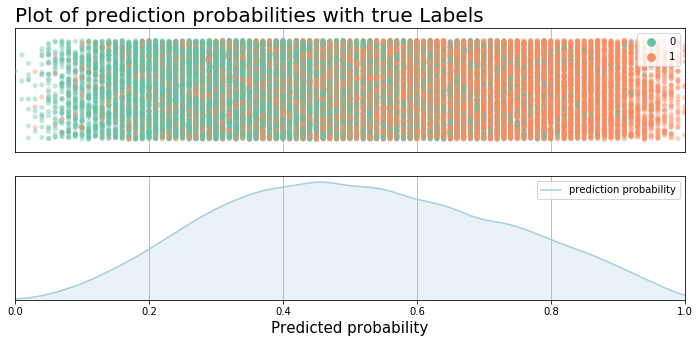

When recall is 75%, Precison is:  0.6974201035529369


In [101]:
# evaluation metrics and visualization
y_pred_model = rfc2.predict(X_test_2)
y_prob_model = rfc2.predict_proba(X_test_2)[:,1]
# y_prob_model

model_evaluation(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)
plot_prediction_probability(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)
precision = precisionAnalysis(true_label=y_test_1, proba=y_prob_model, recall_at=0.75)
print("When recall is 75%, Precison is: ", precision)

In [102]:
# xgboost
from xgboost import XGBClassifier

# params_xGB = {
#     'nthread':16, #number of cores
#     'learning rate': 0.3, #range 0 to 1, default 0.3
#     'gamma': 0, #range 0 to infinity, default 0 
#         # increase to reduce complexity (increase bias, reduce variance)
#     'max_depth': 6, #range 1 to infinity, default 6
#     'min_child_weight': 1, #range 0 to infinity, default 1
#     'max_delta_step': 0, #range 0 to infinity, default 0
#     'subsample': 1.0, #range 0 to 1, default 1
#         # subsample ratio of the training examples
#     'colsample_bytree': 1.0, #range 0 to 1, default 1 
#         # subsample ratio of features
#     'objective':'binary:logistic',
#     'num_class':1,
#     'eval_metric':'logloss',
#     'seed':2018,
#     'silent':1
# }

# xgbc = XGBClassifier(**params_xGB)
xgbc_2 = XGBClassifier(random_state=RANDOM_STATE)

xgbc_2.fit(X=X_train_2, y=y_train_2.is_off_time.values)
xgbc_2.get_params

print("f1-score on training set: {}".format(f1_score(y_true=y_train_2, y_pred=xgbc_2.predict(X_train_2))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_2, y_pred=xgbc_2.predict(X_test_2))))



f1-score on training set: 0.9347634404705826
f1-score on test set: 0.9151271489529635


classification_report
              precision    recall  f1-score   support

           0       0.89      0.94      0.92     19708
           1       0.94      0.89      0.92     20831

    accuracy                           0.92     40539
   macro avg       0.92      0.92      0.92     40539
weighted avg       0.92      0.92      0.92     40539



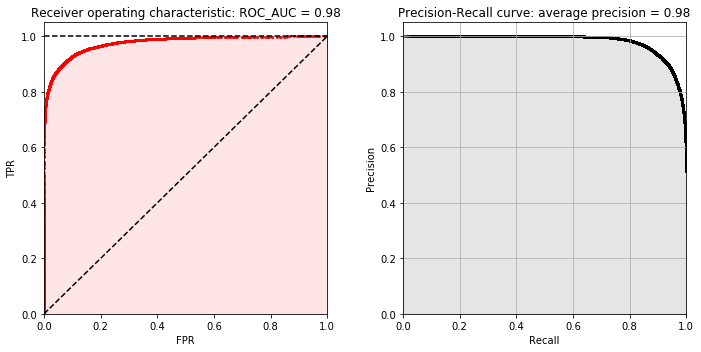

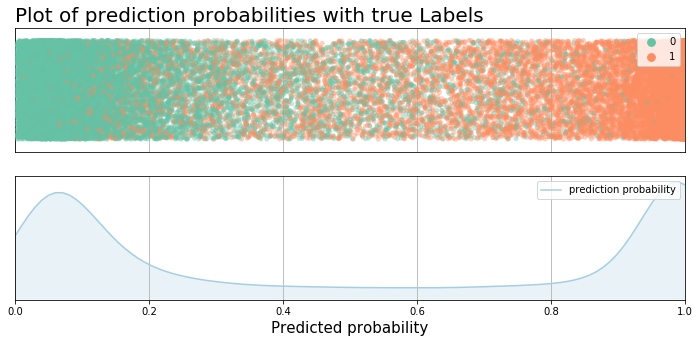

When recall is 75%, Precison is:  0.9935143383989318


In [103]:
# evaluation metrics and visualization
y_pred_model = xgbc_2.predict(X_test_2)
y_prob_model = xgbc_2.predict_proba(X_test_2)[:,1]
# y_prob_model

model_evaluation(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)
plot_prediction_probability(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)
precision = precisionAnalysis(true_label=y_test_1, proba=y_prob_model, recall_at=0.75)
print("When recall is 75%, Precison is: ", precision)

In [104]:
# lightGBM
# from xgboost import XGBClassifier

# xgbc = XGBClassifier(**params_xGB)
lgbm_2 = LGBMClassifier(random_state=RANDOM_STATE)

lgbm_2.fit(X=X_train_2, y=y_train_2.is_off_time.values)
lgbm_2.get_params

print("f1-score on training set: {}".format(f1_score(y_true=y_train_2, y_pred=lgbm_2.predict(X_train_2))))
print("f1-score on test set: {}".format(f1_score(y_true=y_test_2, y_pred=lgbm_2.predict(X_test_2))))

f1-score on training set: 0.9060396088259866
f1-score on test set: 0.901736414740787


classification_report
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     19708
           1       0.94      0.87      0.90     20831

    accuracy                           0.90     40539
   macro avg       0.90      0.90      0.90     40539
weighted avg       0.91      0.90      0.90     40539



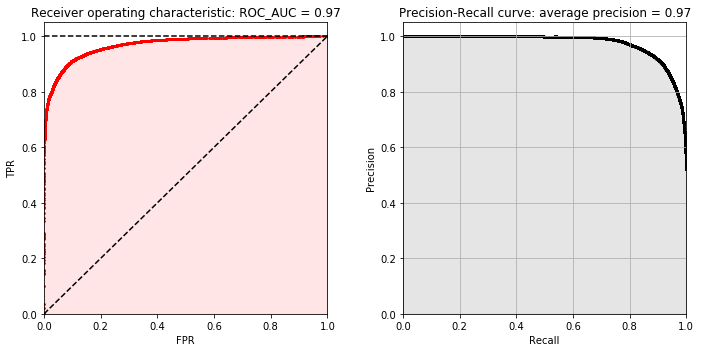

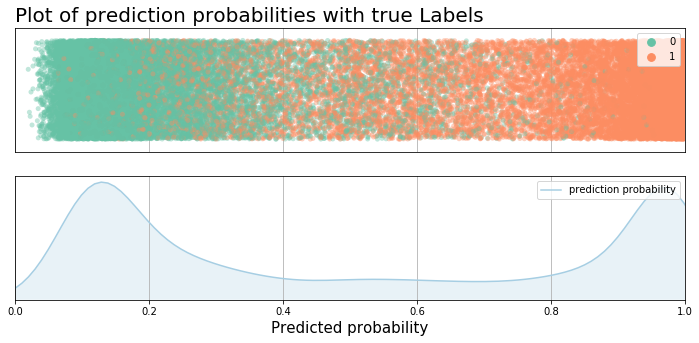

When recall is 75%, Precison is:  0.9867382380802021


In [105]:
# evaluation metrics and visualization
y_pred_model = lgbm_2.predict(X_test_2)
y_prob_model = lgbm_2.predict_proba(X_test_2)[:,1]
# y_prob_model

model_evaluation(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)
plot_prediction_probability(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)
precision = precisionAnalysis(true_label=y_test_1, proba=y_prob_model, recall_at=0.75)
print("When recall is 75%, Precison is: ", precision)

# Compare them all
If you forgot about the performance, don't worry, I will sumerize here. The candidates are:
- Logistic regression without PCA
- Random forest without PCA
- XGBoost without PCA
- LightGBM without PCA

then

- Logistic regression with PC 
- Random forest with PCA
- XGBoost with PCA
- LightGBM with PCA

Logistic regression without PCA


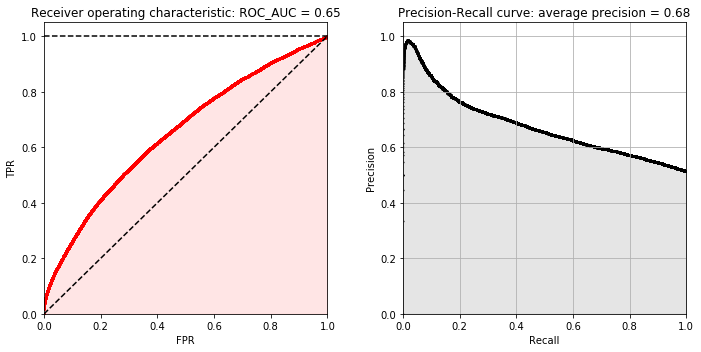

Random forest without PCA


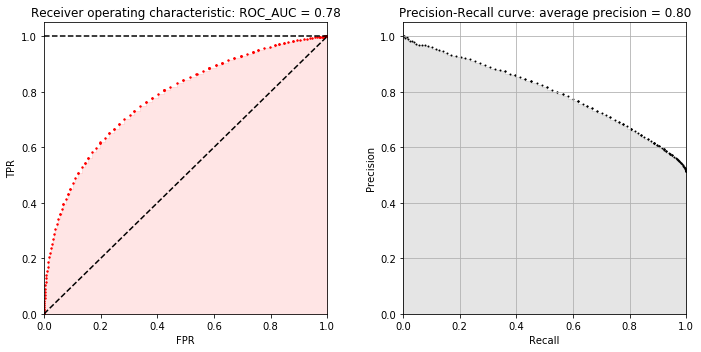

XGBoost without PCA


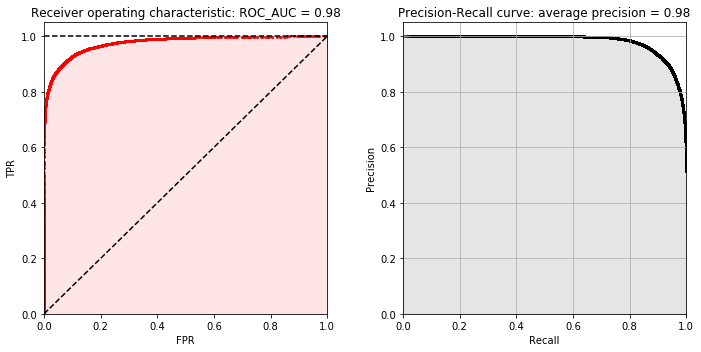

LightGBM without PCA


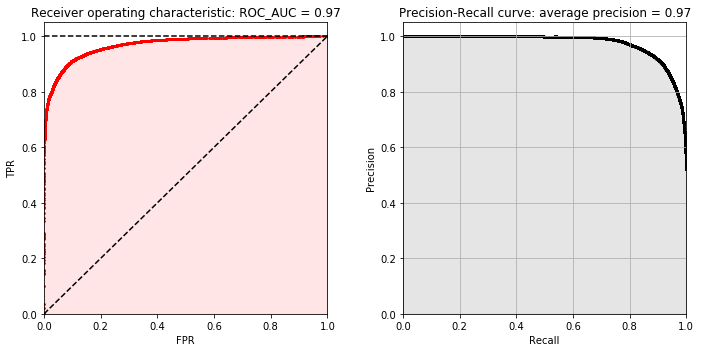

Logistic regression with PCA


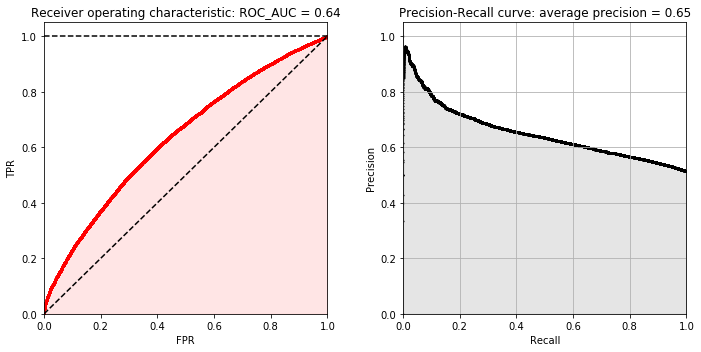

Random forest with PCA


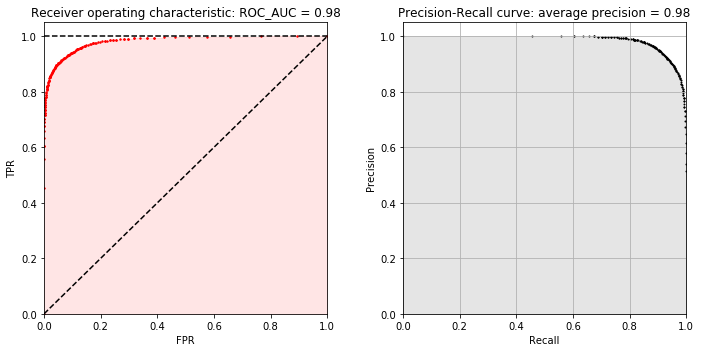

XGBoost with PCA


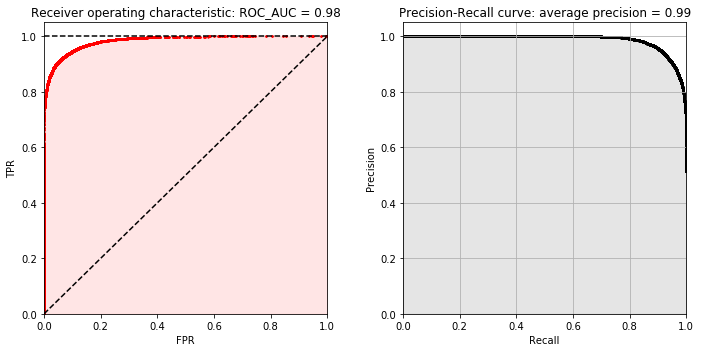

LightGBM with PCA


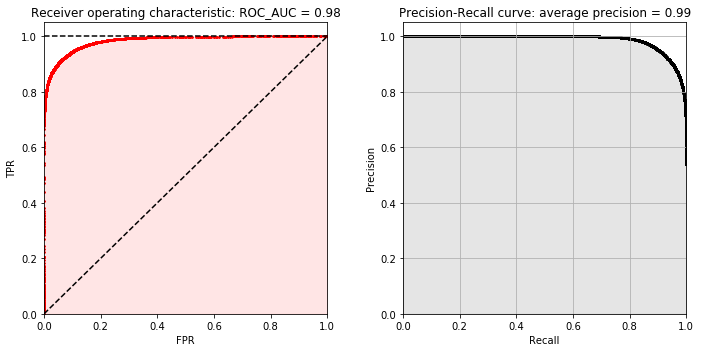

In [106]:
# comapre them all
estimator_list = ['Logistic regression without PCA', 'Random forest without PCA', 'XGBoost without PCA', 'LightGBM without PCA']
for i, estimator in enumerate([lr2, rfc2, xgbc_2, lgbm_2]):
    print(estimator_list[i])
    y_pred_model = estimator.predict(X_test_2)
    y_prob_model = estimator.predict_proba(X_test_2)[:,1]


    model_evaluation(y_test=y_test_2, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model, is_print_classification_report=False)

estimator_list = ['Logistic regression with PCA', 'Random forest with PCA', 'XGBoost with PCA', 'LightGBM with PCA']
for i, estimator in enumerate([lr1, rfc1, xgbc, lgbm]):
    print(estimator_list[i])
    y_pred_model = estimator.predict(X_test_1)
    y_prob_model = estimator.predict_proba(X_test_1)[:,1]
    
    model_evaluation(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model, is_print_classification_report=False)

    


# One more time, the predicted probability

Logistic regress without PCA


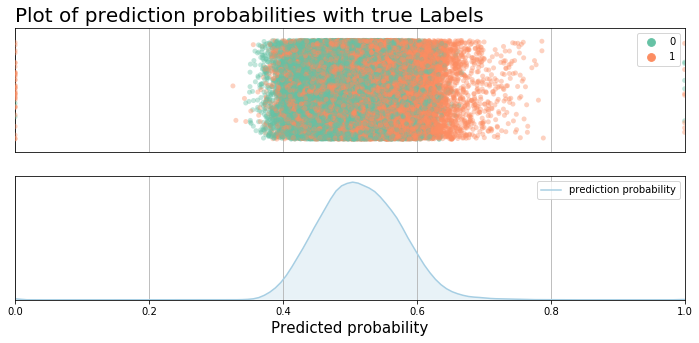

Random forest without PCA


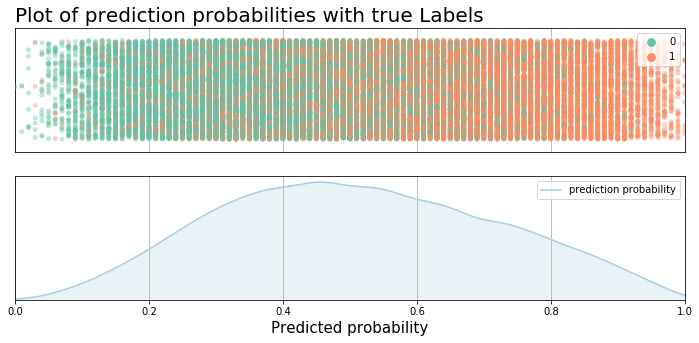

XGBoost without PCA


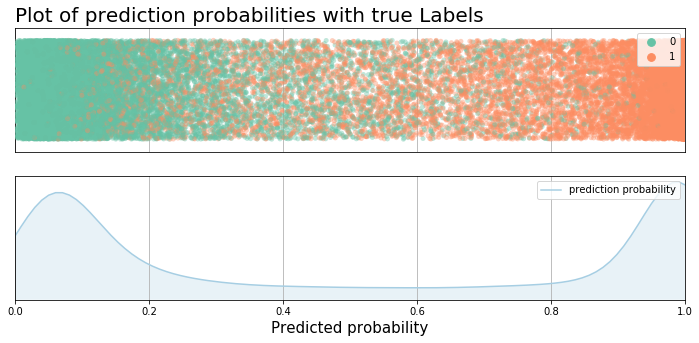

LightGBM without PCA


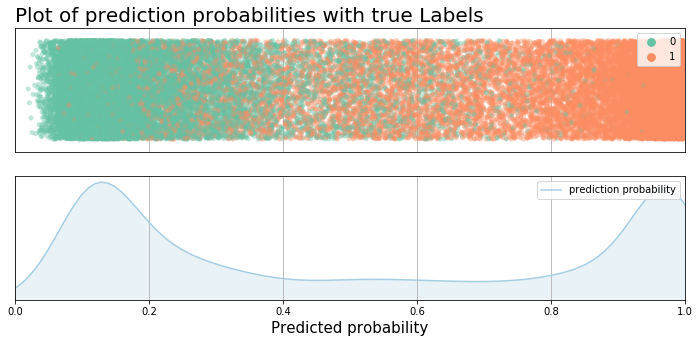

Logistic regress with PCA


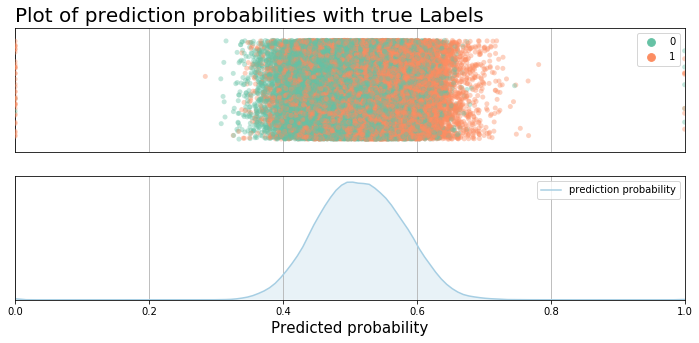

Random forest with PCA


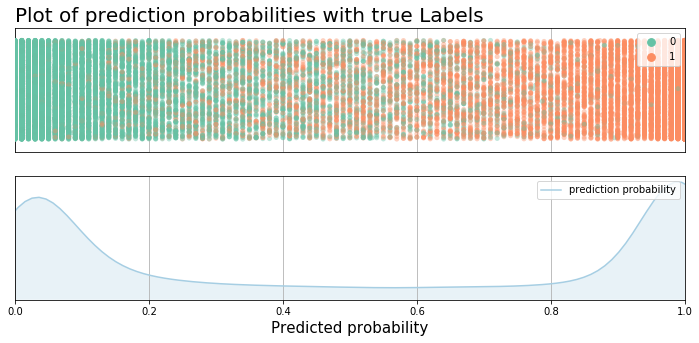

XGBoost with PCA


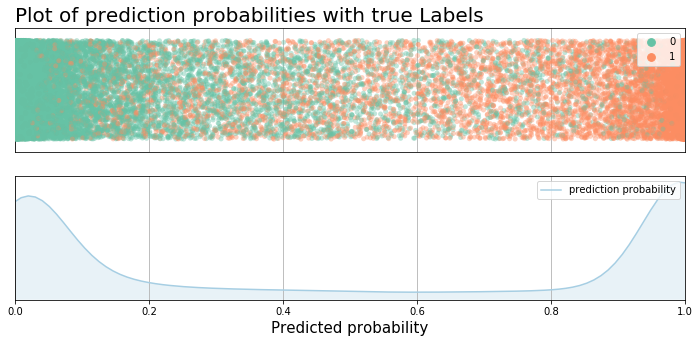

LightGBM with PCA


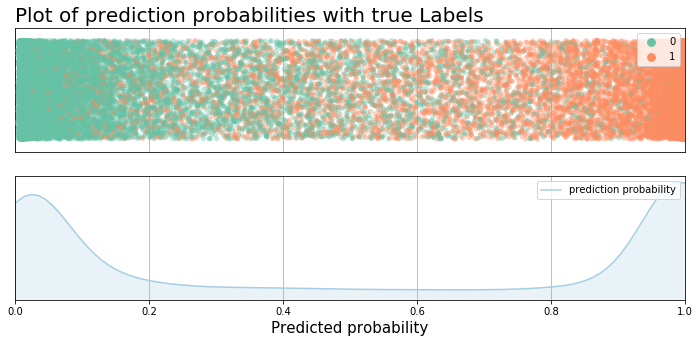

In [107]:
# comapre
    
estimator_list = ['Logistic regress without PCA', 'Random forest without PCA', 'XGBoost without PCA', 'LightGBM without PCA']
for i, estimator in enumerate([lr2, rfc2, xgbc_2, lgbm_2]):
    print(estimator_list[i])
    y_pred_model = estimator.predict(X_test_2)
    y_prob_model = estimator.predict_proba(X_test_2)[:,1]

    plot_prediction_probability(y_test=y_test_2, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)

    
estimator_list = ['Logistic regress with PCA', 'Random forest with PCA', 'XGBoost with PCA', 'LightGBM with PCA']
for i, estimator in enumerate([lr1, rfc1, xgbc, lgbm]):
    print(estimator_list[i])
    y_pred_model = estimator.predict(X_test_1)
    y_prob_model = estimator.predict_proba(X_test_1)[:,1]
    
    plot_prediction_probability(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)

# Sorry, I lied. One last comparison

Logistic regress without PCA


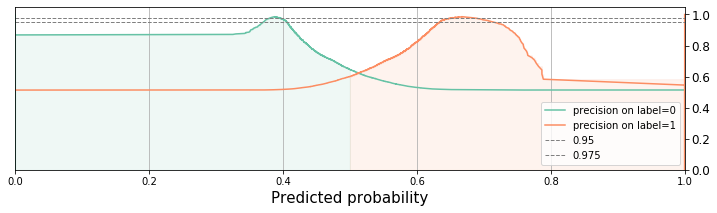

Random forest without PCA


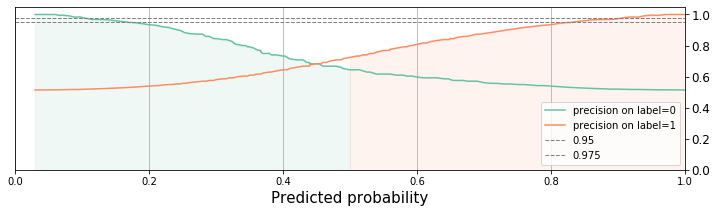

XGBoost without PCA


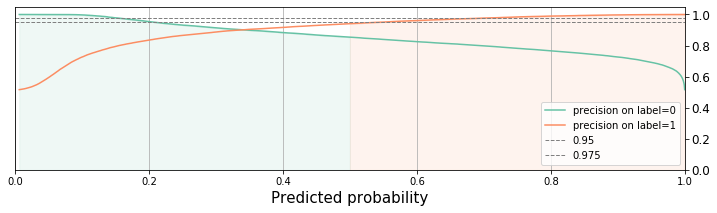

LightGBM without PCA


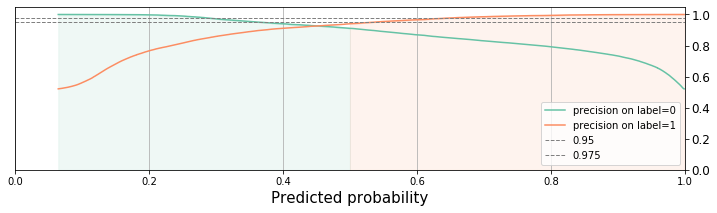

Logistic regress with PCA


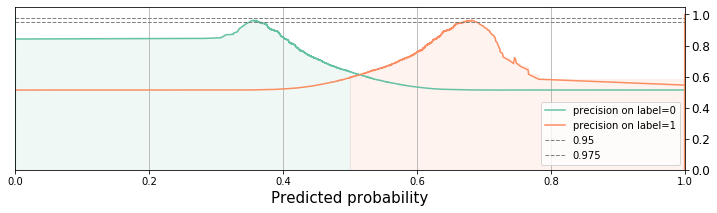

Random forest with PCA


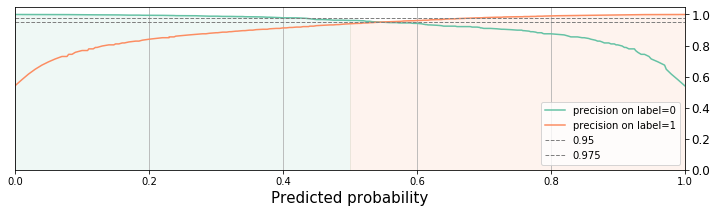

XGBoost with PCA


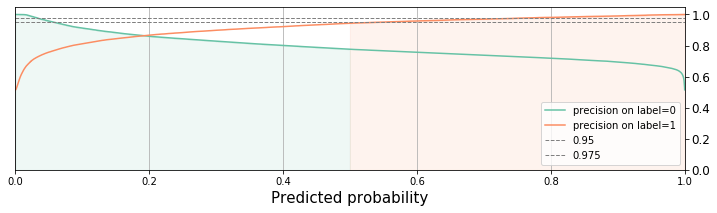

LightGBM with PCA


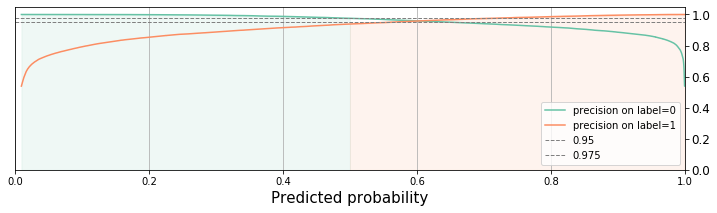

In [108]:
# compare
estimator_list = ['Logistic regress without PCA', 'Random forest without PCA', 'XGBoost without PCA', 'LightGBM without PCA']
for i, estimator in enumerate([lr2, rfc2, xgbc_2, lgbm_2]):
    print(estimator_list[i])
    y_pred_model = estimator.predict(X_test_2)
    y_prob_model = estimator.predict_proba(X_test_2)[:,1]

    plot_probability_calibration(y_test=y_test_2, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)
    
    
estimator_list = ['Logistic regress with PCA', 'Random forest with PCA', 'XGBoost with PCA', 'LightGBM with PCA']
for i, estimator in enumerate([lr1, rfc1, xgbc, lgbm]):
    print(estimator_list[i])
    y_pred_model = estimator.predict(X_test_1)
    y_prob_model = estimator.predict_proba(X_test_1)[:,1]
    
    plot_probability_calibration(y_test=y_test_1, y_pred=pd.DataFrame({'pred_yes':y_pred_model}), y_pred_prob=y_prob_model)

   

It is better that we compare the result with and without PCA and visualize them side by side. But I am tired, I think you got the idea. 

# Interpretability

In [109]:
# check the feature importance, lightGBM
feature_importance = abs(lgbm_2.feature_importances_)
# feature_importance = (feature_importance / feature_importance.max())

df_feature_importance_v2 = pd.DataFrame({'features': X_test_2.columns.values, 'importance': feature_importance})
df_feature_importance_v2.sort_values(by='importance', ascending=False).reset_index()

index                   features  importance
0      10             RecordTime_min        1105
1      18        schedule_minute_num        1101
2       4              next_stop_Lat         242
3       9            RecordTime_hour          95
4       5             next_stop_Long          70
5      15  schedule_hour_num_overlap          64
6      11             RecordTime_sec          63
7      14          schedule_hour_num          52
8       7             RecordTime_day          44
9       6           RecordTime_month          38
10      0                  OriginLat          38
11      8         RecordTime_weekday          37
12      2             DestinationLat          17
13      1                 OriginLong          11
14     17       schedule_weekday_num          11
15     13               schedule_day           8
16      3            DestinationLong           3
17     12             schedule_month           1
18     16           schedule_day_num           0

In [110]:
# check the feature importance, xgboost using PCA features
feature_importance = abs(xgbc.feature_importances_)
# feature_importance = (feature_importance / feature_importance.max())

df_feature_importance_v2 = pd.DataFrame({'features': X_test_1.columns.values, 'importance': feature_importance})
df_feature_importance_v2.sort_values(by='importance', ascending=False).reset_index()

index  features  importance
0      12        12    0.485462
1       8         8    0.208673
2      16        16    0.048021
3      10        10    0.032577
4      11        11    0.031507
5       5         5    0.024431
6       9         9    0.018190
7       4         4    0.017848
8       0         0    0.016979
9      13        13    0.015521
10      7         7    0.015500
11      2         2    0.014247
12      3         3    0.013560
13     14        14    0.012605
14     17        17    0.011456
15     18        18    0.009111
16      1         1    0.008907
17      6         6    0.007806
18     15        15    0.007598

# Sumary <a id='sumary_and_future_work'></a> 

###  <div style="text-align: right"> [back to main](#main) </div>

- Feature engineering: 
Perform unsupervised "human"learning to extract hidden features, i.e. belonging areas data, bus stop GPS coordinates. Feature engineering the datetime data, and wraggling the unstandard shceduledArrivalTime features.
- Data analysis and data visulization: Focus B6 service line, analyse the stats and provide insights about its operation. Adopt different data visulization tools/formations and apply aesthetic principles to tell a story about the data.
- Machine learning: Explored the probability calibration applications (stated in my capstone 2 future work). Demonstrate the importance of PCA techniques, which can be considered as an unconventional unsupervised learning methods to generate patterns that cooperate with supervised learning or semi-supervised learning tasks.

# Thoughts and Discussions about unconventional unsupervised learning
For machine learning part, I expanded our analysis on predicted probability distribution and include that to the evaluation metrics family (i.e. we can consider cast rate is an evaluation metrics). I also demonstrate how to use predicted probability to evaluate unsupervised learning performance. i.e. under certain probability, say, 0.2 to 0.8, the lower the cast rate, the better the performance. When talking about unsupervised learning, I went back to the essential meaning of unsupervised learning, that is, to find some pattern that might or might not do some work while without any label as guidance. (To me, it is very much like a feature engineering process). To be more specific, I used both unsupervised “human” learning to extract features and PCA as my unsupervised learning demonstration. As you can see, during neither of the process there is label involved. Labels are only come into sight as a metrics to assure us we are not doing something useless. I called it “unconventional unsupervised” as many people referred supervised learning as clustering and dimensionality reduction. I purposely kept all the PCA component to make a point that my purpose is not dimensionality reduction. (I admit this is not the best option though.) The result shows that the pattern generated from PCA works better than without. 

# future work
- Explore using unsupervised machine learning method to see if it can cluster the service line into different areas, or find hidden layers between areas layer and publicserveline layer.
- Explore and design tasks to see if unsupervised machine learning can feature out the bus stop latitude and longitude which I find out manually. 
- Check Sklearn's probaility calibration package, since my approach might be too naive.
- Explore the method for original feature interpretability. i.e. how to extract feature importance from PCA features.
- Find way to imporve my coding capability.


# Resource
[New York City Bus Schedules:](https://new.mta.info/schedules/bus)

[Brooklyn Bus Schedules:](https://new.mta.info/schedules/bus/Brooklyn)

[realtime bus GPS:](https://bustime.mta.info/#b6)

[coordinates to distance:](https://gps-coordinates.org/distance-between-coordinates.php)

[color picker:](https://colorbrewer2.org/#type=diverging&scheme=PiYG&n=3)
[color picker2:](https://stackoverflow.com/questions/40673490/how-to-get-plotly-js-default-colors-list)